In [1]:
import pandas as pd
import numpy as np

### RWA

In [2]:
defective_rwa = pd.read_csv('RWA_Faulty_Dataset.csv')
defective_rwa.drop(['Order', 'swcVer', 'createdDate'], axis=1, inplace=True)
#defective_rwa.head(5)
#defective_rwa['isDefective'].unique()

df_rwa = pd.DataFrame(defective_rwa, columns = ['isDefective', 'swcName', 'progLength','vocaCnt','volume','difficultyLv','progLv','effortToImpl',\
                                               'timeToImpl','nloc','minParaCnt','maxParaCnt','avgParaCnt','funCnt','minCyclo',\
                                               'maxCyclo','avgCyclo','expLvOfDev','affectedBoundary','revFreq'])
df_rwa.loc[df_rwa['isDefective'] =='N', 'isDefective'] = 0
df_rwa.loc[df_rwa['isDefective'] =='Y', 'isDefective'] = 1
df_rwa.tail(2)

isDefective              swcName  progLength  vocaCnt       volume  \
192           1  Swcs/SigCorrlnDiagc         214       57  1248.238463   
193           0      Swcs/TunVrntSel         116       31   574.686772   

     difficultyLv    progLv  effortToImpl  timeToImpl  nloc  minParaCnt  \
192     14.325581  6.082373   17881.74170  993.430095    48           1   
193     12.272727  3.815479    7052.97402  391.831890    15           1   

     maxParaCnt  avgParaCnt  funCnt  minCyclo  maxCyclo  avgCyclo  expLvOfDev  \
192           1         1.0       2         1         9  5.000000   22.393443   
193           1         1.0       0         2        10  5.416667   49.475410   

     affectedBoundary  revFreq  
192                 1        6  
193                 3       35

In [124]:
df_rwa.describe()

progLength      vocaCnt         volume  difficultyLv      progLv  \
count    194.000000   194.000000     194.000000    194.000000  194.000000   
mean    1065.381443   125.917526    8453.048181     26.220905   11.532848   
std     1657.694163   172.824549   15368.396536     18.359445   24.705264   
min        7.000000     7.000000      19.651484      0.571429    2.351720   
25%      185.500000    48.500000    1097.582550     13.215097    4.673151   
50%      509.000000    87.000000    3329.145829     24.654661    5.897908   
75%      985.500000   132.750000    7025.083002     34.704391    8.660432   
max    11039.000000  1950.000000  120648.083600     73.894737  271.646717   

       effortToImpl     timeToImpl         nloc  minParaCnt  maxParaCnt  \
count  1.940000e+02     194.000000   194.000000  194.000000  194.000000   
mean   4.161260e+05   23118.111152   179.067010    0.927835    2.020619   
std    9.133441e+05   50741.338650   242.713675    0.259430    1.742367   
min    2.057143e+01       1.142857     2.000000    0.000000    1.000000   
25%    1.356788e+04     753.771169    41.500000    1.000000    1.000000   
50%    8.095500e+04    4497.499825   102.000000    1.000000    1.000000   
75%    2.156544e+05   11980.800340   177.000000    1.000000    2.000000   
max    3.844545e+06  213585.824300  1020.000000    1.000000    8.000000   

       avgParaCnt      funCnt    minCyclo   maxCyclo    avgCyclo  expLvOfDev  \
count  194.000000  194.000000  194.000000  194.00000  194.000000  194.000000   
mean     1.246873    5.252577    1.479381   14.50000    5.096735   64.315532   
std      0.519438    7.660755    1.584278   14.73048    3.813654   36.992281   
min      0.750000    0.000000    1.000000    1.00000    1.000000   22.393443   
25%      1.000000    2.000000    1.000000    4.00000    2.095238   49.475410   
50%      1.000000    3.000000    1.000000    9.50000    4.000000   52.229508   
75%      1.225806    4.000000    1.000000   20.00000    7.250000   64.754098   
max      3.166667   40.000000    9.000000  119.00000   23.000000  148.163934   

       affectedBoundary     revFreq  
count        194.000000  194.000000  
mean           1.860825   11.768041  
std            0.824628   11.952965  
min            0.000000    2.000000  
25%            1.000000    5.000000  
50%            2.000000    8.000000  
75%            2.000000   13.000000  
max            3.000000   79.000000

In [132]:
df_rwa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   isDefective       194 non-null    object 
 1   swcName           194 non-null    object 
 2   progLength        194 non-null    int64  
 3   vocaCnt           194 non-null    int64  
 4   volume            194 non-null    float64
 5   difficultyLv      194 non-null    float64
 6   progLv            194 non-null    float64
 7   effortToImpl      194 non-null    float64
 8   timeToImpl        194 non-null    float64
 9   nloc              194 non-null    int64  
 10  minParaCnt        194 non-null    int64  
 11  maxParaCnt        194 non-null    int64  
 12  avgParaCnt        194 non-null    float64
 13  funCnt            194 non-null    int64  
 14  minCyclo          194 non-null    int64  
 15  maxCyclo          194 non-null    int64  
 16  avgCyclo          194 non-null    float64
 1

In [177]:
# 각 SWC 의 변경율
swc_change_rate = df_rwa["swcName"].value_counts(normalize=True)*100
swc_change_rate

Swcs/ApplCom          6.701031
Swcs/RackAgSnsr       4.639175
Swcs/PpkTrim          4.639175
Swcs/RackPosn         4.639175
Swcs/FailrMgr         4.123711
                        ...   
Cdds/SafeTLibMgr      0.515464
Cdds/Sent             0.515464
Cdds/MotCtrl/DmaMc    0.515464
Swcs/AnalyticRec      0.515464
Swcs/MotRefCalcn      0.515464
Name: swcName, Length: 63, dtype: float64

In [168]:
df_rwa.tail(2)

isDefective              swcName  progLength  vocaCnt       volume  \
192           1  Swcs/SigCorrlnDiagc         214       57  1248.238463   
193           0      Swcs/TunVrntSel         116       31   574.686772   

     difficultyLv    progLv  effortToImpl  timeToImpl  nloc  minParaCnt  \
192     14.325581  6.082373   17881.74170  993.430095    48           1   
193     12.272727  3.815479    7052.97402  391.831890    15           1   

     maxParaCnt  avgParaCnt  funCnt  minCyclo  maxCyclo  avgCyclo  expLvOfDev  \
192           1         1.0       2         1         9  5.000000   22.393443   
193           1         1.0       0         2        10  5.416667   49.475410   

     affectedBoundary  revFreq  
192                 1        6  
193                 3       35

In [175]:
df_rwa

isDefective                  swcName  progLength  vocaCnt        volume  \
0             0  Cdds/MotCtrl/MotCtrlSdl          80       37    416.756269   
1             0            Cdds/SafeTLib        1586      130  11137.475350   
2             0         Cdds/SafeTLibMgr        1057      123   7338.237832   
3             0               Cdds/SpiB2         463      125   3225.158124   
4             0                Cdds/SpiD         735      111   4993.895662   
..          ...                      ...         ...      ...           ...   
189           1             Swcs/PpkTrim        6379      494  57081.634570   
190           1          Swcs/RackAgSnsr        1226      119   8453.046578   
191           1            Swcs/RackPosn        2494      181  18704.615640   
192           1      Swcs/SigCorrlnDiagc         214       57   1248.238463   
193           0          Swcs/TunVrntSel         116       31    574.686772   

     difficultyLv     progLv  effortToImpl     timeToImpl  nloc  minParaCnt  \
0        4.413793  21.392335  1.839476e+03     102.193108    44           1   
1       47.739130   4.886948  5.316934e+05   29538.521580   394           1   
2       49.223301   3.028659  3.612123e+05   20067.349410   254           1   
3       18.084112   9.861810  5.832412e+04    3240.228956    95           0   
4       34.064516   4.303631  1.701146e+05    9450.813295   169           0   
..            ...        ...           ...            ...   ...         ...   
189     67.351695  12.583439  3.844545e+06  213585.824300  1020           1   
190     47.575758   3.734581  4.021601e+05   22342.227490   196           1   
191     53.695122   6.487526  1.004347e+06   55797.034330   525           1   
192     14.325581   6.082373  1.788174e+04     993.430095    48           1   
193     12.272727   3.815479  7.052974e+03     391.831890    15           1   

     maxParaCnt  avgParaCnt  funCnt  minCyclo  maxCyclo   avgCyclo  \
0             1    1.000000       2         1         2   1.500000   
1             3    1.333333       6         9        29  15.000000   
2             2    1.100000      10         2        11   4.700000   
3             1    0.750000       4         1         7   3.000000   
4             4    2.000000       4         1         9   4.500000   
..          ...         ...     ...       ...       ...        ...   
189           4    1.200000      40         1        32   3.700000   
190           2    1.250000       4         1        45  12.000000   
191           7    2.857143       7         1       119  18.000000   
192           1    1.000000       2         1         9   5.000000   
193           1    1.000000       0         2        10   5.416667   

     expLvOfDev  affectedBoundary  revFreq  
0    136.918033                 2        4  
1     49.475410                 0        6  
2     49.475410                 0        5  
3     22.393443                 0        2  
4     22.393443                 0        2  
..          ...               ...      ...  
189   49.475410                 2       28  
190   22.786885                 2       21  
191   64.754098                 2       27  
192   22.393443                 1        6  
193   49.475410                 3       35  

[194 rows x 20 columns]

In [189]:
# 각 SWC 의 결함 발생율

faulty_df = df_rwa[df_rwa["isDefective"] == 1]
faulty_counts = faulty_df["swcName"].value_counts()
faulty_rate = faulty_df["swcName"].value_counts(normalize=True) * 100

faulty_rate

Swcs/FailrMgr           15.625
Swcs/ApplCom            15.625
Swcs/RackPosn           12.500
Swcs/RackAgSnsr         12.500
Swcs/PpkTrim             9.375
Swcs/ActrMot             6.250
Swcs/MotAgDiagc          3.125
Swcs/DiagPreCond         3.125
Swcs/IoHwAb_Discrete     3.125
Swcs/MotAgEtc            3.125
Swcs/IoHwAb_Dcm          3.125
Swcs/SbwSigVotg          3.125
Swcs/PpkPolarity         3.125
Swcs/ModMgr              3.125
Swcs/SigCorrlnDiagc      3.125
Name: swcName, dtype: float64

In [147]:
# counting of defective software components

df_rwa_counts = df_rwa[["swcName", "revFreq", "isDefective"]]
df_rwa_counts = df_rwa_counts.set_index(["swcName", "revFreq"]).count(level="swcName")
df_rwa_counts

isDefective
swcName                              
Cdds/MotCtrl/DQTransform            2
Cdds/MotCtrl/DmaMc                  1
Cdds/MotCtrl/MotAg                  1
Cdds/MotCtrl/MotCtrlSdl             2
Cdds/MotCtrl/MotICtrl               1
...                               ...
Swcs/SigCorrlnDiagc                 3
Swcs/SysCfg                         3
Swcs/TqRampCtrl                     3
Swcs/TunVrntSel                     2
Swcs/VehSpd                         3

[63 rows x 1 columns]

In [5]:
import missingno as msno

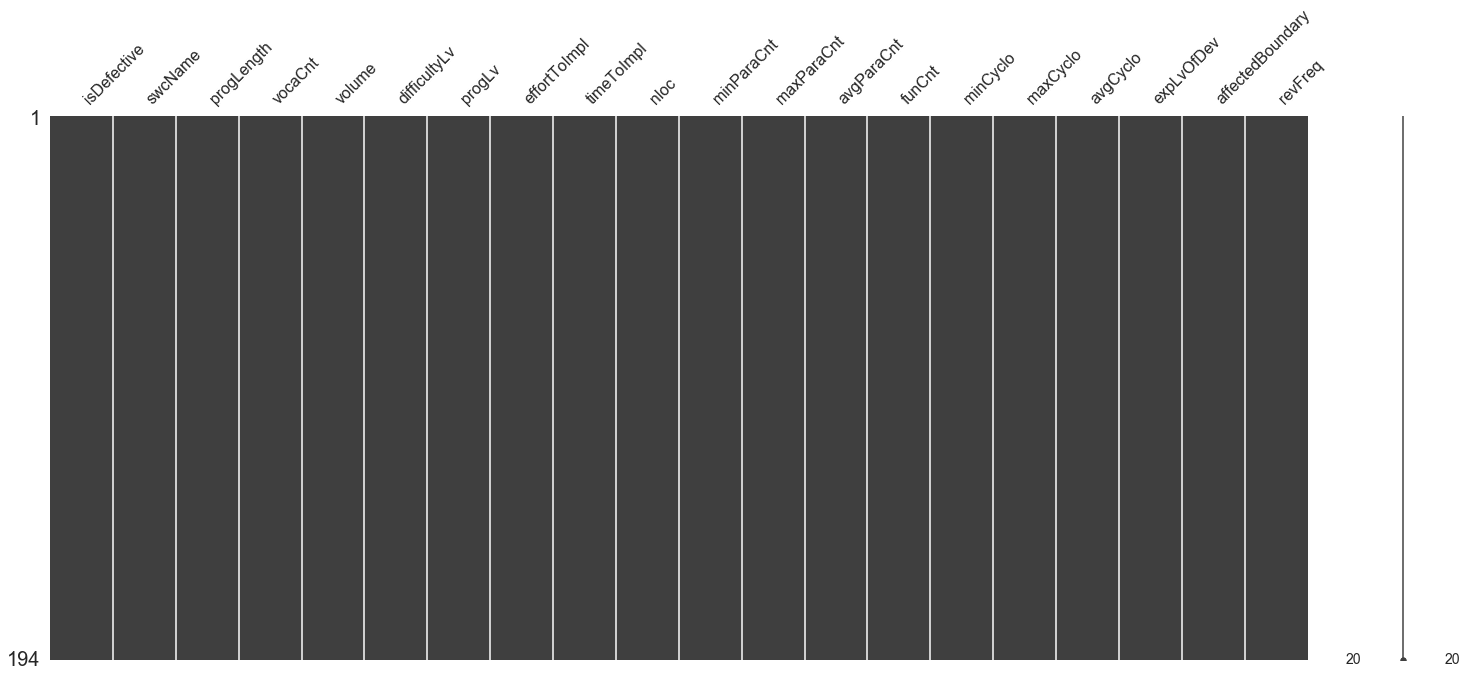

In [133]:
msno.matrix(df_rwa)

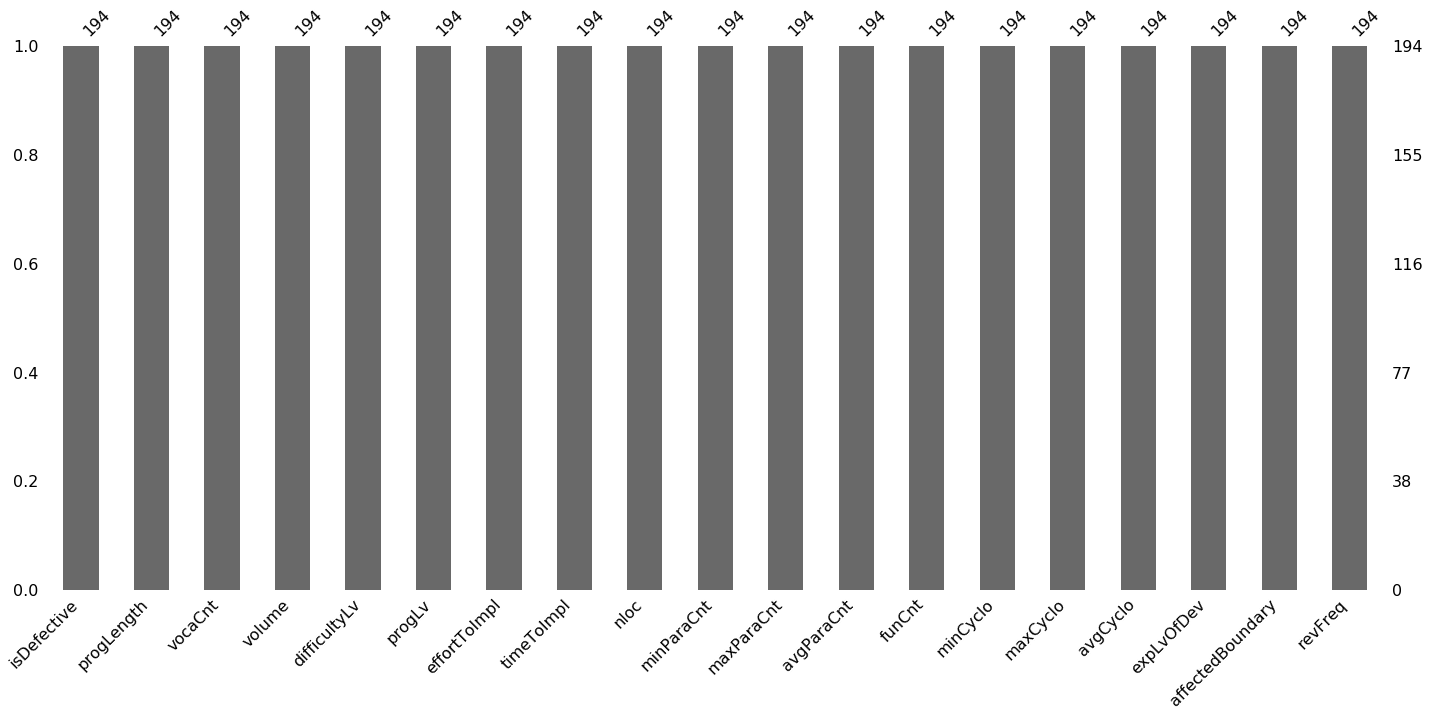

In [7]:
msno.bar(df_rwa)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

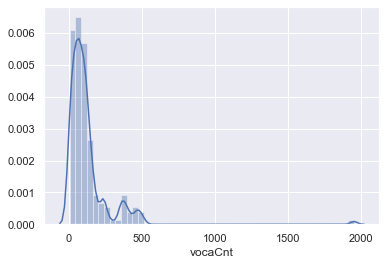

In [15]:
sns.distplot(df_rwa.vocaCnt)

In [17]:
df_rwa.tail(2)

isDefective  progLength  vocaCnt       volume  difficultyLv    progLv  \
192           1         214       57  1248.238463     14.325581  6.082373   
193           0         116       31   574.686772     12.272727  3.815479   

     effortToImpl  timeToImpl  nloc  minParaCnt  maxParaCnt  avgParaCnt  \
192   17881.74170  993.430095    48           1           1         1.0   
193    7052.97402  391.831890    15           1           1         1.0   

     funCnt  minCyclo  maxCyclo  avgCyclo  expLvOfDev  affectedBoundary  \
192       2         1         9  5.000000   22.393443                 1   
193       0         2        10  5.416667   49.475410                 3   

     revFreq  
192        6  
193       35

In [36]:
# dataset seperation

from sklearn.model_selection import train_test_split

In [42]:
df_rwa_x = df_rwa.drop(columns=["isDefective"])
df_rwa_y = df_rwa["isDefective"]
df_rwa_y = df_rwa_y.astype("int64")

df_rwa_y

0      0
1      0
2      0
3      0
4      0
      ..
189    1
190    1
191    1
192    1
193    0
Name: isDefective, Length: 194, dtype: int64

In [75]:
train_x, test_x, train_y, test_y = train_test_split(df_rwa_x, df_rwa_y,test_size=0.2, random_state=1)

train_y

112    0
114    0
167    1
69     0
152    1
      ..
133    1
137    1
72     0
140    0
37     0
Name: isDefective, Length: 155, dtype: int64

In [76]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((155, 18), (39, 18), (155,), (39,))

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
decision_tree = DecisionTreeClassifier(random_state=0).fit(train_x, train_y)

In [79]:
pred = decision_tree.predict(test_x)
pred[:20]

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [80]:
np.array(test_y[:20]) # 실제 데이터

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [90]:
np.round(decision_tree.score(test_x, test_y)*100, 2) 

92.31

In [97]:
df_rwa_2 = df_rwa.copy()

In [98]:
df_rwa_test = df_rwa_2.drop(columns=["isDefective"])

In [99]:
df_rwa_test.tail(2)

progLength  vocaCnt       volume  difficultyLv    progLv  effortToImpl  \
192         214       57  1248.238463     14.325581  6.082373   17881.74170   
193         116       31   574.686772     12.272727  3.815479    7052.97402   

     timeToImpl  nloc  minParaCnt  maxParaCnt  avgParaCnt  funCnt  minCyclo  \
192  993.430095    48           1           1         1.0       2         1   
193  391.831890    15           1           1         1.0       0         2   

     maxCyclo  avgCyclo  expLvOfDev  affectedBoundary  revFreq  
192         9  5.000000   22.393443                 1        6  
193        10  5.416667   49.475410                 3       35

In [110]:
rwa_data = [
    {"progLength":5000, "vocaCnt":120, "volume":120, "difficultyLv":120, "progLv":120, "effortToImpl":120, \
    "timeToImpl":120, "nloc":120, "minParaCnt":120, "maxParaCnt":120, "avgParaCnt":120, "funCnt":120,\
    "minCyclo":120, "maxCyclo":120, "avgCyclo":120, "expLvOfDev":300, "affectedBoundary":120, "revFreq":120, },

    
]

df_rwa_data = pd.DataFrame(rwa_data)
df_rwa_data

progLength  vocaCnt  volume  difficultyLv  progLv  effortToImpl  \
0        5000      120     120           120     120           120   

   timeToImpl  nloc  minParaCnt  maxParaCnt  avgParaCnt  funCnt  minCyclo  \
0         120   120         120         120         120     120       120   

   maxCyclo  avgCyclo  expLvOfDev  affectedBoundary  revFreq  
0       120       120         300               120      120

In [117]:
decision_tree.predict(test_x)[:20]

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [118]:
np.array(test_y)[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [119]:
np.round(decision_tree.predict_proba(df_rwa_test), 2)[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

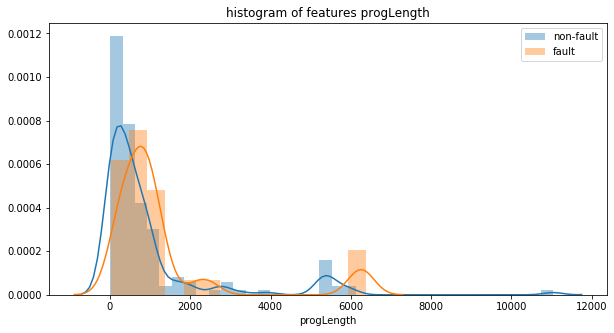

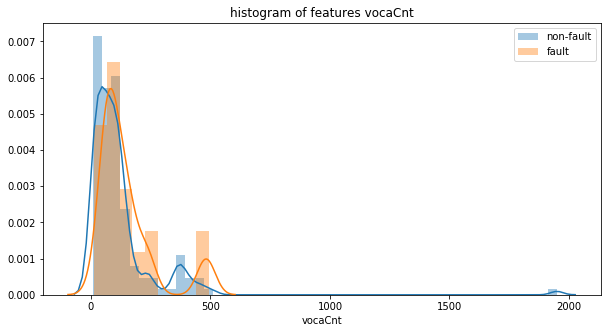

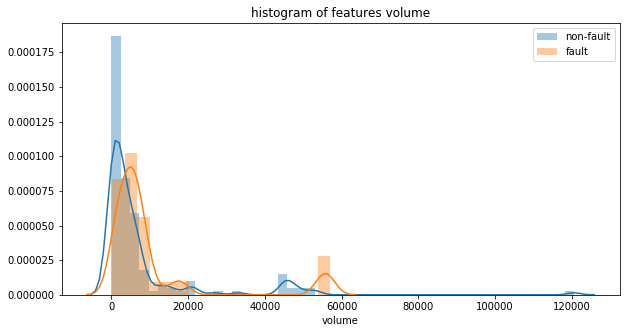

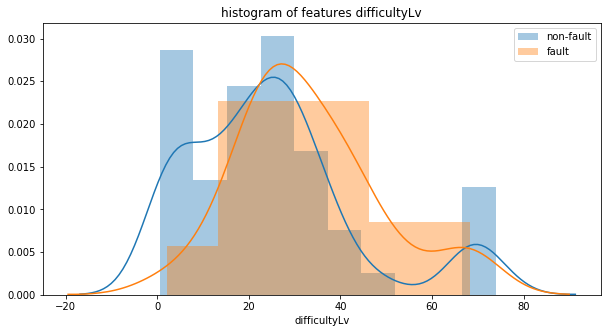

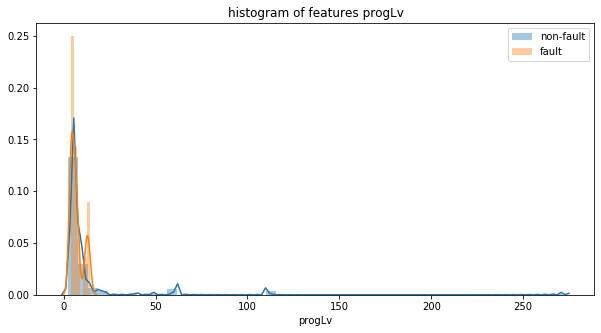

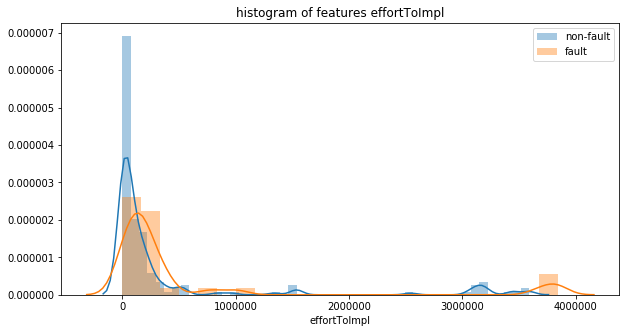

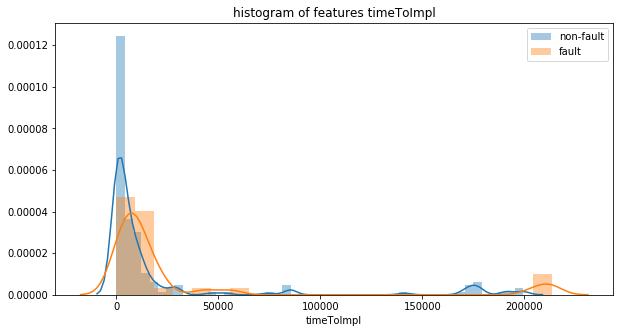

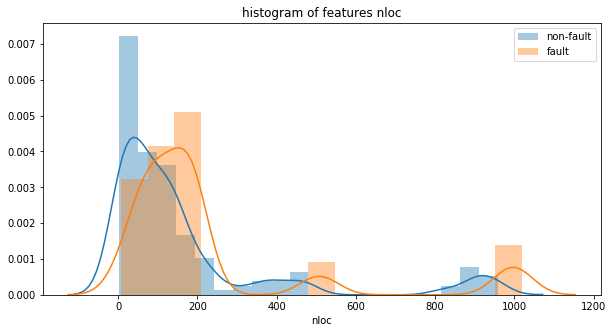

Selected KDE bandwidth is 0. Cannot estiamte density.


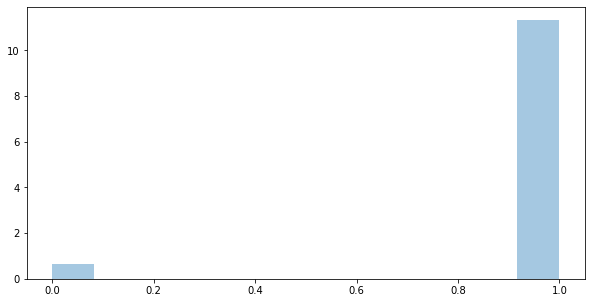

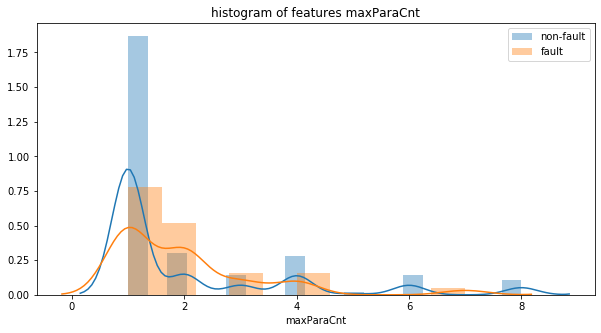

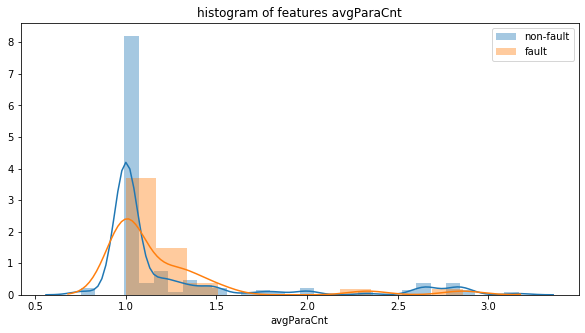

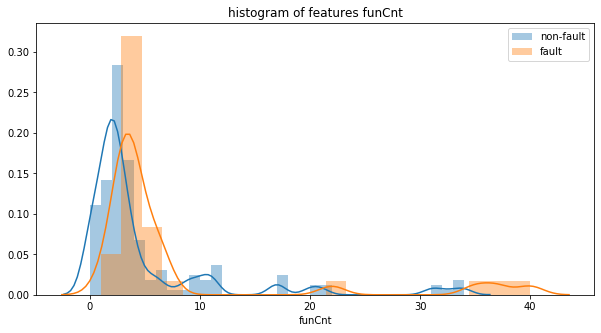

Selected KDE bandwidth is 0. Cannot estiamte density.


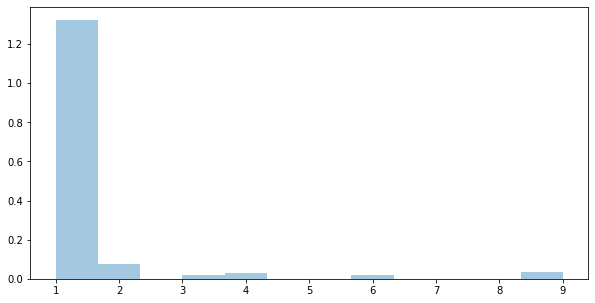

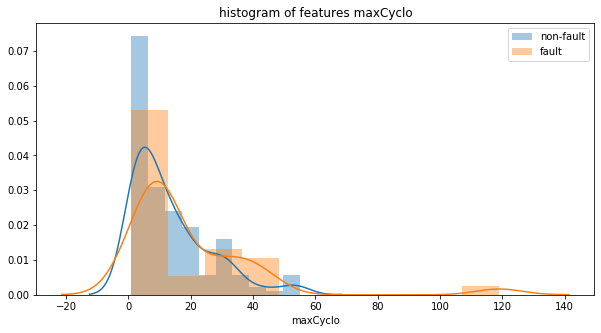

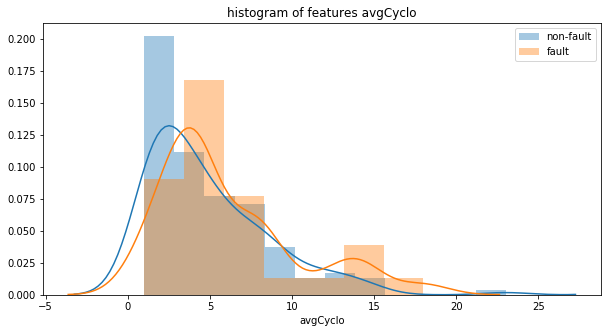

could not convert string to float: 'None'


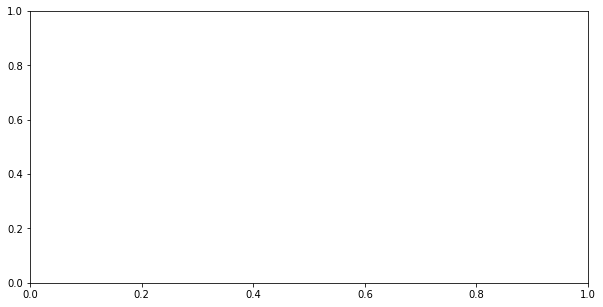

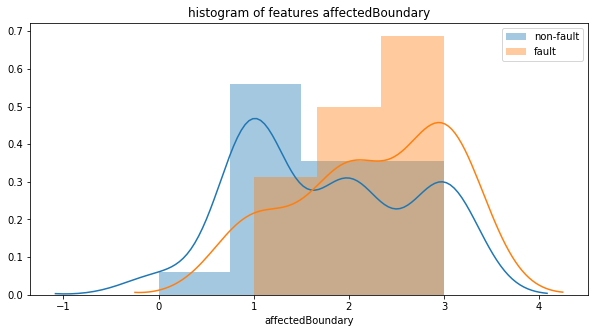

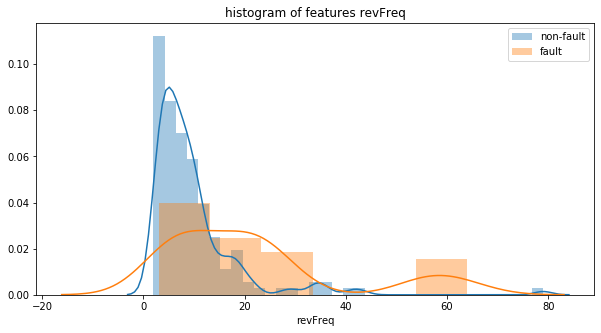

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

for cnt, col in enumerate(df_rwa):
    try:
        if cnt >= 1:
            plt.figure(figsize=(10, 5))
            sns.distplot(df_rwa[col][df_rwa['isDefective']==0])
            sns.distplot(df_rwa[col][df_rwa['isDefective']==1])
            plt.legend(['non-fault', 'fault'], loc='best')
            plt.title('histogram of features '+str(col))
            plt.show()
        
        if cnt >= 18:
            break
            
    except Exception as e:
        print(e)
        pass

In [72]:
from scipy import stats

stats.pearsonr(df_rwa['isDefective'], df_rwa['revFreq'])


(0.3721172544657251, 9.161710649286321e-08)

In [70]:

stats.spearmanr(df_rwa['isDefective'], df_rwa['affectedBoundary'])

SpearmanrResult(correlation=nan, pvalue=nan)

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

defective_tmp_rwa = df_rwa.copy()
#defective_tmp['isDefectvie'] = cancer['isDefective'].replace({'M':1, 'B':0})
corrmat = defective_tmp_rwa.corr()
top_corr_features = corrmat.index[abs(corrmat["isDefective"])>=0]

# plot
plt.figure(figsize=(13,10))
g = sns.heatmap(defective_tmp[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.show()

KeyError: 'isDefective'

### SFA

In [218]:
defective = pd.read_csv('SFA_Faulty_Dataset.csv')
defective.drop(['Order', 'swcName', 'swcVer', 'createdDate'], axis=1, inplace=True)
defective.head(5)
#defective['isDefective'].unique()

isDefective  progLength  vocaCnt        volume  difficultyLv    progLv  \
0            0         691      129   4844.758033     29.363636  5.618914   
1            0        1586      130  11137.475350     47.739130  4.886948   
2            0        1057      123   7338.237832     49.223301  3.028659   
3            0         463      125   3225.158124     18.084112  9.861810   
4            0         735      111   4993.895662     34.064516  4.303631   

   effortToImpl    timeToImpl  nloc  minParaCnt  maxParaCnt  avgParaCnt  \
0  142259.71320   7903.317398    93           1           1    1.000000   
1  531693.38850  29538.521580   394           1           3    1.333333   
2  361212.28940  20067.349410   254           1           2    1.100000   
3   58324.12121   3240.228956    95           0           1    0.750000   
4  170114.63930   9450.813295   169           0           4    2.000000   

   funCnt  minCyclo  maxCyclo  avgCyclo  expLvOfDev  affectedBoundary  revFreq  
0       2         1         8       4.5  148.163934                 1        2  
1       6         9        29      15.0   49.475410                 0        6  
2      10         2        11       4.7   49.475410                 0        5  
3       4         1         7       3.0   22.393443                 0        2  
4       4         1         9       4.5   22.393443                 0        2

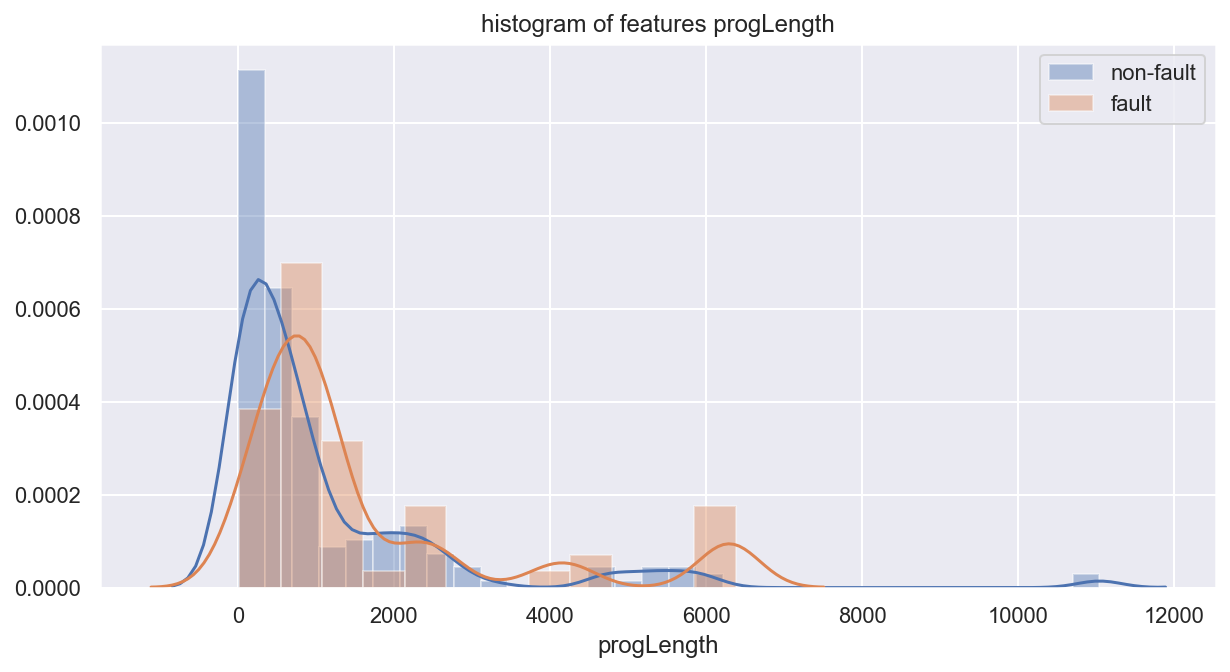

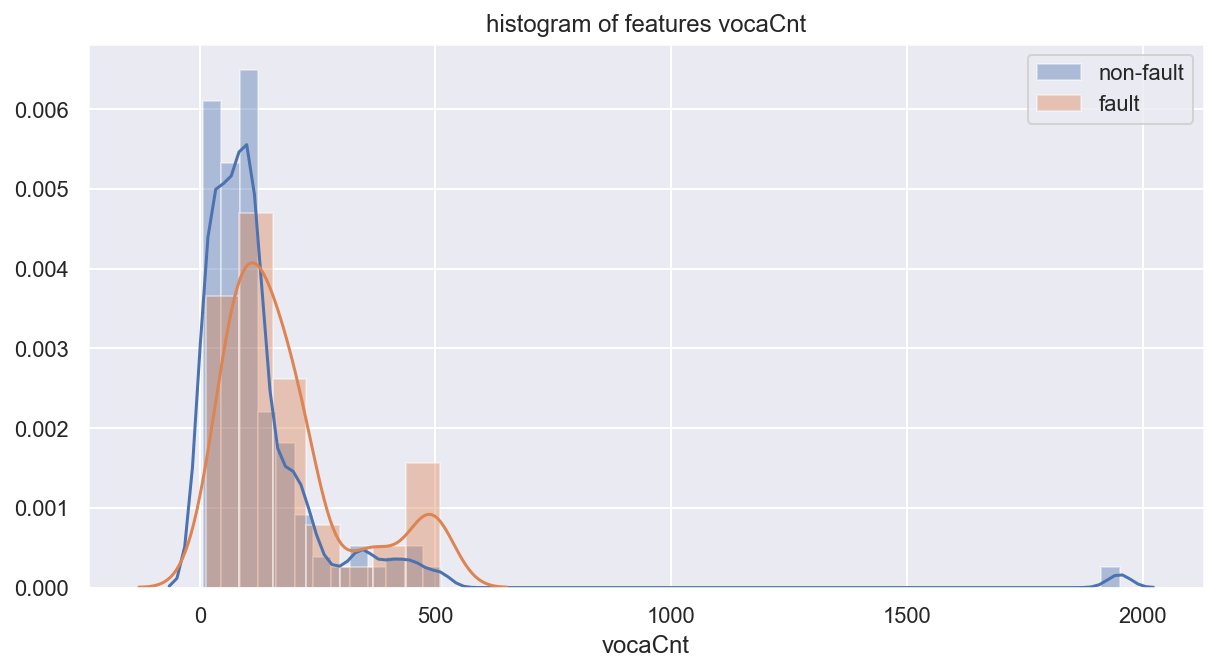

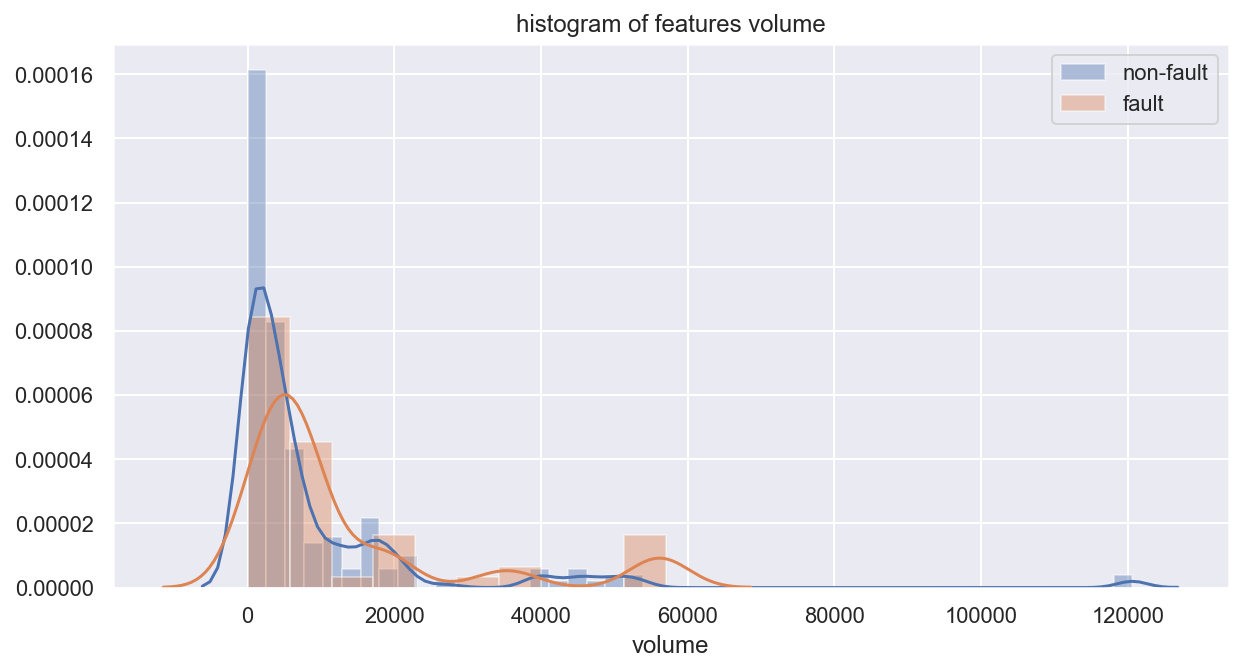

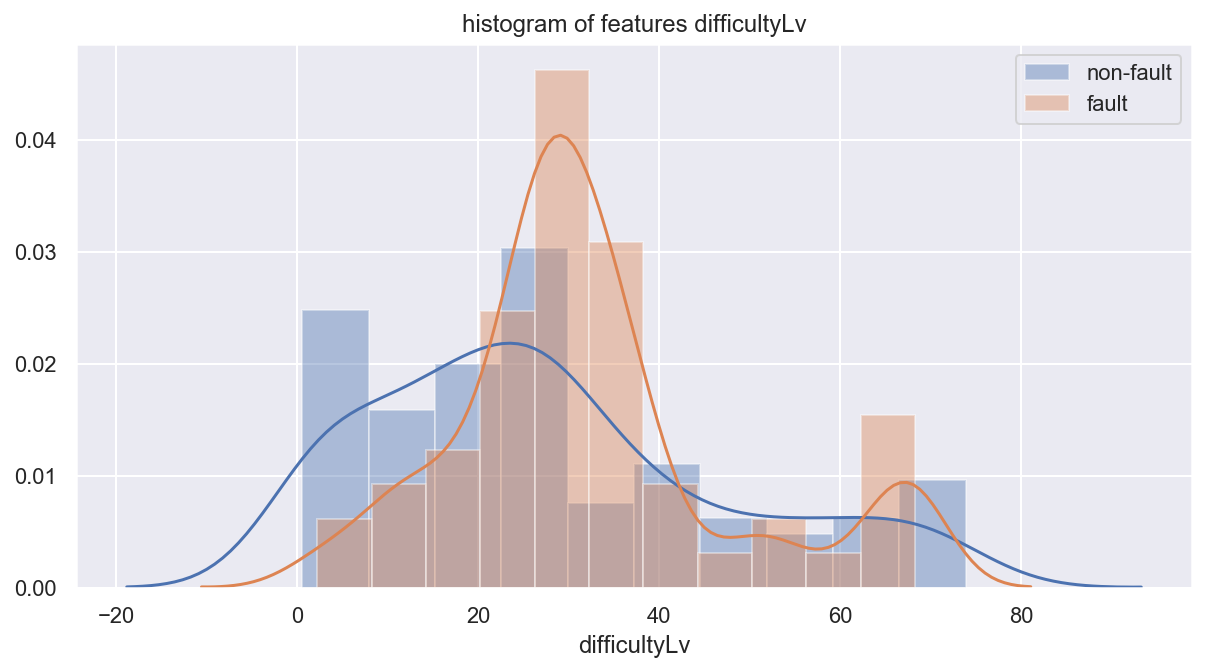

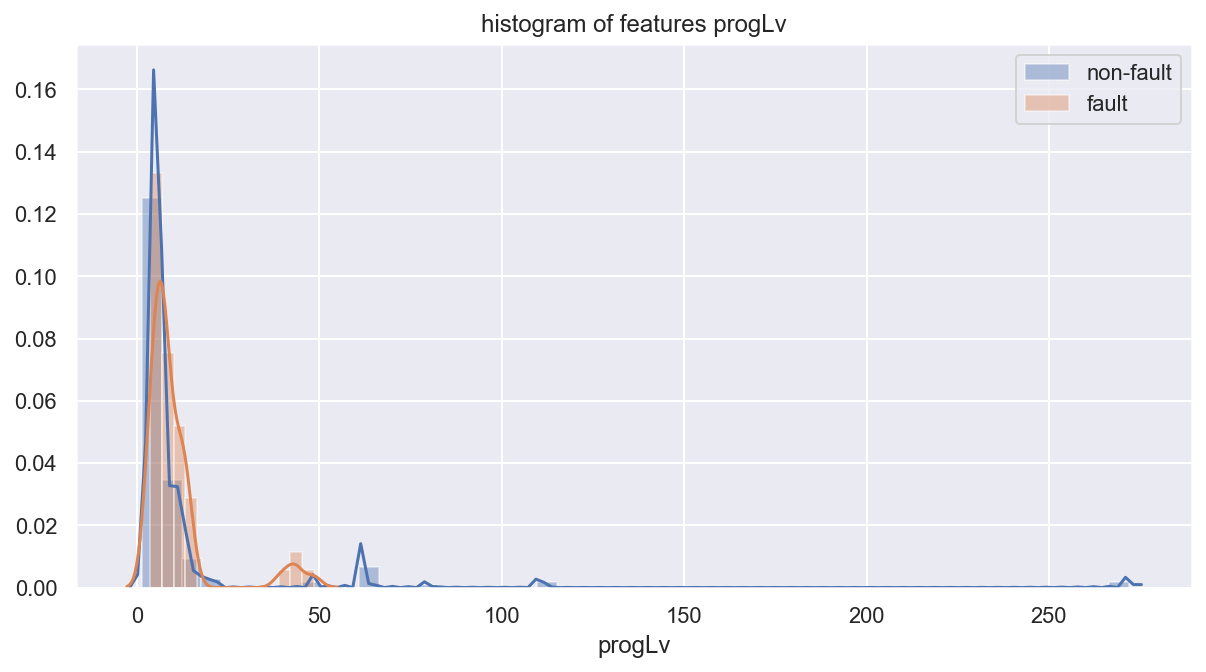

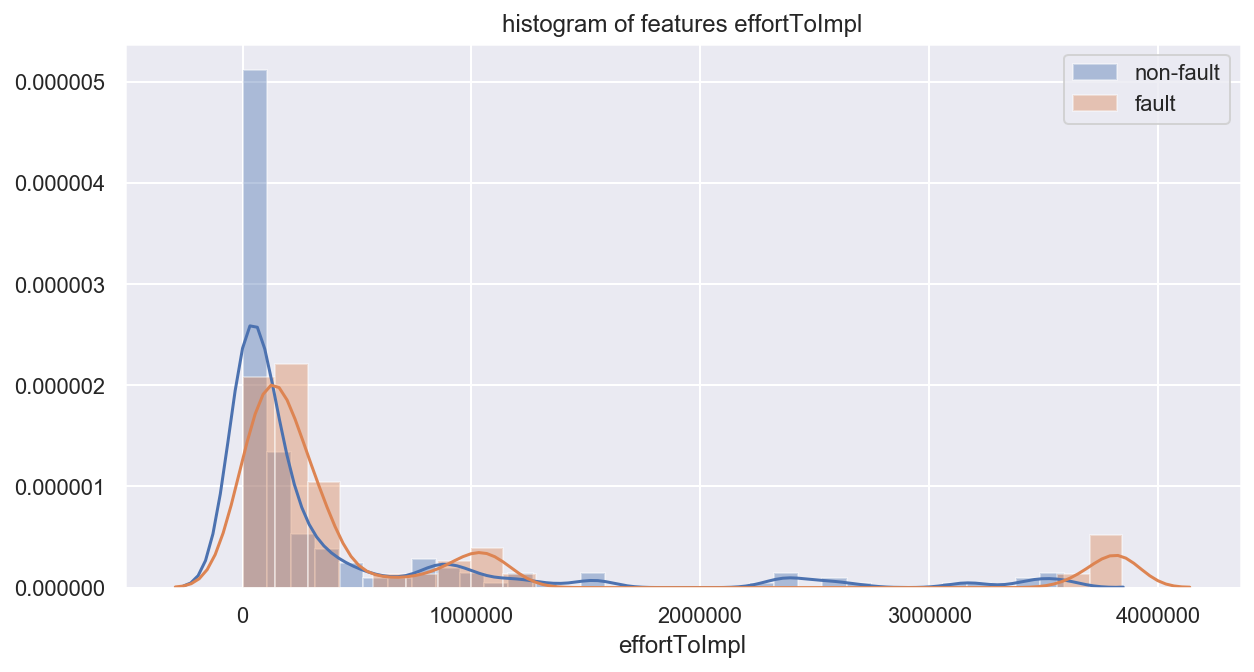

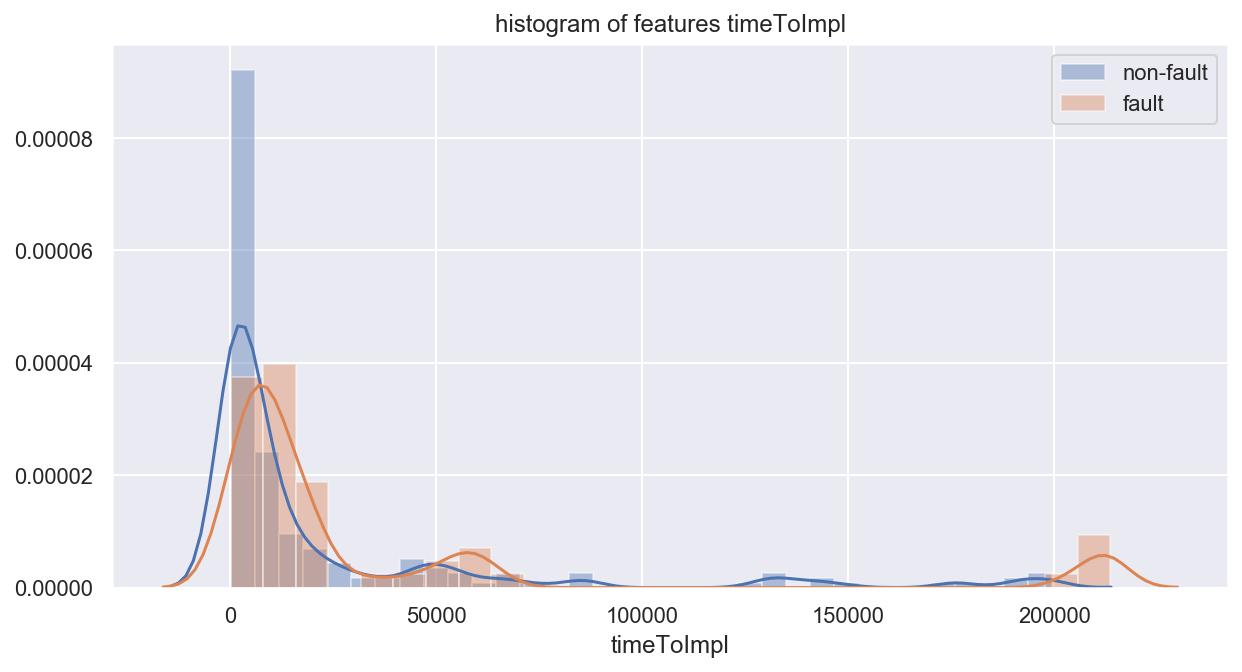

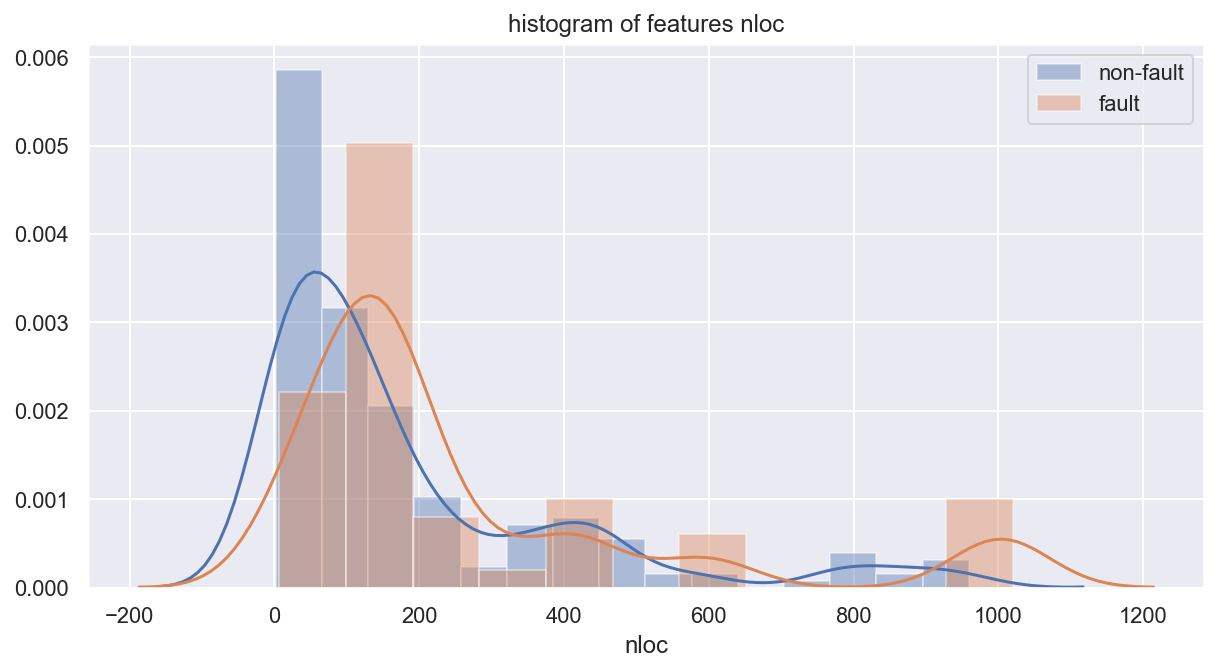

Selected KDE bandwidth is 0. Cannot estiamte density.


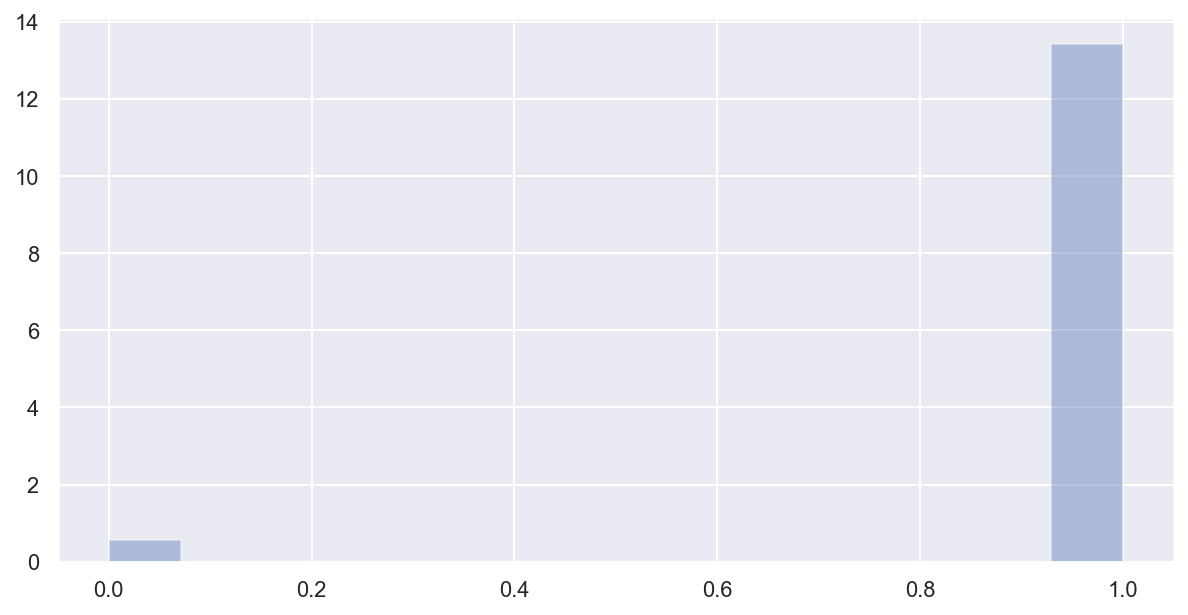

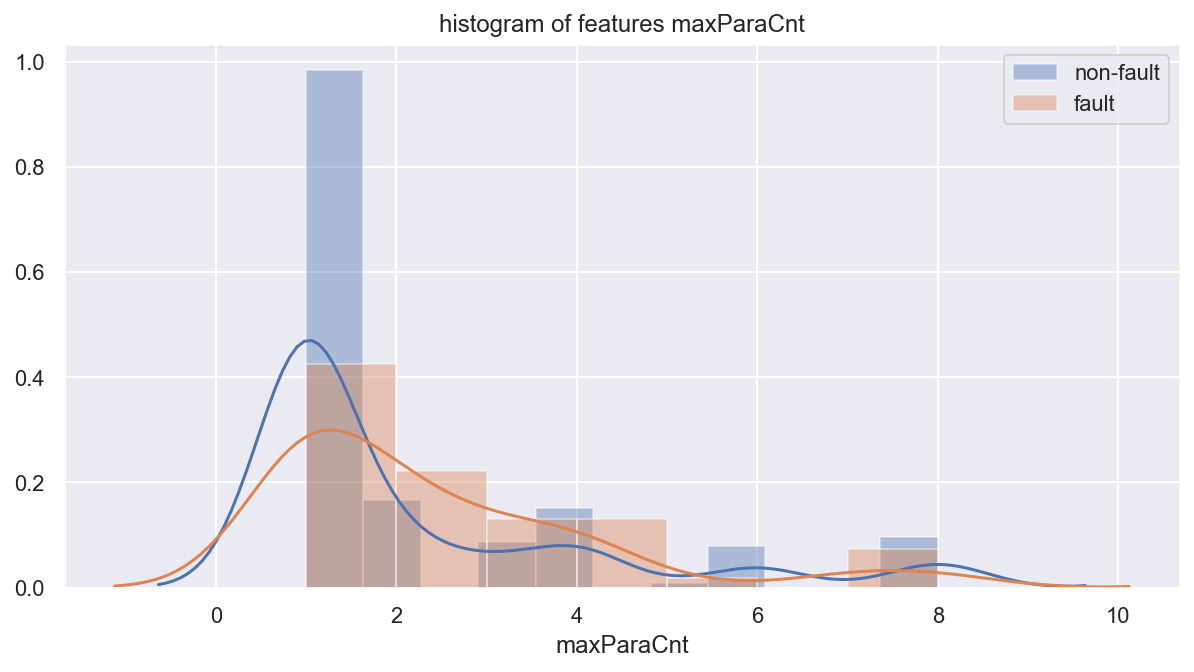

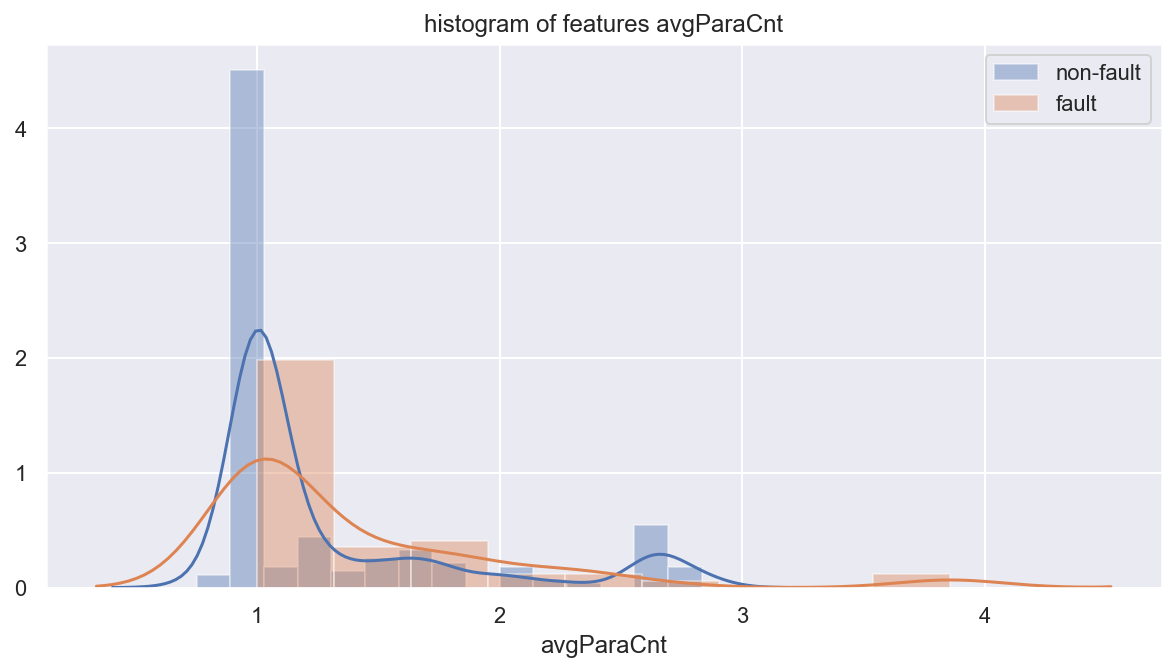

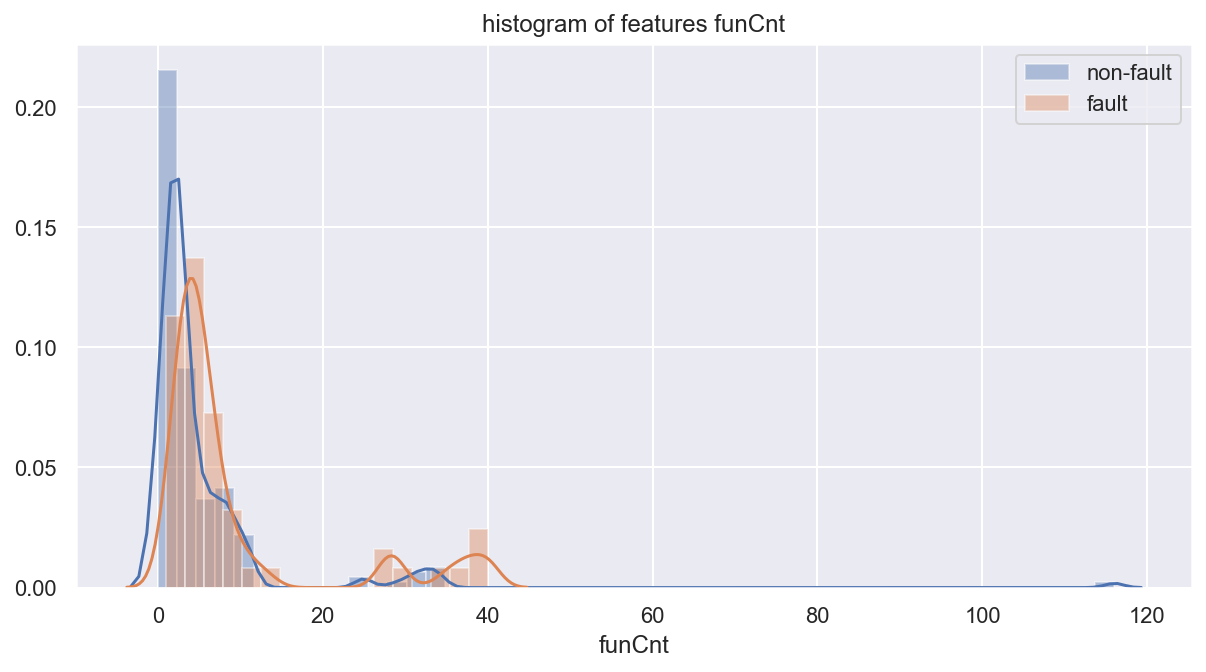

Selected KDE bandwidth is 0. Cannot estiamte density.


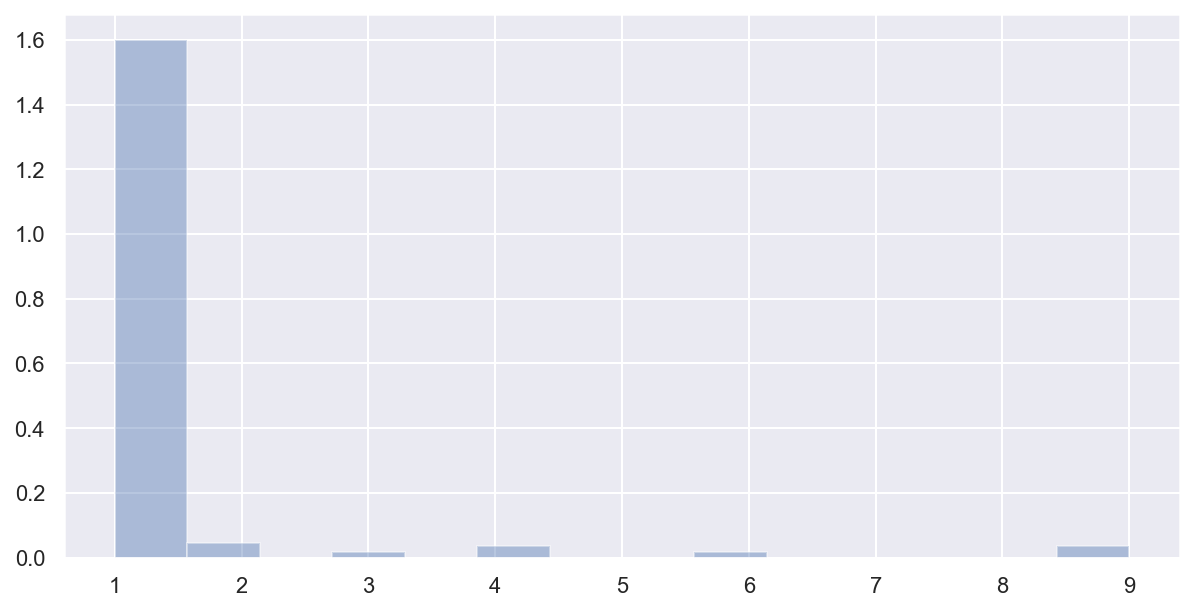

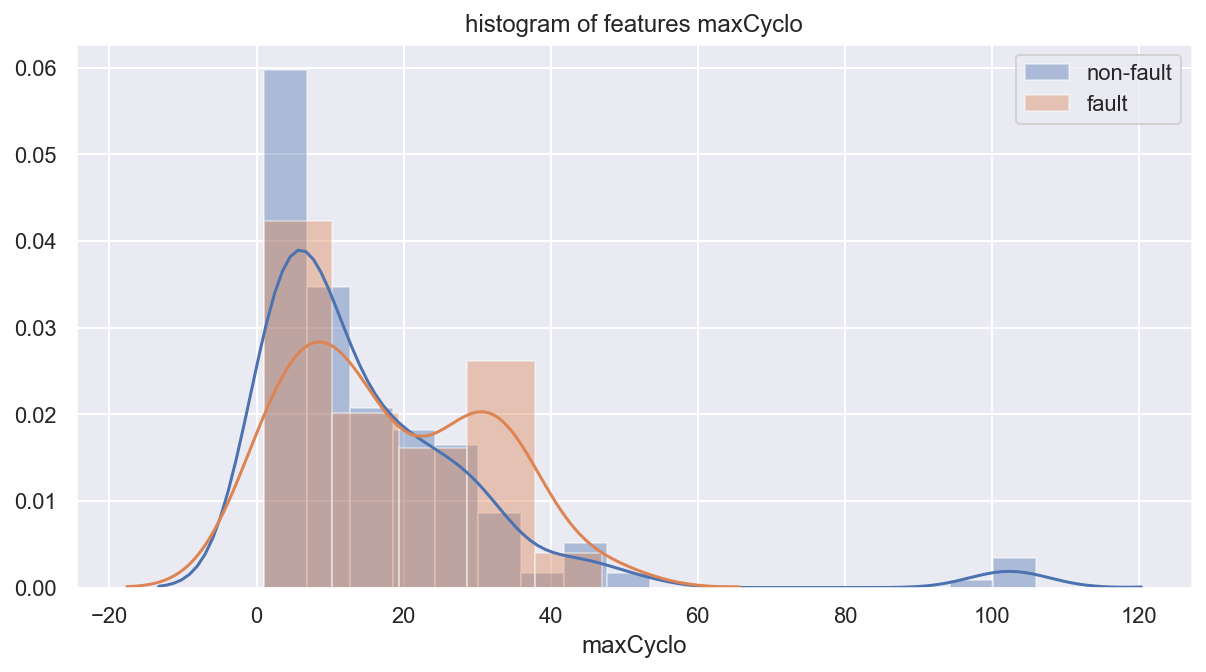

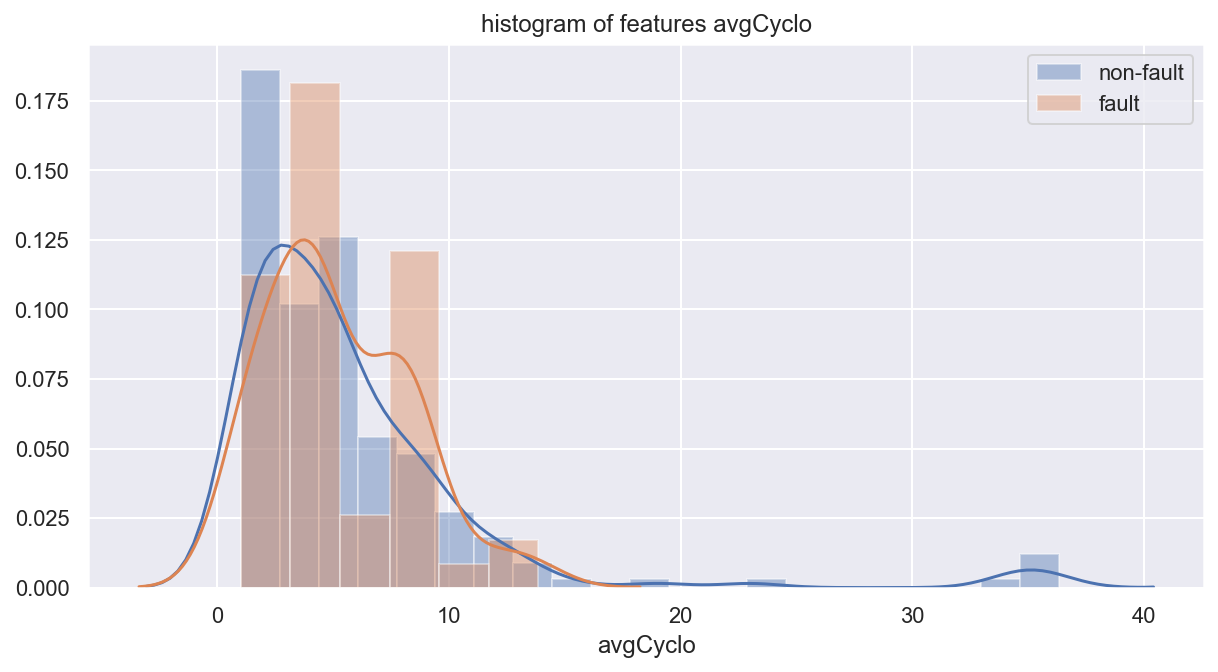

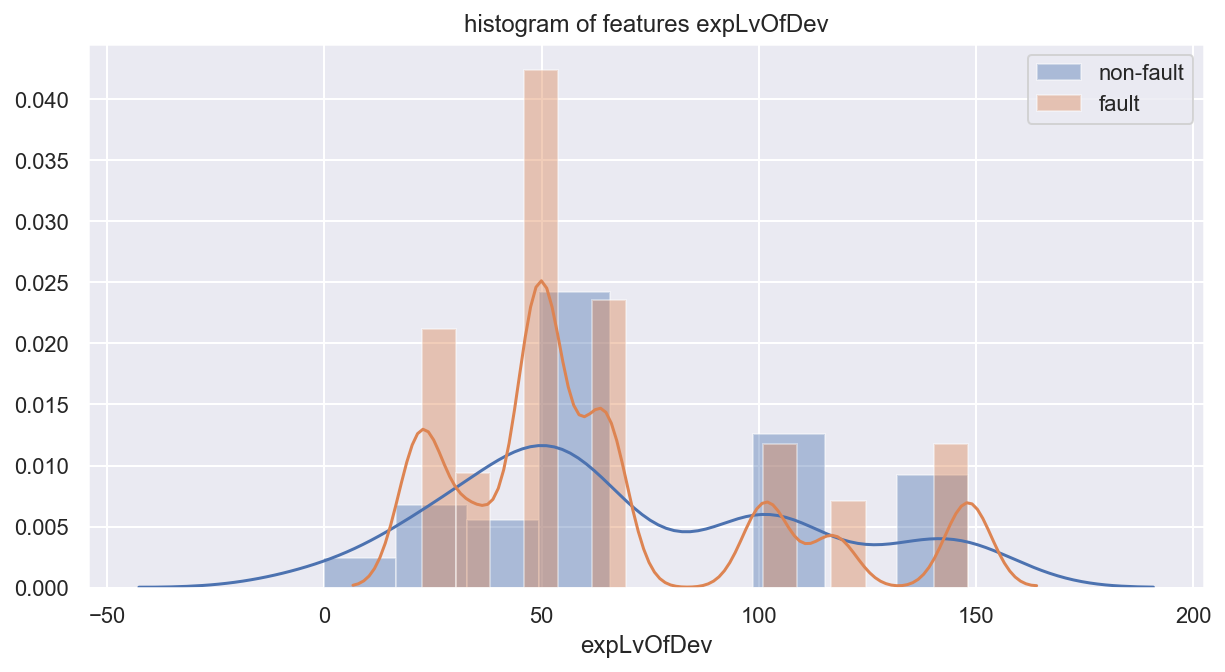

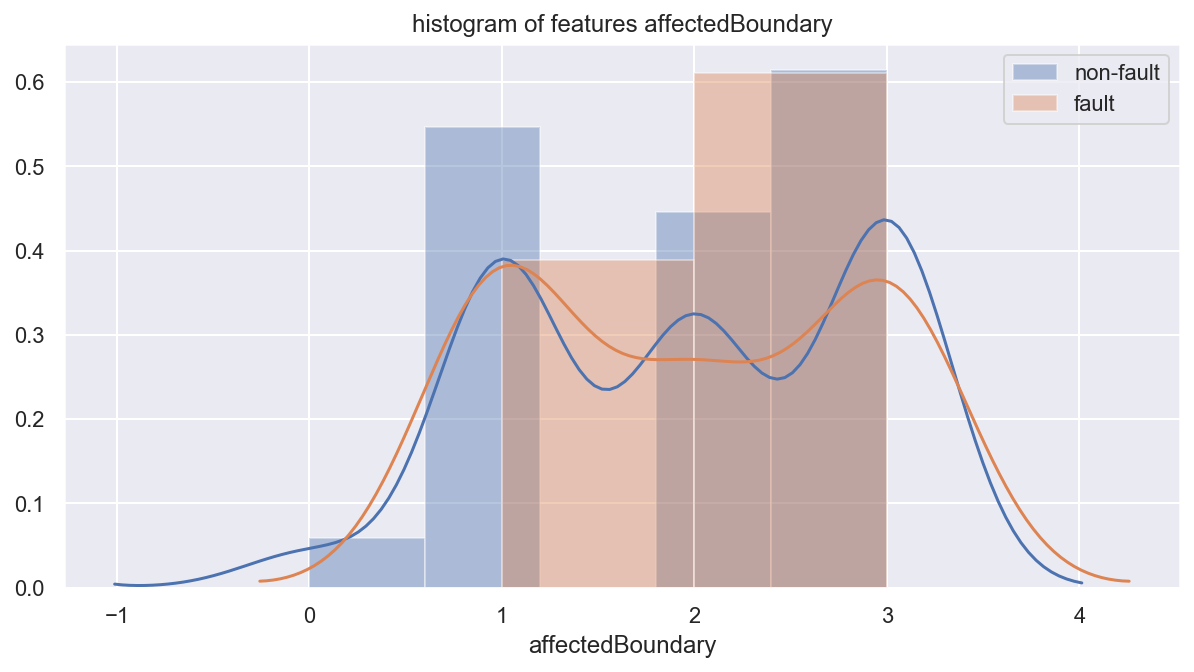

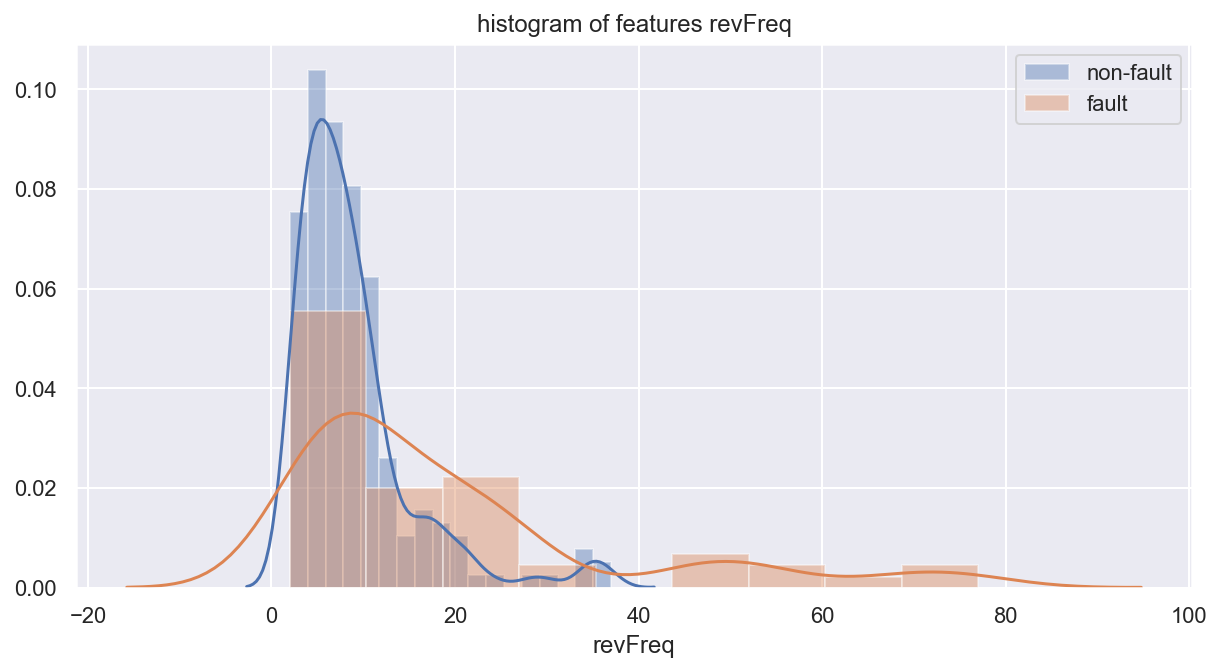

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt

for cnt, col in enumerate(defective):
    try:
        if cnt >= 1:
            plt.figure(figsize=(10, 5))
            sns.distplot(defective[col][defective['isDefective']==0])
            sns.distplot(defective[col][defective['isDefective']==1])
            plt.legend(['non-fault', 'fault'], loc='best')
            plt.title('histogram of features '+str(col))
            plt.show()
        
        if cnt >= 18:
            break
            
    except Exception as e:
        print(e)
        pass

In [220]:
from sklearn.preprocessing import StandardScaler

X = defective.drop(['isDefective'], axis=1)
y = defective['isDefective']

scaler = StandardScaler()
defective_scale = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print(defective_scale)

     progLength   vocaCnt    volume  difficultyLv    progLv  effortToImpl  \
0     -0.309050 -0.073634 -0.302328      0.040485 -0.246584     -0.363926   
1      0.218396 -0.068583  0.088848      1.015753 -0.273126      0.092480   
2     -0.093357 -0.103937 -0.147325      1.094524 -0.340510     -0.107319   
3     -0.443416 -0.093836 -0.403008     -0.558169 -0.092732     -0.462296   
4     -0.283119 -0.164544 -0.293057      0.289981 -0.294278     -0.331281   
..          ...       ...       ...           ...       ...           ...   
247    0.640353  0.330411  0.499429      1.318825 -0.225134      0.580753   
248    2.393007  1.077894  2.177650      1.641292  0.007524      2.590452   
249   -0.142860 -0.108988 -0.184289      0.337590 -0.250276     -0.254338   
250    0.741717  0.269804  0.568717      1.819381 -0.277399      0.859003   
251   -0.344999 -0.220100 -0.343302     -0.093916 -0.239509     -0.399031   

     timeToImpl      nloc  minParaCnt  maxParaCnt  avgParaCnt    funCnt  \


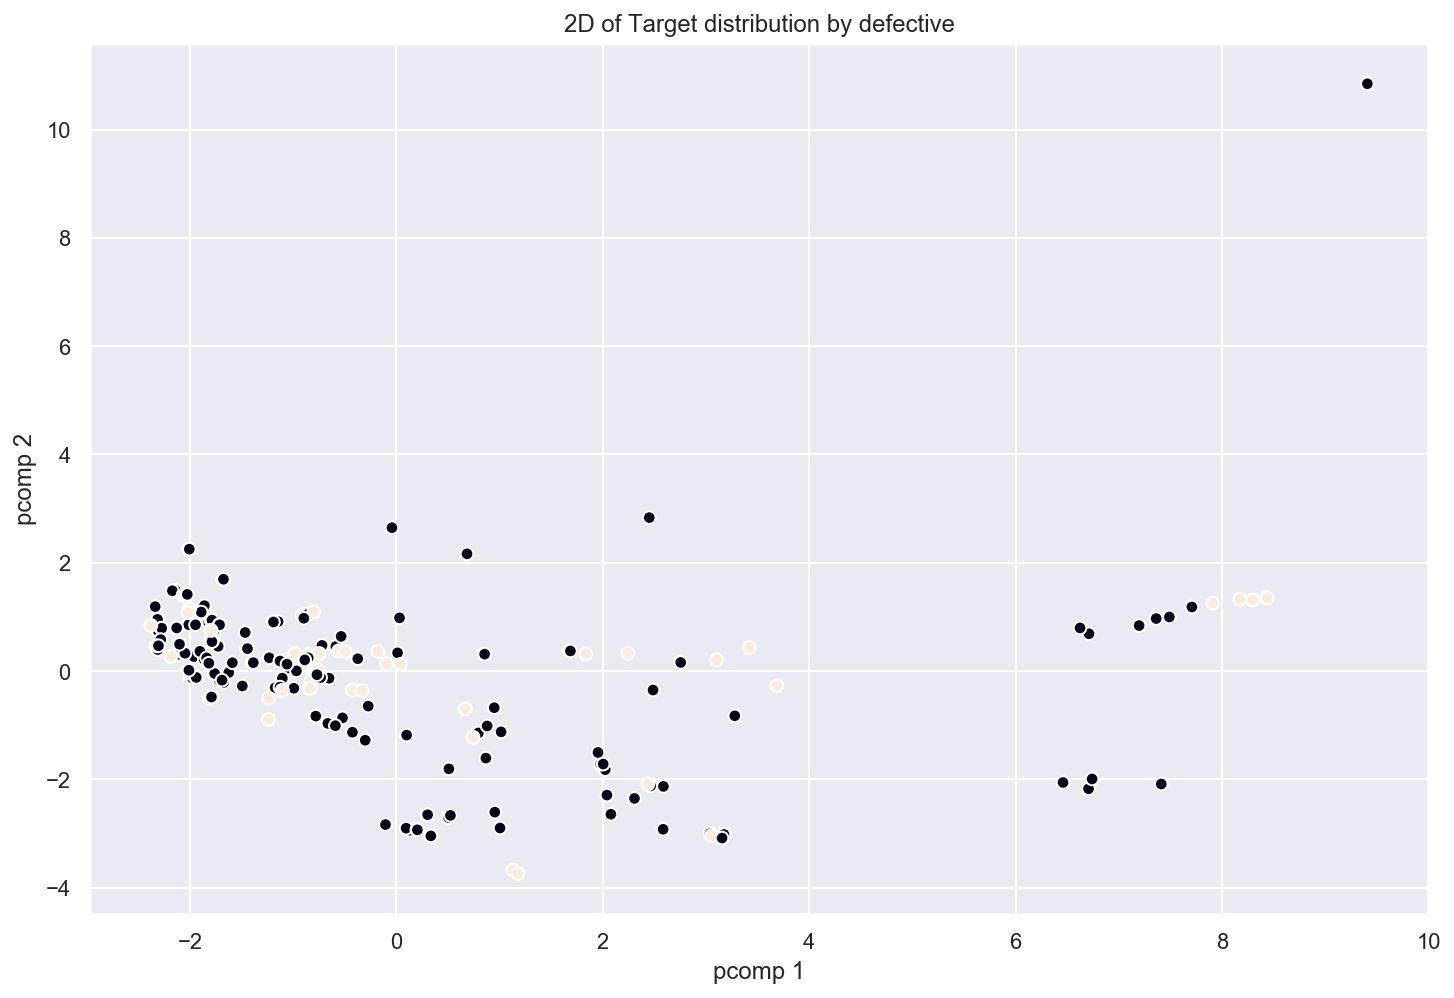

In [221]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca2 = PCA(n_components=2)
data_pca2 = pca2.fit_transform(defective_scale)

plt.figure(figsize=(12, 8))
plt.scatter(data_pca2[:,0], data_pca2[:,1], c=defective['isDefective'], s=40, edgecolors='white')
plt.title("2D of Target distribution by defective")
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.show()

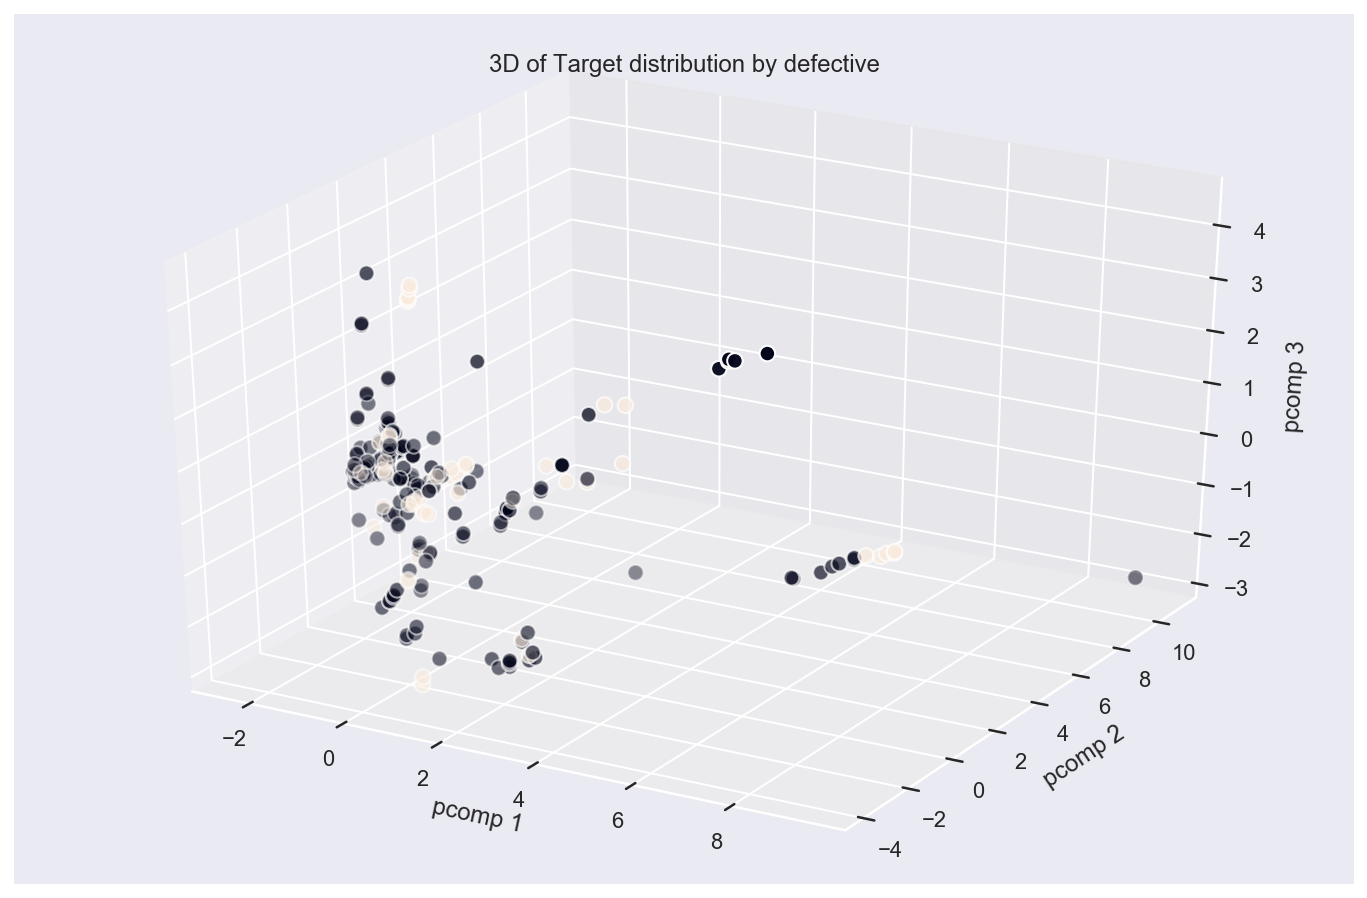

In [222]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca3 = PCA(n_components=3)
data_pca3 = pca3.fit_transform(defective_scale)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca3[:,0], data_pca3[:,1], data_pca3[:,2], c=defective['isDefective'], s=60, edgecolors='white')
ax.set_title('3D of Target distribution by defective')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
plt.show()

In [237]:
defective_tmp.corr()

isDefective  progLength   vocaCnt    volume  difficultyLv  \
isDefective          1.000000    0.121417  0.098602  0.105964      0.105695   
progLength           0.121417    1.000000  0.867505  0.990949      0.666869   
vocaCnt              0.098602    0.867505  1.000000  0.914403      0.364041   
volume               0.105964    0.990949  0.914403  1.000000      0.577773   
difficultyLv         0.105695    0.666869  0.364041  0.577773      1.000000   
progLv              -0.036147    0.453023  0.724870  0.544387     -0.172573   
effortToImpl         0.098291    0.919685  0.637704  0.881379      0.733091   
timeToImpl           0.098291    0.919685  0.637704  0.881379      0.733091   
nloc                 0.133531    0.862923  0.543924  0.796705      0.831790   
minParaCnt          -0.126660    0.054659 -0.014865  0.052328      0.019993   
maxParaCnt           0.046464    0.254130  0.116914  0.209480      0.484761   
avgParaCnt           0.070747    0.096340  0.021225  0.057997      0.364371   
funCnt               0.152194    0.498636  0.303719  0.457089      0.433345   
minCyclo             0.069101   -0.104155 -0.097979 -0.102387     -0.040661   
maxCyclo             0.049822    0.511134  0.219359  0.439886      0.627641   
avgCyclo            -0.040068    0.328718  0.125198  0.273534      0.454537   
expLvOfDev          -0.059133    0.013983 -0.042962 -0.006672      0.158049   
affectedBoundary     0.005338   -0.020727 -0.112609 -0.032710     -0.025243   
revFreq              0.390458    0.154083  0.037590  0.139661      0.026450   

                    progLv  effortToImpl  timeToImpl      nloc  minParaCnt  \
isDefective      -0.036147      0.098291    0.098291  0.133531   -0.126660   
progLength        0.453023      0.919685    0.919685  0.862923    0.054659   
vocaCnt           0.724870      0.637704    0.637704  0.543924   -0.014865   
volume            0.544387      0.881379    0.881379  0.796705    0.052328   
difficultyLv     -0.172573      0.733091    0.733091  0.831790    0.019993   
progLv            1.000000      0.184150    0.184150  0.060483    0.039484   
effortToImpl      0.184150      1.000000    1.000000  0.928456    0.074972   
timeToImpl        0.184150      1.000000    1.000000  0.928456    0.074972   
nloc              0.060483      0.928456    0.928456  1.000000    0.077572   
minParaCnt        0.039484      0.074972    0.074972  0.077572    1.000000   
maxParaCnt       -0.125957      0.288929    0.288929  0.356544    0.021904   
avgParaCnt       -0.112391      0.068938    0.068938  0.173222    0.098426   
funCnt            0.055428      0.567178    0.567178  0.687161    0.049818   
minCyclo         -0.071685     -0.103483   -0.103483 -0.092936    0.063501   
maxCyclo         -0.097496      0.543951    0.543951  0.669249    0.076491   
avgCyclo         -0.105378      0.318332    0.318332  0.416594    0.080499   
expLvOfDev       -0.120104      0.020495    0.020495  0.054578    0.112922   
affectedBoundary  0.006664      0.009087    0.009087  0.053601    0.030810   
revFreq           0.009808      0.141349    0.141349  0.136596    0.087972   

                  maxParaCnt  avgParaCnt    funCnt  minCyclo  maxCyclo  \
isDefective         0.046464    0.070747  0.152194  0.069101  0.049822   
progLength          0.254130    0.096340  0.498636 -0.104155  0.511134   
vocaCnt             0.116914    0.021225  0.303719 -0.097979  0.219359   
volume              0.209480    0.057997  0.457089 -0.102387  0.439886   
difficultyLv        0.484761    0.364371  0.433345 -0.040661  0.627641   
progLv             -0.125957   -0.112391  0.055428 -0.071685 -0.097496   
effortToImpl        0.288929    0.068938  0.567178 -0.103483  0.543951   
timeToImpl          0.288929    0.068938  0.567178 -0.103483  0.543951   
nloc                0.356544    0.173222  0.687161 -0.092936  0.669249   
minParaCnt          0.021904    0.098426  0.049818  0.063501  0.076491   
maxParaCnt          1.000000    0.877061  0.205385 -0.138464  

In [267]:
defective.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   isDefective       252 non-null    int64  
 1   progLength        252 non-null    int64  
 2   vocaCnt           252 non-null    int64  
 3   volume            252 non-null    float64
 4   difficultyLv      252 non-null    float64
 5   progLv            252 non-null    float64
 6   effortToImpl      252 non-null    float64
 7   timeToImpl        252 non-null    float64
 8   nloc              252 non-null    int64  
 9   minParaCnt        252 non-null    int64  
 10  maxParaCnt        252 non-null    int64  
 11  avgParaCnt        252 non-null    float64
 12  funCnt            252 non-null    int64  
 13  minCyclo          252 non-null    int64  
 14  maxCyclo          252 non-null    int64  
 15  avgCyclo          252 non-null    float64
 16  expLvOfDev        252 non-null    float64
 1

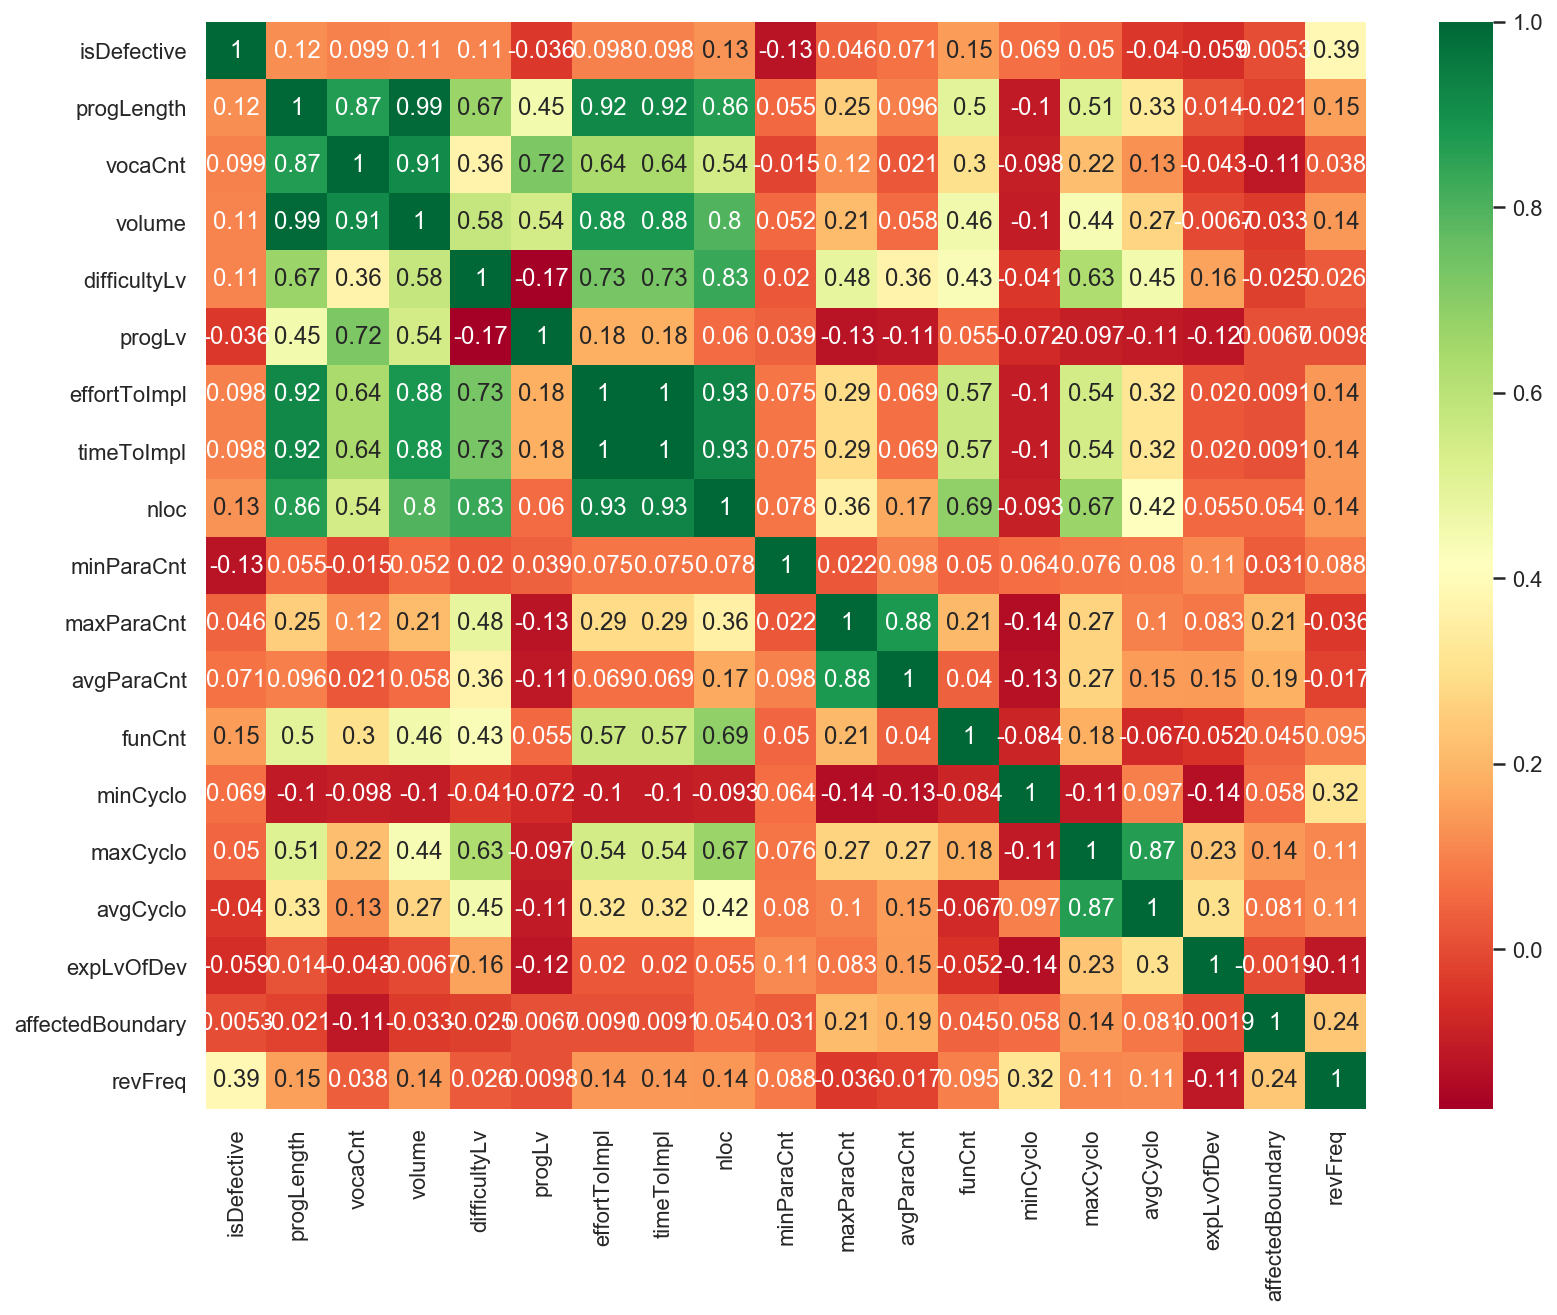

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

defective_tmp = defective.copy()
#defective_tmp['isDefectvie'] = cancer['isDefective'].replace({'M':1, 'B':0})
corrmat = defective_tmp.corr()
top_corr_features = corrmat.index[abs(corrmat["isDefective"])>=0]

# plot
plt.figure(figsize=(13,10))
g = sns.heatmap(defective_tmp[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.show()

Selected KDE bandwidth is 0. Cannot estiamte density.


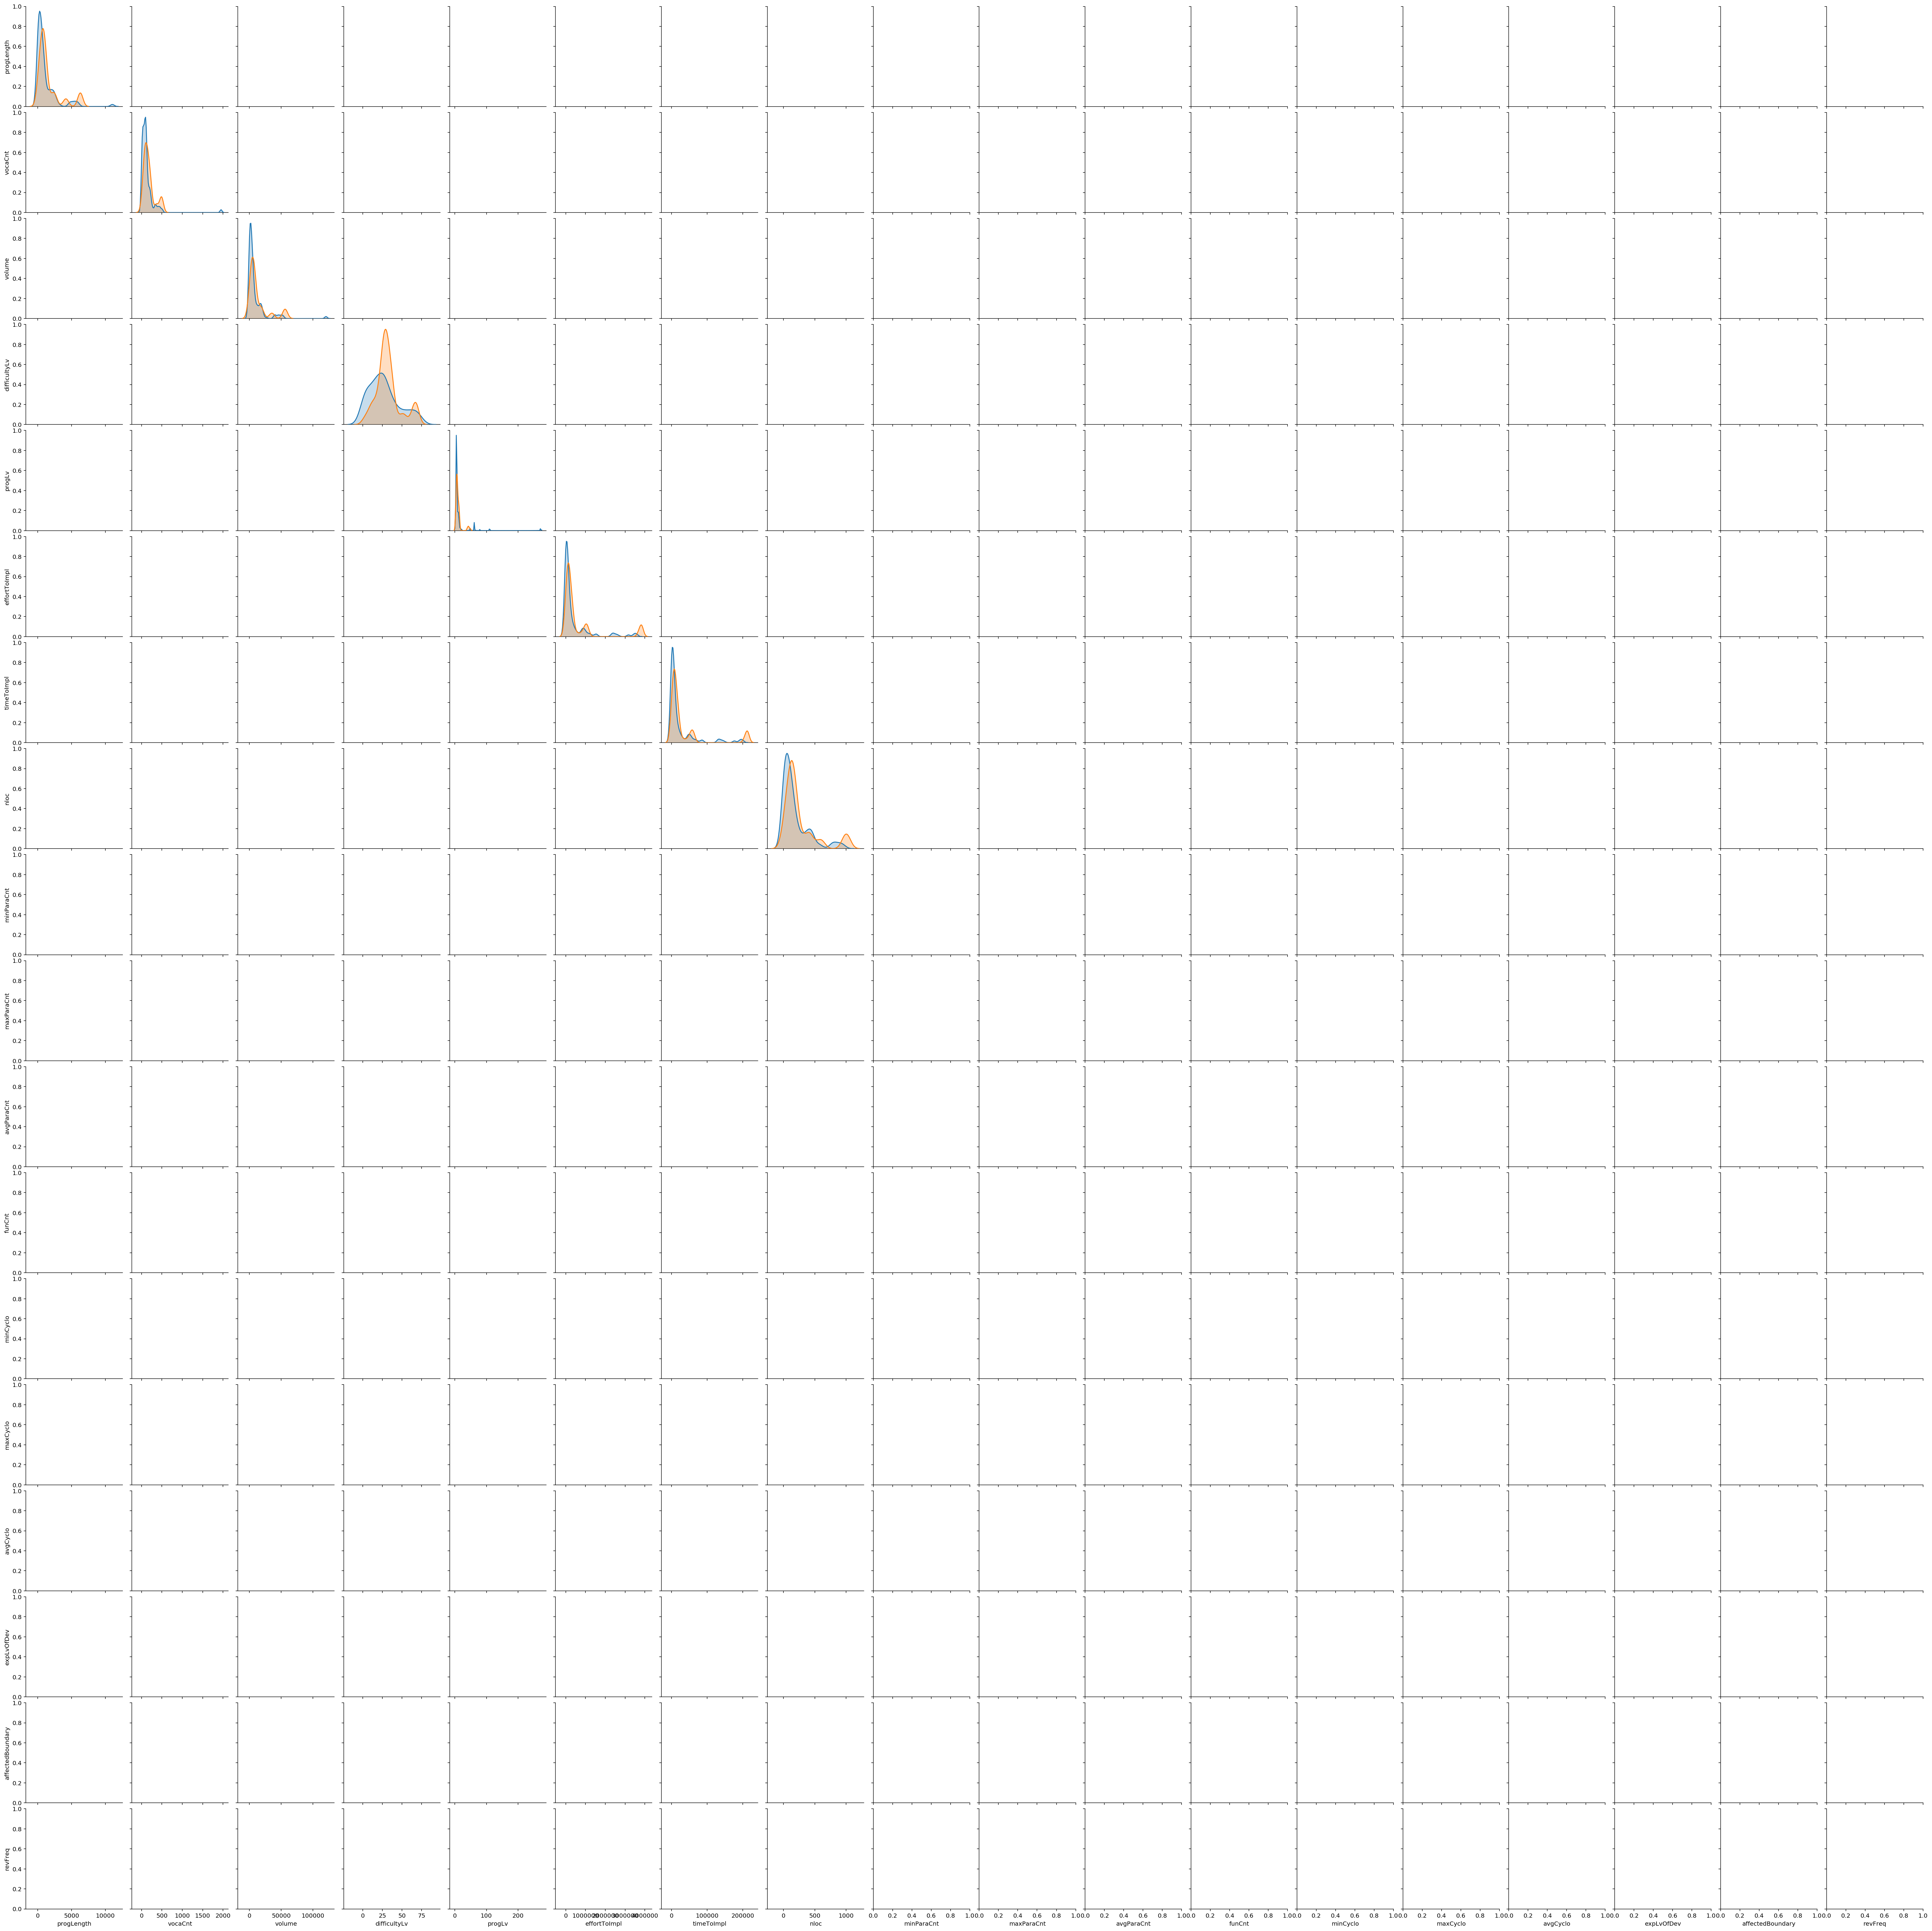

In [12]:
try:
    sns.pairplot(defective_tmp, hue="isDefective")
except Exception as e:
    print(e)
    pass

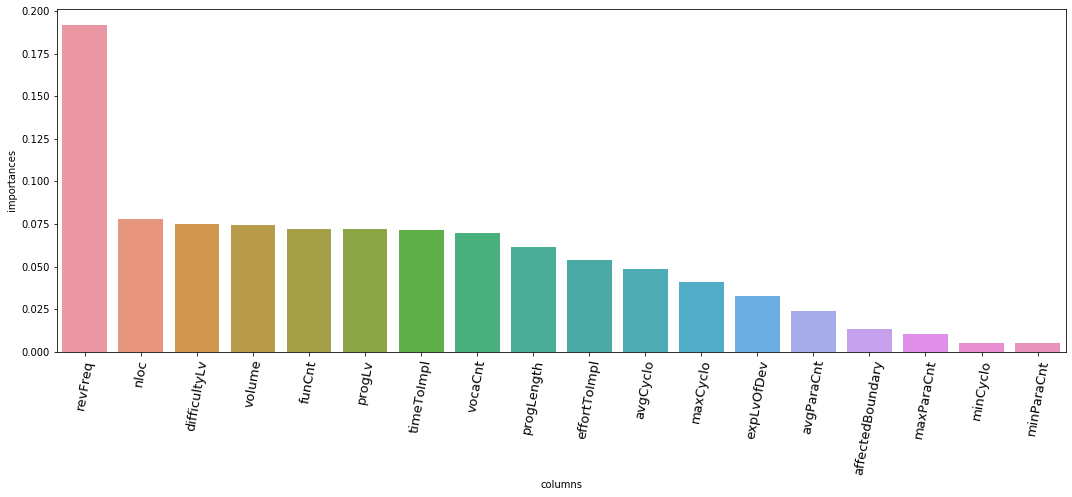

In [89]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# RandomForest
clf = RandomForestClassifier(random_state=42, max_depth=6)
clf.fit(X, y)
feature_importance = clf.feature_importances_

# plot
df_fi = pd.DataFrame({'columns':X.columns, 'importances':feature_importance})
df_fi = df_fi[df_fi['importances'] > 0] # importance가 0이상인 것만 
df_fi = df_fi.sort_values(by=['importances'], ascending=False)

fig = plt.figure(figsize=(15,7))
ax = sns.barplot(df_fi['columns'], df_fi['importances'])
ax.set_xticklabels(df_fi['columns'], rotation=80, fontsize=13)
plt.tight_layout()
plt.show()

## Merged Data Analysis (SFA and RWA)

In [1]:
df_sfa = pd.read_csv("SFA_Faulty_Dataset.csv")
df_rwa = pd.read_csv("RWA_Faulty_Dataset.csv")
df_sfa.tail(3)

Order                swcName  isDefective swcVer  progLength  \
249  1.169.1.2-num-250       Swcs/TarAgSrcSel            0   1.15         973   
250  1.169.1.2-num-251  Swcs/TarTorsBarTqGenr            0    1.8        2474   
251  1.169.1.2-num-252    Swcs/VehKinematCtrl            0   1.13         630   

     vocaCnt        volume  difficultyLv    progLv  effortToImpl  ...  \
249      122   6743.607429     34.961538  5.517104  2.357669e+05  ...   
250      197  18856.956200     62.880682  4.769107  1.185738e+06  ...   
251      100   4185.629400     26.831325  5.814020  1.123060e+05  ...   

     maxParaCnt  avgParaCnt  funCnt  minCyclo  maxCyclo   avgCyclo  \
249           4       2.000       3         1        52  19.000000   
250           8       2.625       8         1        36   8.750000   
251           1       1.000       3         1        19   7.333333   

     expLvOfDev  affectedBoundary                   createdDate  revFreq  
249  101.639344                 3    Apr 1, 2020 2:48:33 PM KST       15  
250  101.639344                 3   Apr 22, 2020 5:42:59 PM KST        8  
251    0.000000                 3   Apr 2, 2020 11:58:58 AM KST       13  

[3 rows x 23 columns]

In [12]:
df_sbw = df_sfa.append(df_rwa).reset_index(drop=True)
df_sbw.drop(["Order", "createdDate"], axis=1, inplace=True)
df_sbw.head(20)


swcName isDefective    swcVer  progLength  vocaCnt  \
0   Cdds/MotCtrl/MotISnsr           0       1.2         691      129   
1           Cdds/SafeTLib           0       1.6        1586      130   
2        Cdds/SafeTLibMgr           0       1.5        1057      123   
3              Cdds/SpiB2           0       1.2         463      125   
4               Cdds/SpiD           0       1.2         735      111   
5            Swcs/ApplCom           0       1.8           7        7   
6     Swcs/ApplComPrivate           0       1.5          12        8   
7           Swcs/IgnDiagc           0      1.17          80       29   
8          Swcs/IoHwAb_An           0       1.2         662      133   
9      Swcs/IoHwAb_B2_Spi           0       1.3         321       90   
10          Swcs/IoHwAb_D           0       1.6         592      123   
11      Swcs/MotPrmEstimn           0  1.10.1.9         811      116   
12           Swcs/PpkTrim           0       1.5        5290      398   
13           Swcs/ActrMot           0       1.3         957      227   
14           Swcs/ApplCom           0      1.12           7        7   
15        Swcs/CtrlModMgr           0       1.3        1834       92   
16       Swcs/DiagPreCond           0       1.5        1621      241   
17          Swcs/FailrMgr           0       1.3         504      100   
18          Swcs/GateDrvr           0       1.3        1333      142   
19         Swcs/IngEgress           0       1.2         197       48   

          volume  difficultyLv      progLv  effortToImpl     timeToImpl  ...  \
0    4844.758033     29.363636    5.618914  1.422597e+05    7903.317398  ...   
1   11137.475350     47.739130    4.886948  5.316934e+05   29538.521580  ...   
2    7338.237832     49.223301    3.028659  3.612123e+05   20067.349410  ...   
3    3225.158124     18.084112    9.861810  5.832412e+04    3240.228956  ...   
4    4993.895662     34.064516    4.303631  1.701146e+05    9450.813295  ...   
5      19.651484      2.000000    4.912871  3.930297e+01       2.183498  ...   
6      36.000000      0.571429  110.250000  2.057143e+01       1.142857  ...   
7     388.638480     10.941176    3.246518  4.252162e+03     236.231233  ...   
8    4670.596972     26.637168    6.582582  1.244115e+05    6911.748715  ...   
9    2083.884844     19.250000    5.623572  4.011478e+04    2228.599069  ...   
10   4109.968587     22.504673    8.115085  9.249350e+04    5138.527704  ...   
11   5561.822587     28.333333    6.928222  1.575850e+05    8754.720739  ...   
12  45687.744240     69.481383    9.463740  3.174448e+06  176358.203100  ...   
13   7490.006902     23.816425   13.204716  1.783852e+05    9910.288252  ...   
14     19.651484      2.000000    4.912871  3.930297e+01       2.183498  ...   
15  11964.212630     70.000000    2.441676  8.374949e+05   46527.493550  ...   
16  12826.793610     38.087156    8.842214  4.885361e+05   27140.893830  ...   
17   3348.503520     24.176471    5.728817  8.095500e+04    4497.499825  ...   
18   9530.612910     37.904762    6.633356  3.612556e+05   20069.756290  ...   
19   1100.237613     16.264706    4.159049  1.789504e+04     994.168954  ...   

    minParaCnt  maxParaCnt  avgParaCnt  funCnt  minCyclo  maxCyclo   avgCyclo  \
0            1           1    1.000000       2         1         8   4.500000   
1            1           3    1.333333       6         9        29  15.000000   
2            1           2    1.100000      10         2        11   4.700000   
3            0           1    0.750000       4         1         7   3.000000   
4            0           4    2.000000       4         1         9   4.500000   
5            1           2    1.117647       0         1        21   2.867647   
6            1           1    1.000000       0         1         5   1.750000   
7            1           1    1.000000       1         3         3   3.000000   
8            1           1    1.000000       6         1         8   2.500000   
9            1

In [21]:
df_sbw_group = df_sbw.groupby(["swcName"])["revFreq"].max().reset_index().sort_values(by="revFreq", ascending=False)
df_sbw_group.head(20)

swcName  revFreq
16             Swcs/ApplCom       79
3   Cdds/MotCtrl/MotCtrlSdl       37
18          Swcs/BattUDiagc       36
80          Swcs/TunVrntSel       35
55             Swcs/PpkTrim       29
58            Swcs/RackPosn       27
53            Swcs/PinionAg       25
57          Swcs/RackAgSnsr       21
11                Cdds/Sent       21
17      Swcs/ApplComPrivate       21
24            Swcs/FailrMgr       20
21         Swcs/DiagPreCond       19
37              Swcs/ModMgr       19
60   Swcs/RackPosnTrckgCtrl       19
39            Swcs/MotAgEtc       18
28            Swcs/IgnDiagc       18
82              Swcs/VehSpd       18
78          Swcs/TqRampCtrl       18
62     Swcs/RunningRstDiagc       17
71          Swcs/SteerWhlTq       16

In [5]:
df_sbw.head()

swcName isDefective swcVer  progLength  vocaCnt  \
0  Cdds/MotCtrl/MotISnsr           0    1.2         691      129   
1          Cdds/SafeTLib           0    1.6        1586      130   
2       Cdds/SafeTLibMgr           0    1.5        1057      123   
3             Cdds/SpiB2           0    1.2         463      125   
4              Cdds/SpiD           0    1.2         735      111   

         volume  difficultyLv    progLv  effortToImpl    timeToImpl  ...  \
0   4844.758033     29.363636  5.618914  142259.71320   7903.317398  ...   
1  11137.475350     47.739130  4.886948  531693.38850  29538.521580  ...   
2   7338.237832     49.223301  3.028659  361212.28940  20067.349410  ...   
3   3225.158124     18.084112  9.861810   58324.12121   3240.228956  ...   
4   4993.895662     34.064516  4.303631  170114.63930   9450.813295  ...   

   minParaCnt  maxParaCnt  avgParaCnt  funCnt  minCyclo  maxCyclo  avgCyclo  \
0           1           1    1.000000       2         1         8       4.5   
1           1           3    1.333333       6         9        29      15.0   
2           1           2    1.100000      10         2        11       4.7   
3           0           1    0.750000       4         1         7       3.0   
4           0           4    2.000000       4         1         9       4.5   

   expLvOfDev  affectedBoundary  revFreq  
0  148.163934                 1        2  
1   49.475410                 0        6  
2   49.475410                 0        5  
3   22.393443                 0        2  
4   22.393443                 0        2  

[5 rows x 21 columns]

In [5]:
df_sbw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   swcName           446 non-null    object 
 1   isDefective       446 non-null    object 
 2   swcVer            446 non-null    object 
 3   progLength        446 non-null    int64  
 4   vocaCnt           446 non-null    int64  
 5   volume            446 non-null    float64
 6   difficultyLv      446 non-null    float64
 7   progLv            446 non-null    float64
 8   effortToImpl      446 non-null    float64
 9   timeToImpl        446 non-null    float64
 10  nloc              446 non-null    int64  
 11  minParaCnt        446 non-null    int64  
 12  maxParaCnt        446 non-null    int64  
 13  avgParaCnt        446 non-null    float64
 14  funCnt            446 non-null    int64  
 15  minCyclo          446 non-null    int64  
 16  maxCyclo          446 non-null    int64  
 1

In [6]:
df_sbw.describe()

progLength      vocaCnt         volume  difficultyLv      progLv  \
count    446.000000   446.000000     446.000000    446.000000  446.000000   
mean    1150.152466   135.896861    9162.240034     27.565623   12.033622   
std     1681.632520   187.700247   15791.449462     18.671350   26.374027   
min        7.000000     7.000000      19.651484      0.571429    1.427018   
25%      207.000000    52.000000    1248.238463     14.325581    4.746716   
50%      592.000000    96.500000    4109.968587     26.704545    5.891959   
75%     1079.000000   147.500000    7938.688312     36.505747    9.463740   
max    11039.000000  1951.000000  120656.248600     73.894737  271.946401   

       effortToImpl     timeToImpl         nloc  minParaCnt  maxParaCnt  \
count  4.460000e+02     446.000000   446.000000   446.00000  446.000000   
mean   4.368385e+05   24268.806054   192.728700     0.93722    2.150224   
std    8.800122e+05   48889.566761   239.324331     0.24284    1.882465   
min    2.057143e+01       1.142857     2.000000     0.00000    1.000000   
25%    1.788507e+04     993.614809    45.000000     1.00000    1.000000   
50%    1.050799e+05    5837.774908   114.000000     1.00000    1.000000   
75%    2.878289e+05   15990.493983   213.000000     1.00000    3.000000   
max    3.844545e+06  213585.824300  1020.000000     1.00000    8.000000   

       avgParaCnt      funCnt    minCyclo    maxCyclo    avgCyclo  expLvOfDev  \
count  446.000000  446.000000  446.000000  446.000000  446.000000  446.000000   
mean     1.290271    5.769058    1.417040   15.616592    5.394608   66.966846   
std      0.549249    9.416363    1.488858   16.167344    4.785597   38.970963   
min      0.750000    0.000000    1.000000    1.000000    1.000000    0.000000   
25%      1.000000    2.000000    1.000000    4.250000    2.250000   49.475410   
50%      1.000000    3.000000    1.000000   10.000000    4.291667   52.229508   
75%      1.333333    6.000000    1.000000   22.000000    7.458333  101.639344   
max      3.857143  116.000000    9.000000  119.000000   36.333333  148.163934   

       affectedBoundary     revFreq  
count        446.000000  446.000000  
mean           1.923767   11.394619  
std            0.873335   11.496804  
min            0.000000    2.000000  
25%            1.000000    5.000000  
50%            2.000000    8.000000  
75%            3.000000   12.750000  
max            3.000000   79.000000

In [7]:
df_sbw.tail(2)

swcName isDefective swcVer  progLength  vocaCnt       volume  \
444  Swcs/SigCorrlnDiagc           Y    1.6         214       57  1248.238463   
445      Swcs/TunVrntSel           N   1.35         116       31   574.686772   

     difficultyLv    progLv  effortToImpl  timeToImpl  ...  minParaCnt  \
444     14.325581  6.082373   17881.74170  993.430095  ...           1   
445     12.272727  3.815479    7052.97402  391.831890  ...           1   

     maxParaCnt  avgParaCnt  funCnt  minCyclo  maxCyclo  avgCyclo  expLvOfDev  \
444           1         1.0       2         1         9  5.000000   22.393443   
445           1         1.0       0         2        10  5.416667   49.475410   

     affectedBoundary  revFreq  
444                 1        6  
445                 3       35  

[2 rows x 21 columns]

In [8]:
df_sbw.loc[df_sbw["isDefective"] == "N", "isDefective"] = "0"
df_sbw.loc[df_sbw["isDefective"] == "Y", "isDefective"] = "1"

df_sbw

swcName isDefective swcVer  progLength  vocaCnt  \
0    Cdds/MotCtrl/MotISnsr           0    1.2         691      129   
1            Cdds/SafeTLib           0    1.6        1586      130   
2         Cdds/SafeTLibMgr           0    1.5        1057      123   
3               Cdds/SpiB2           0    1.2         463      125   
4                Cdds/SpiD           0    1.2         735      111   
..                     ...         ...    ...         ...      ...   
441           Swcs/PpkTrim           1   1.28        6379      494   
442        Swcs/RackAgSnsr           1   1.21        1226      119   
443          Swcs/RackPosn           1   1.27        2494      181   
444    Swcs/SigCorrlnDiagc           1    1.6         214       57   
445        Swcs/TunVrntSel           0   1.35         116       31   

           volume  difficultyLv     progLv  effortToImpl     timeToImpl  ...  \
0     4844.758033     29.363636   5.618914  1.422597e+05    7903.317398  ...   
1    11137.475350     47.739130   4.886948  5.316934e+05   29538.521580  ...   
2     7338.237832     49.223301   3.028659  3.612123e+05   20067.349410  ...   
3     3225.158124     18.084112   9.861810  5.832412e+04    3240.228956  ...   
4     4993.895662     34.064516   4.303631  1.701146e+05    9450.813295  ...   
..            ...           ...        ...           ...            ...  ...   
441  57081.634570     67.351695  12.583439  3.844545e+06  213585.824300  ...   
442   8453.046578     47.575758   3.734581  4.021601e+05   22342.227490  ...   
443  18704.615640     53.695122   6.487526  1.004347e+06   55797.034330  ...   
444   1248.238463     14.325581   6.082373  1.788174e+04     993.430095  ...   
445    574.686772     12.272727   3.815479  7.052974e+03     391.831890  ...   

     minParaCnt  maxParaCnt  avgParaCnt  funCnt  minCyclo  maxCyclo  \
0             1           1    1.000000       2         1         8   
1             1           3    1.333333       6         9        29   
2             1           2    1.100000      10         2        11   
3             0           1    0.750000       4         1         7   
4             0           4    2.000000       4         1         9   
..          ...         ...         ...     ...       ...       ...   
441           1           4    1.200000      40         1        32   
442           1           2    1.250000       4         1        45   
443           1           7    2.857143       7         1       119   
444           1           1    1.000000       2         1         9   
445           1           1    1.000000       0         2        10   

      avgCyclo  expLvOfDev  affectedBoundary  revFreq  
0     4.500000  148.163934                 1        2  
1    15.000000   49.475410                 0        6  
2     4.700000   49.475410                 0        5  
3     3.000000   22.393443                 0        2  
4     4.500000   22.393443                 0        2  
..         ...         ...               ...      ...  
441   3.700000   49.475410                 2       28  
442  12.000000   22.786885                 2       21  
443  18.000000   64.754098                 2       27  
444   5.000000   22.393443                 1        6  
445   5.416667   49.475410                 3       35  

[446 rows x 21 columns]

In [2]:
df_sbw["isDefective"].value_counts()

# normal and defective rating
normal_rating = round(len(df_sbw[df_sbw["isDefective"] == 0]) / len(df_sbw) * 100, 3)
defective_rating = round(len(df_sbw[df_sbw["isDefective"] == 1]) / len(df_sbw) * 100, 3)


print("Defective software component rate is {}% in CANoo SbW.".format(defective_rating))
print("No defective software component rate is {}% in CANoo SbW.".format(normal_rating))


NameError: name 'df_sbw' is not defined

In [3]:
df_sbw[df_sbw["isDefective"] == 0]

NameError: name 'df_sbw' is not defined

In [11]:
df_sbw_preproc = pd.DataFrame(columns=["total", "total_rate", "change_count", "change_rate", "faulty_count", "faulty_rate"])

df_sbw_preproc

Empty DataFrame
Columns: [total, total_rate, change_count, change_rate, faulty_count, faulty_rate]
Index: []

In [12]:
df_sbw_preproc["total"] = df_sbw["swcName"].value_counts(normalize=False)

In [13]:
df_sbw_preproc["total_rate"] = df_sbw["swcName"].value_counts(normalize=True) * 100

In [14]:
faulty_df = df_sbw[df_sbw["isDefective"] == 1]

faulty_counts = faulty_df["swcName"].value_counts().fillna(0)
faulty_rate = faulty_df["swcName"].value_counts(normalize=True) * 100

df_sbw_preproc["faulty_count"] = faulty_counts
df_sbw_preproc["faulty_rate"] = faulty_rate

In [15]:
df_sbw_preproc["change_count"] = df_sbw_preproc["total"].fillna(0) - df_sbw_preproc["faulty_count"].fillna(0)
df_sbw_preproc["change_rate"] = (df_sbw_preproc["total"].fillna(0) - df_sbw_preproc["faulty_count"].fillna(0)) / len(df_sbw_preproc["change_count"]) * 100


In [16]:
pd.set_option('display.max_row', 20)

df_sbw_preproc.sort_values(by="change_count", ascending=False)

total  total_rate  change_count  change_rate  \
Swcs/ApplCom            28    6.278027          20.0    24.096386   
Swcs/ApplComPrivate     17    3.811659          17.0    20.481928   
Swcs/PpkTrim            21    4.708520          16.0    19.277108   
Swcs/IoHwAb_B2_Spi      10    2.242152          10.0    12.048193   
Swcs/FailrMgr           16    3.587444          10.0    12.048193   
...                    ...         ...           ...          ...   
Swcs/HandsOnDetn         1    0.224215           1.0     1.204819   
Swcs/SFACtrlSigProc      1    0.224215           1.0     1.204819   
Swcs/HptcCtrl            1    0.224215           1.0     1.204819   
Swcs/RegUDiagc           1    0.224215           1.0     1.204819   
Swcs/SysLib              1    0.224215           1.0     1.204819   

                     faulty_count  faulty_rate  
Swcs/ApplCom                  8.0    14.814815  
Swcs/ApplComPrivate           NaN          NaN  
Swcs/PpkTrim                  5.0     9.259259  
Swcs/IoHwAb_B2_Spi            NaN          NaN  
Swcs/FailrMgr                 6.0    11.111111  
...                           ...          ...  
Swcs/HandsOnDetn              NaN          NaN  
Swcs/SFACtrlSigProc           NaN          NaN  
Swcs/HptcCtrl                 NaN          NaN  
Swcs/RegUDiagc                NaN          NaN  
Swcs/SysLib                   NaN          NaN  

[83 rows x 6 columns]

In [17]:
df_sbw.tail(2)

swcName isDefective swcVer  progLength  vocaCnt       volume  \
444  Swcs/SigCorrlnDiagc           1    1.6         214       57  1248.238463   
445      Swcs/TunVrntSel           0   1.35         116       31   574.686772   

     difficultyLv    progLv  effortToImpl  timeToImpl  ...  minParaCnt  \
444     14.325581  6.082373   17881.74170  993.430095  ...           1   
445     12.272727  3.815479    7052.97402  391.831890  ...           1   

     maxParaCnt  avgParaCnt  funCnt  minCyclo  maxCyclo  avgCyclo  expLvOfDev  \
444           1         1.0       2         1         9  5.000000   22.393443   
445           1         1.0       0         2        10  5.416667   49.475410   

     affectedBoundary  revFreq  
444                 1        6  
445                 3       35  

[2 rows x 21 columns]

### Data missing check

In [18]:
import missingno as msno

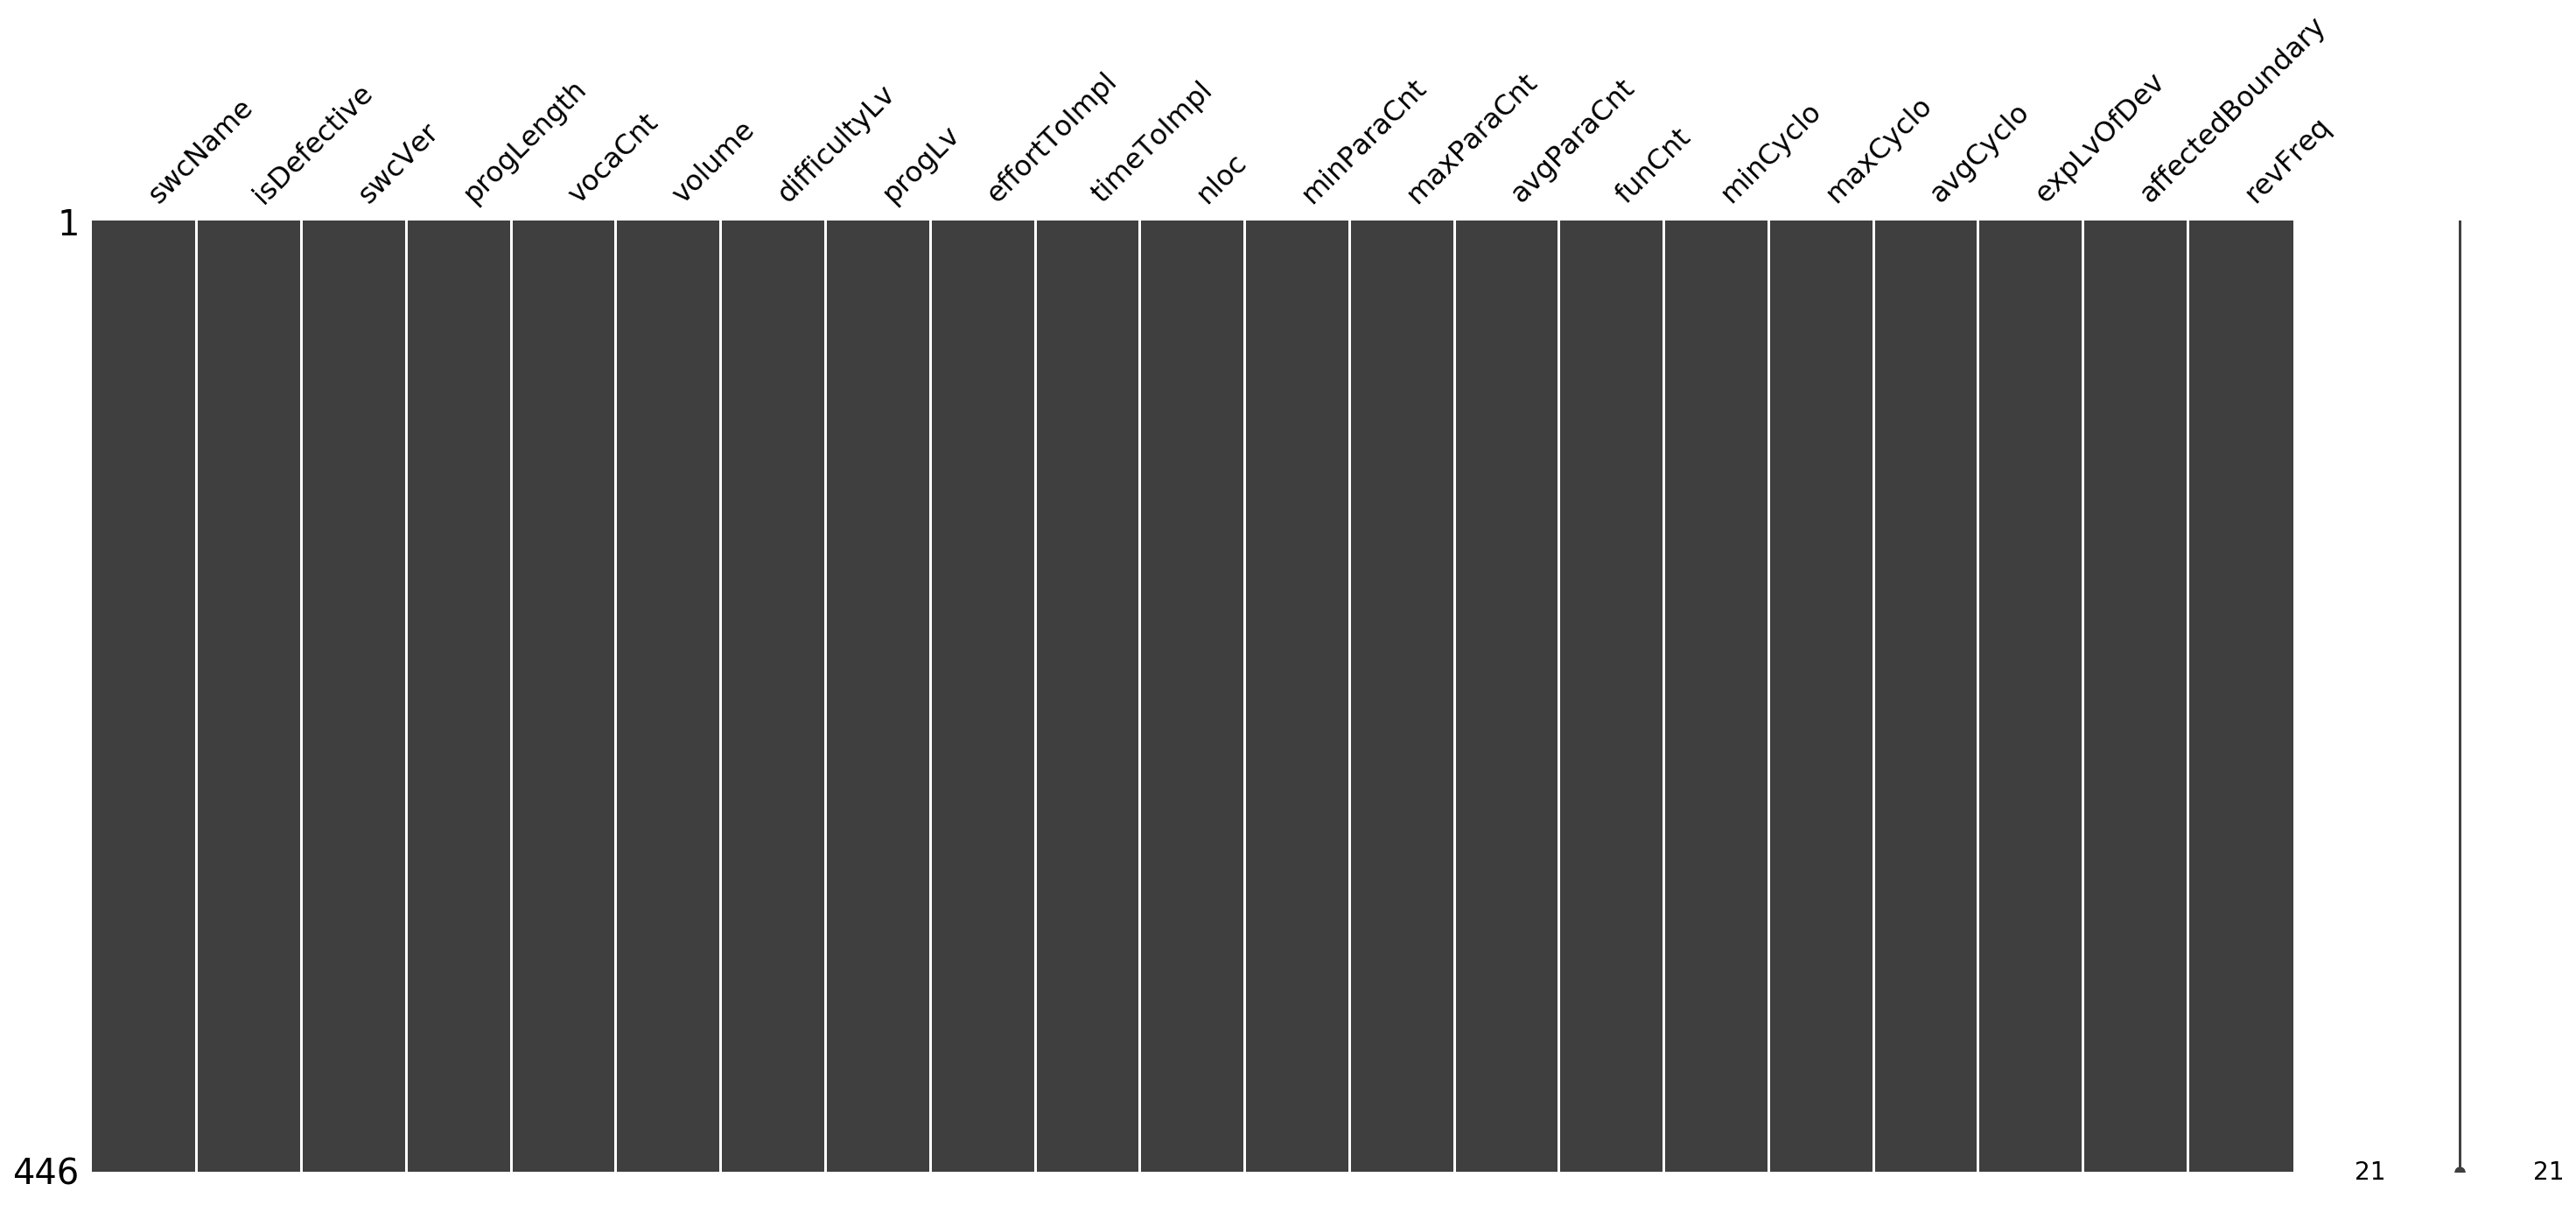

In [19]:
msno.matrix(df_sbw)

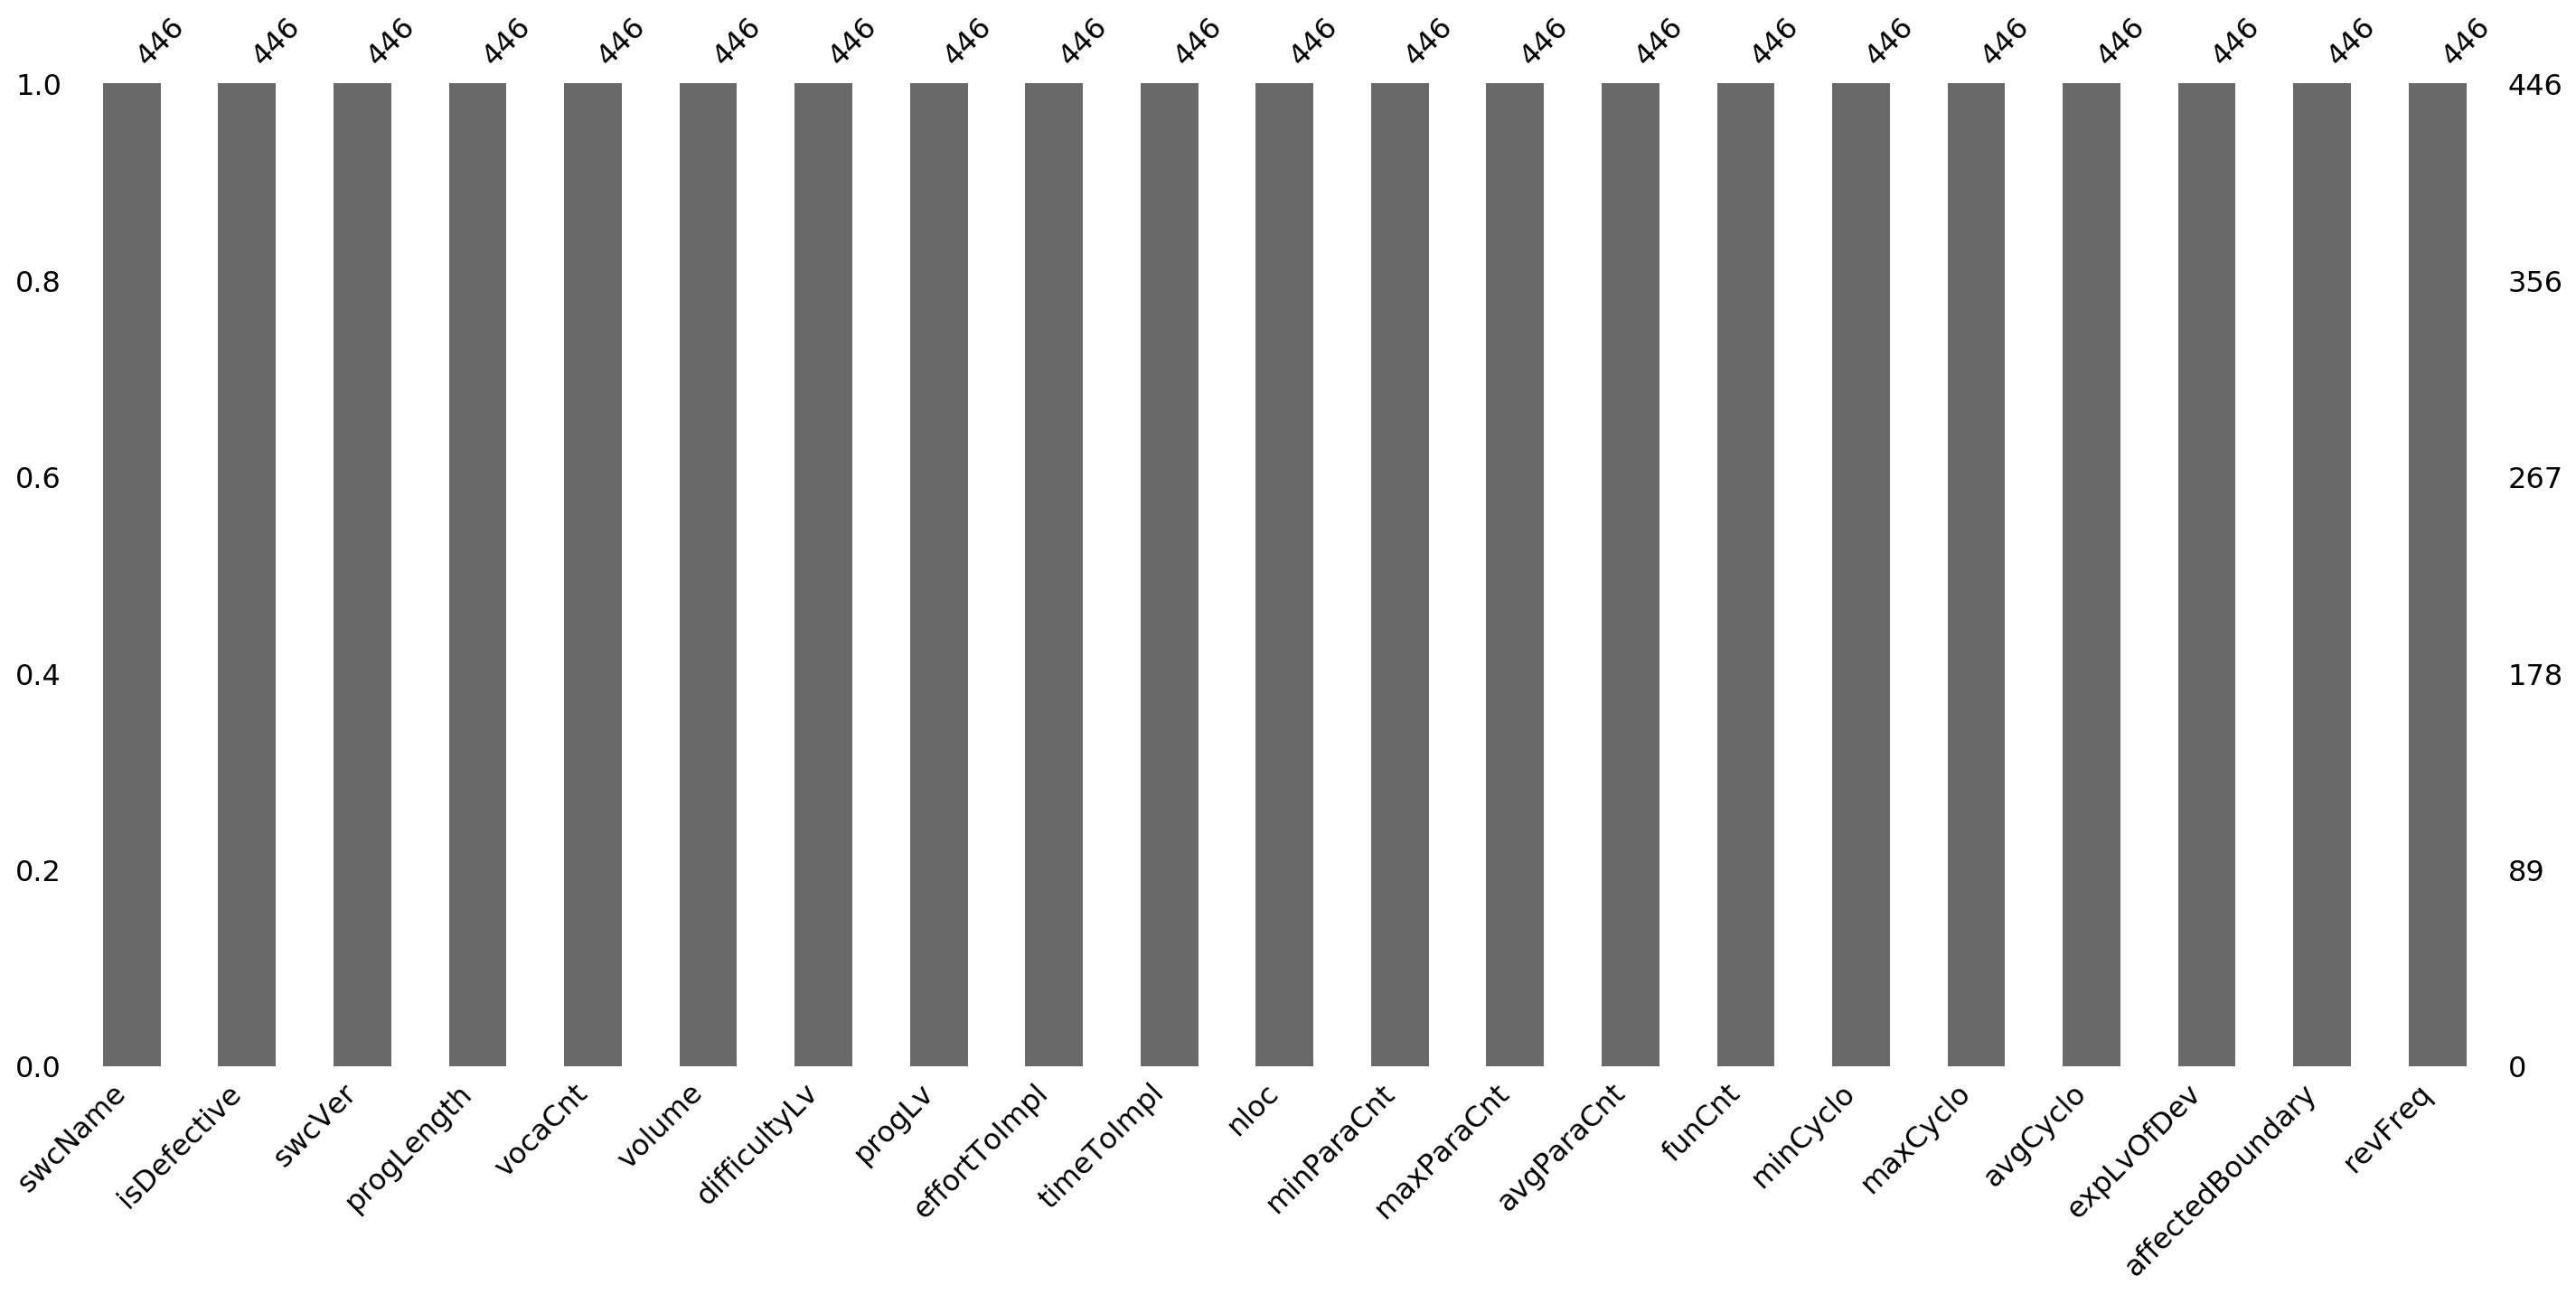

In [20]:
msno.bar(df_sbw)

### Data visualization

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [22]:
df_sbw[df_sbw["nloc"] < 100]

swcName isDefective   swcVer  progLength  vocaCnt  \
0    Cdds/MotCtrl/MotISnsr           0      1.2         691      129   
3               Cdds/SpiB2           0      1.2         463      125   
5             Swcs/ApplCom           0      1.8           7        7   
6      Swcs/ApplComPrivate           0      1.5          12        8   
7            Swcs/IgnDiagc           0     1.17          80       29   
..                     ...         ...      ...         ...      ...   
435          Swcs/MotTqCmd           0     1.11          23       18   
439     Swcs/PICoeffEstimn           0  1.8.1.9         545       69   
440       Swcs/PpkPolarity           1      1.6          19       13   
444    Swcs/SigCorrlnDiagc           1      1.6         214       57   
445        Swcs/TunVrntSel           0     1.35         116       31   

          volume  difficultyLv      progLv   effortToImpl   timeToImpl  ...  \
0    4844.758033     29.363636    5.618914  142259.713200  7903.317398  ...   
3    3225.158124     18.084112    9.861810   58324.121210  3240.228956  ...   
5      19.651484      2.000000    4.912871      39.302969     2.183498  ...   
6      36.000000      0.571429  110.250000      20.571429     1.142857  ...   
7     388.638480     10.941176    3.246518    4252.162189   236.231233  ...   
..           ...           ...         ...            ...          ...  ...   
435    95.908275      3.818182    6.578742     366.195232    20.344180  ...   
439  3329.145829     31.563636    3.341633  105079.948300  5837.774908  ...   
440    70.308355      2.222222   14.237442     156.240788     8.680044  ...   
444  1248.238463     14.325581    6.082373   17881.741700   993.430095  ...   
445   574.686772     12.272727    3.815479    7052.974020   391.831890  ...   

     minParaCnt  maxParaCnt  avgParaCnt  funCnt  minCyclo  maxCyclo  avgCyclo  \
0             1           1    1.000000       2         1         8  4.500000   
3             0           1    0.750000       4         1         7  3.000000   
5             1           2    1.117647       0         1        21  2.867647   
6             1           1    1.000000       0         1         5  1.750000   
7             1           1    1.000000       1         3         3  3.000000   
..          ...         ...         ...     ...       ...       ...       ...   
435           1           1    1.000000       1         1         1  1.000000   
439           1           1    1.000000       2         1         2  1.500000   
440           1           1    1.000000       1         1         1  1.000000   
444           1           1    1.000000       2         1         9  5.000000   
445           1           1    1.000000       0         2        10  5.416667   

     expLvOfDev  affectedBoundary  revFreq  
0    148.163934                 1        2  
3     22.393443                 0        2  
5     49.475410                 3        8  
6     34.557377                 3        5  
7     64.360656                 3       17  
..          ...               ...      ...  
435  136.918033                 1       11  
439   52.229508                 1        8  
440   64.360656                 2        6  
444   22.393443                 1        6  
445   49.475410                 3       35  

[204 rows x 21 columns]

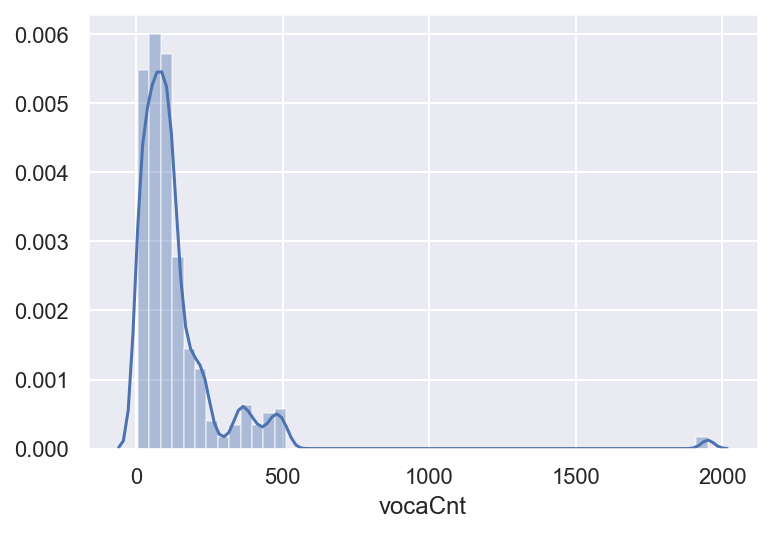

In [23]:
#sns.distplot(df_sbw.maxCyclo, hist_kws={"range":[0, 100]})
fig, ax = plt.subplots()
sns.distplot(df_sbw.vocaCnt, ax=ax)
#ax.set_xticks(range(10, 10))
plt.show()

In [24]:
df_sbw.drop(["swcName", "swcVer"], axis=1, inplace=True)

In [25]:
df_sbw

isDefective  progLength  vocaCnt        volume  difficultyLv     progLv  \
0             0         691      129   4844.758033     29.363636   5.618914   
1             0        1586      130  11137.475350     47.739130   4.886948   
2             0        1057      123   7338.237832     49.223301   3.028659   
3             0         463      125   3225.158124     18.084112   9.861810   
4             0         735      111   4993.895662     34.064516   4.303631   
..          ...         ...      ...           ...           ...        ...   
441           1        6379      494  57081.634570     67.351695  12.583439   
442           1        1226      119   8453.046578     47.575758   3.734581   
443           1        2494      181  18704.615640     53.695122   6.487526   
444           1         214       57   1248.238463     14.325581   6.082373   
445           0         116       31    574.686772     12.272727   3.815479   

     effortToImpl     timeToImpl  nloc  minParaCnt  maxParaCnt  avgParaCnt  \
0    1.422597e+05    7903.317398    93           1           1    1.000000   
1    5.316934e+05   29538.521580   394           1           3    1.333333   
2    3.612123e+05   20067.349410   254           1           2    1.100000   
3    5.832412e+04    3240.228956    95           0           1    0.750000   
4    1.701146e+05    9450.813295   169           0           4    2.000000   
..            ...            ...   ...         ...         ...         ...   
441  3.844545e+06  213585.824300  1020           1           4    1.200000   
442  4.021601e+05   22342.227490   196           1           2    1.250000   
443  1.004347e+06   55797.034330   525           1           7    2.857143   
444  1.788174e+04     993.430095    48           1           1    1.000000   
445  7.052974e+03     391.831890    15           1           1    1.000000   

     funCnt  minCyclo  maxCyclo   avgCyclo  expLvOfDev  affectedBoundary  \
0         2         1         8   4.500000  148.163934                 1   
1         6         9        29  15.000000   49.475410                 0   
2        10         2        11   4.700000   49.475410                 0   
3         4         1         7   3.000000   22.393443                 0   
4         4         1         9   4.500000   22.393443                 0   
..      ...       ...       ...        ...         ...               ...   
441      40         1        32   3.700000   49.475410                 2   
442       4         1        45  12.000000   22.786885                 2   
443       7         1       119  18.000000   64.754098                 2   
444       2         1         9   5.000000   22.393443                 1   
445       0         2        10   5.416667   49.475410                 3   

     revFreq  
0          2  
1          6  
2          5  
3          2  
4          2  
..       ...  
441       28  
442       21  
443       27  
444        6  
445       35  

[446 rows x 19 columns]

### Correlation analysis

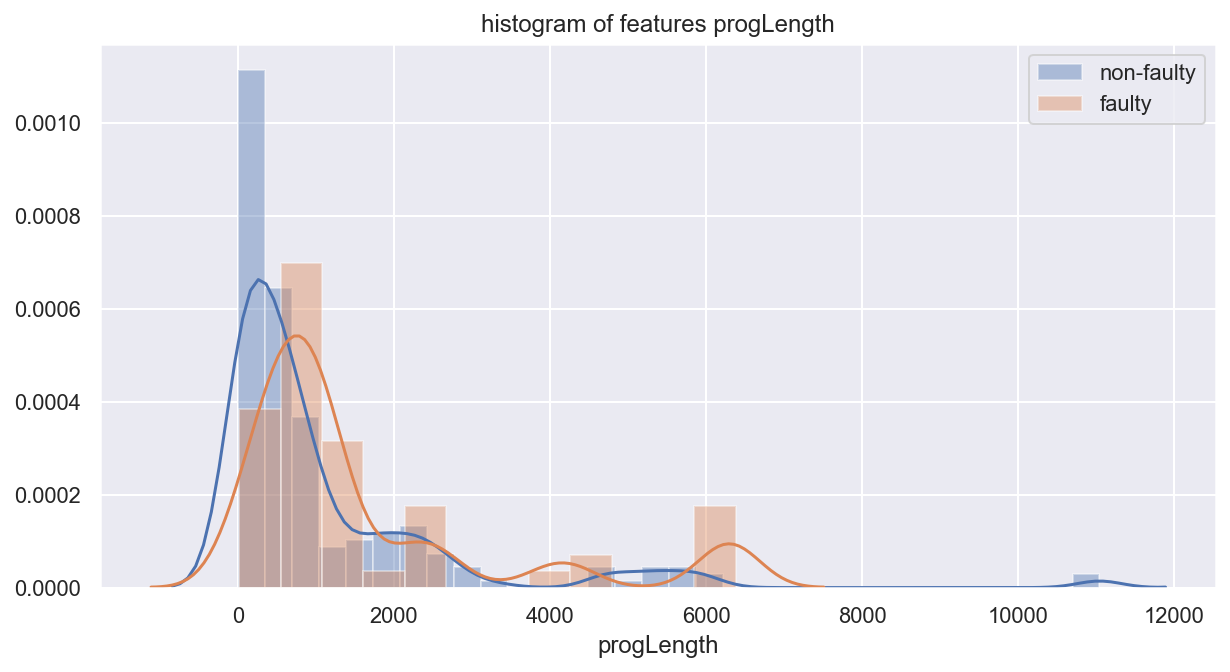

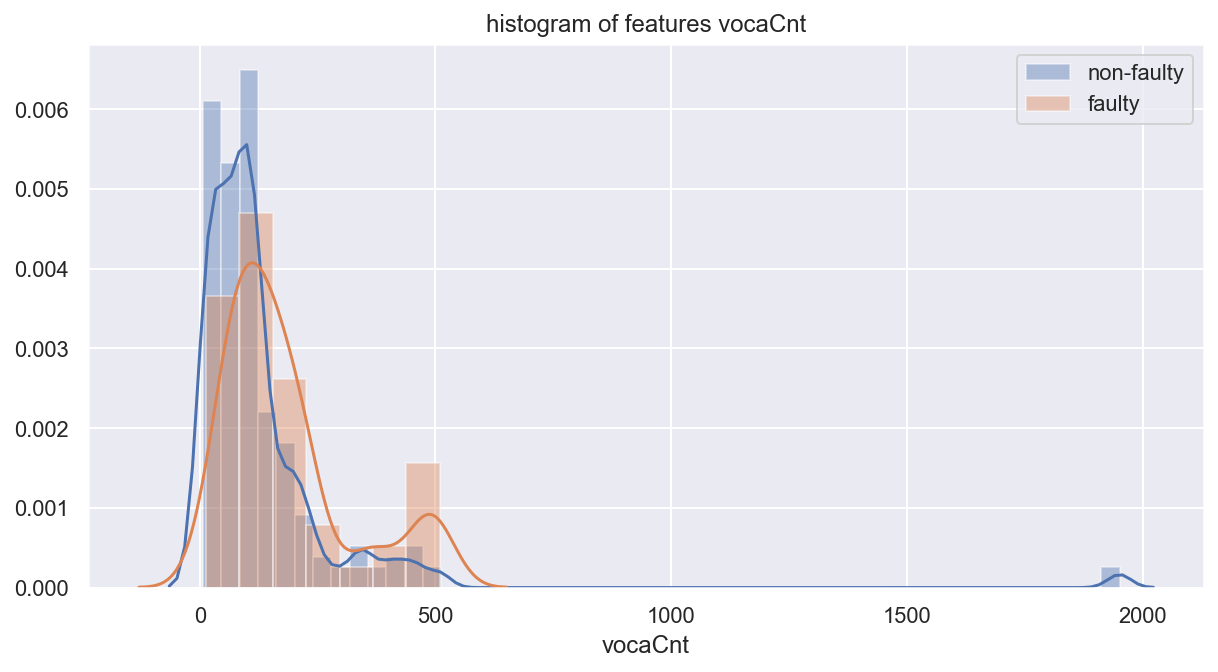

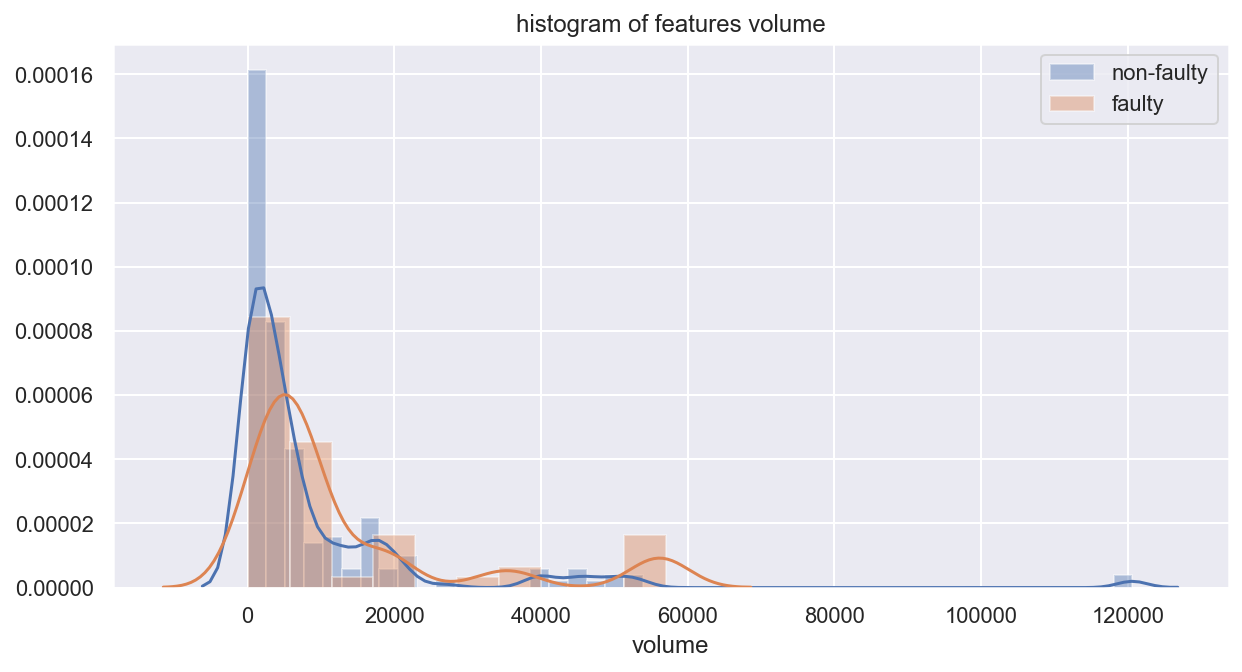

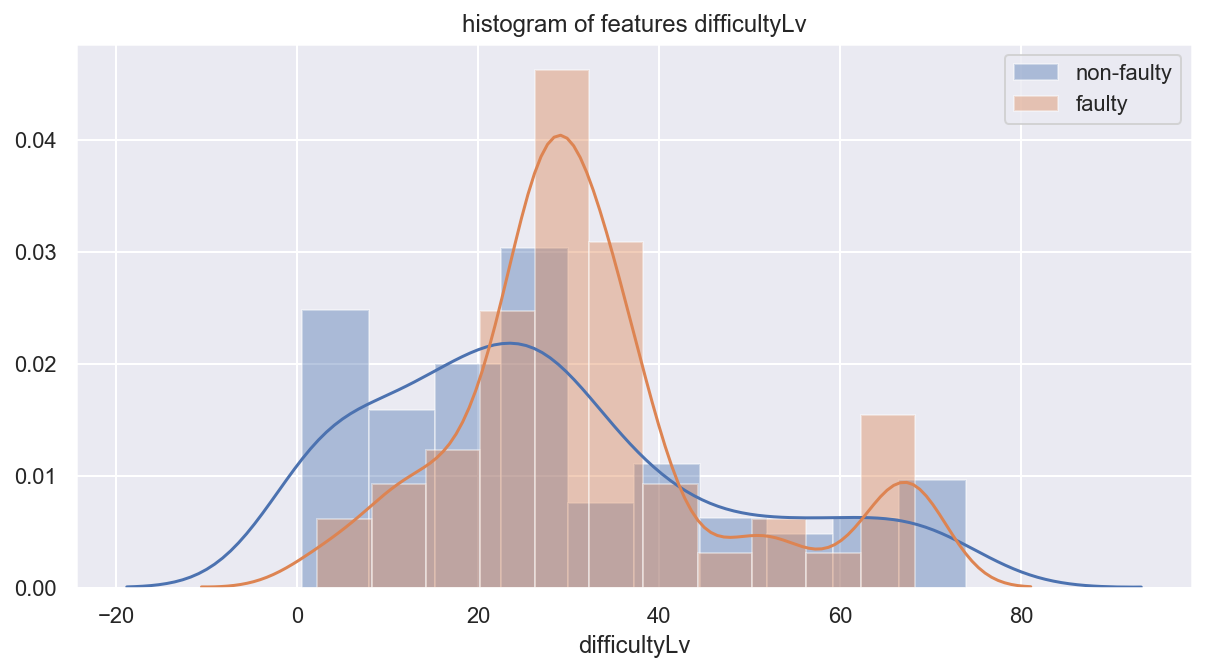

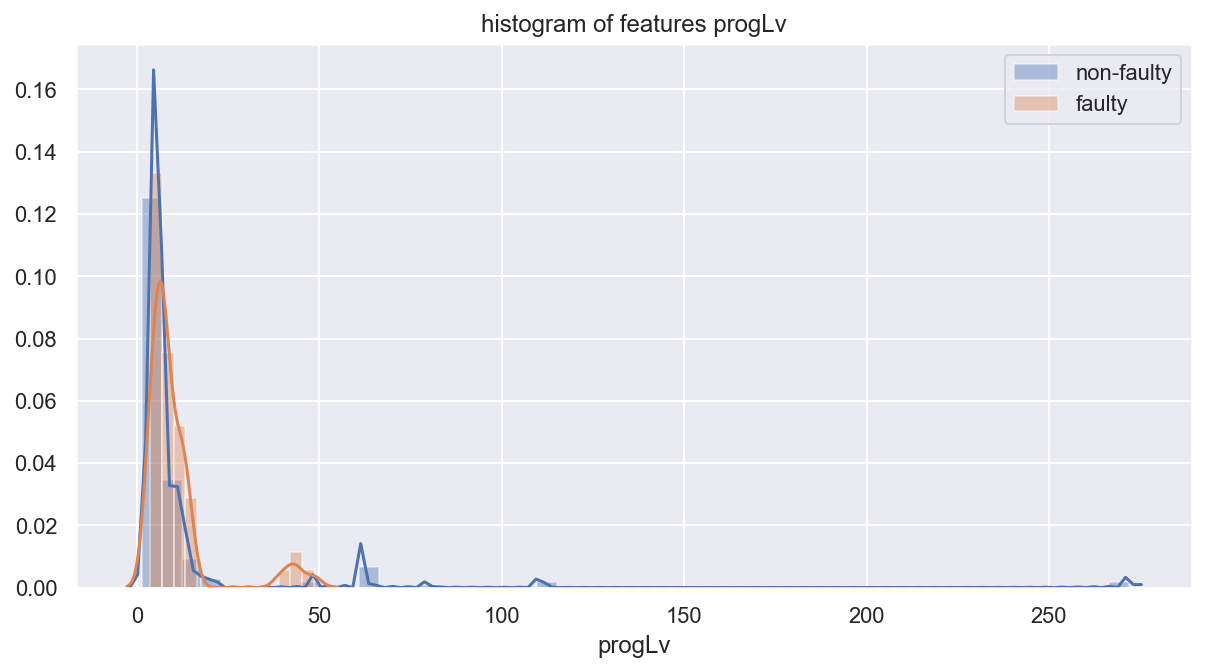

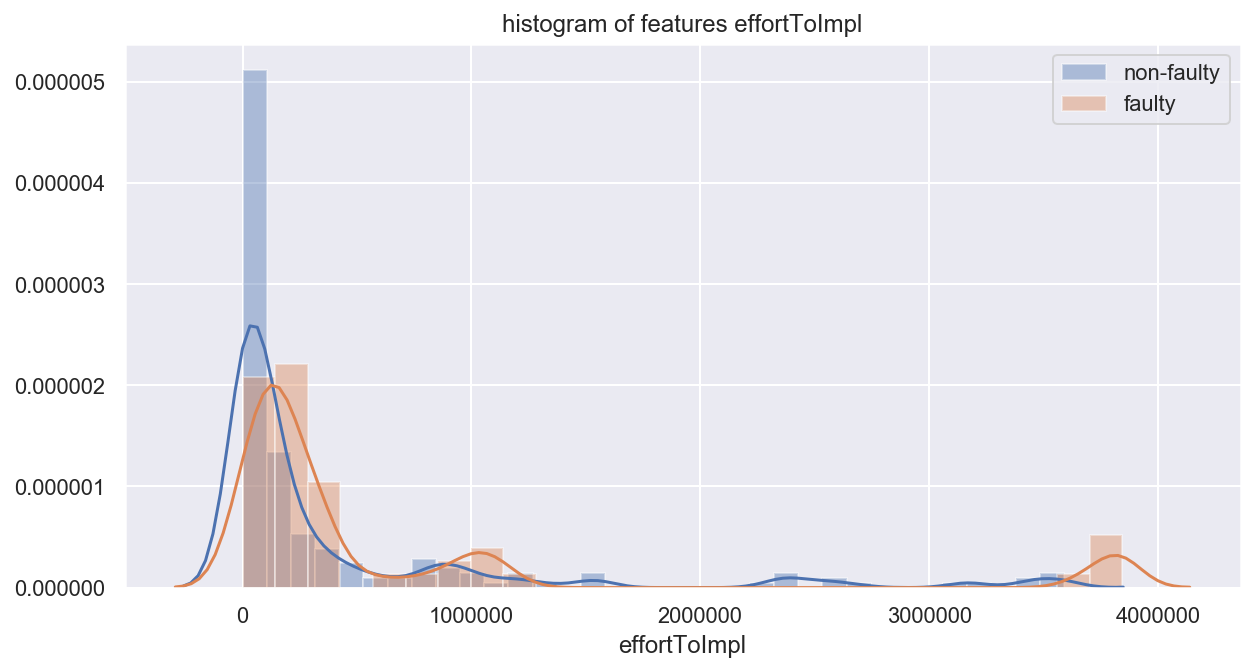

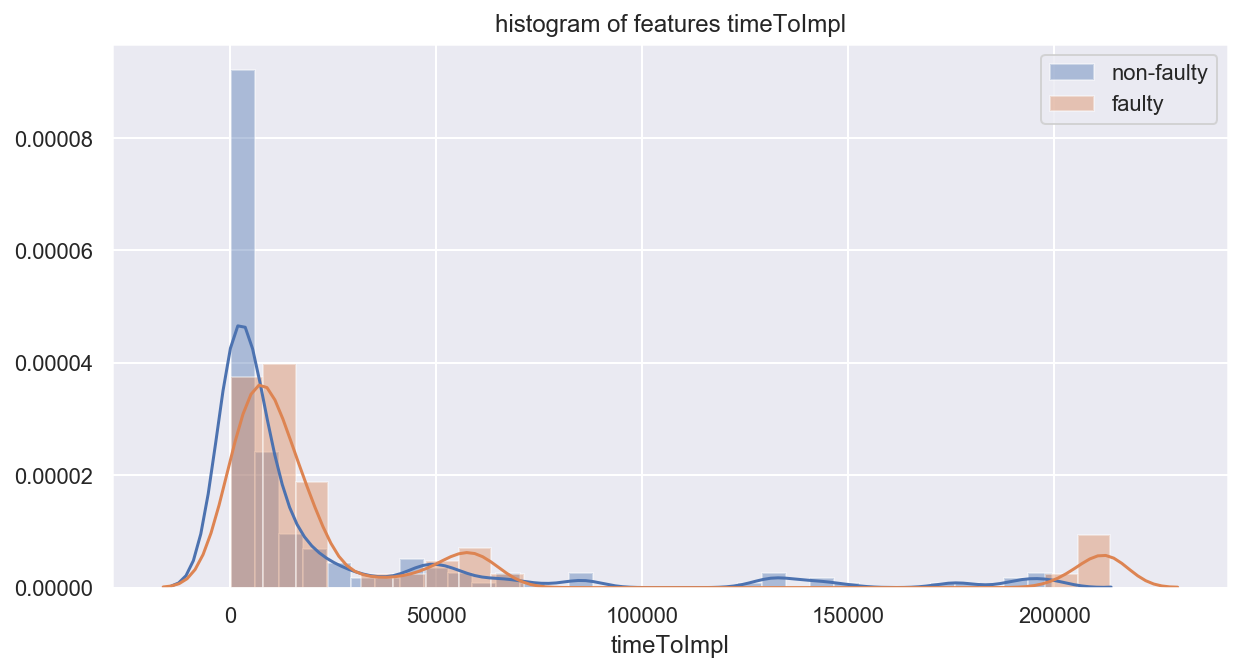

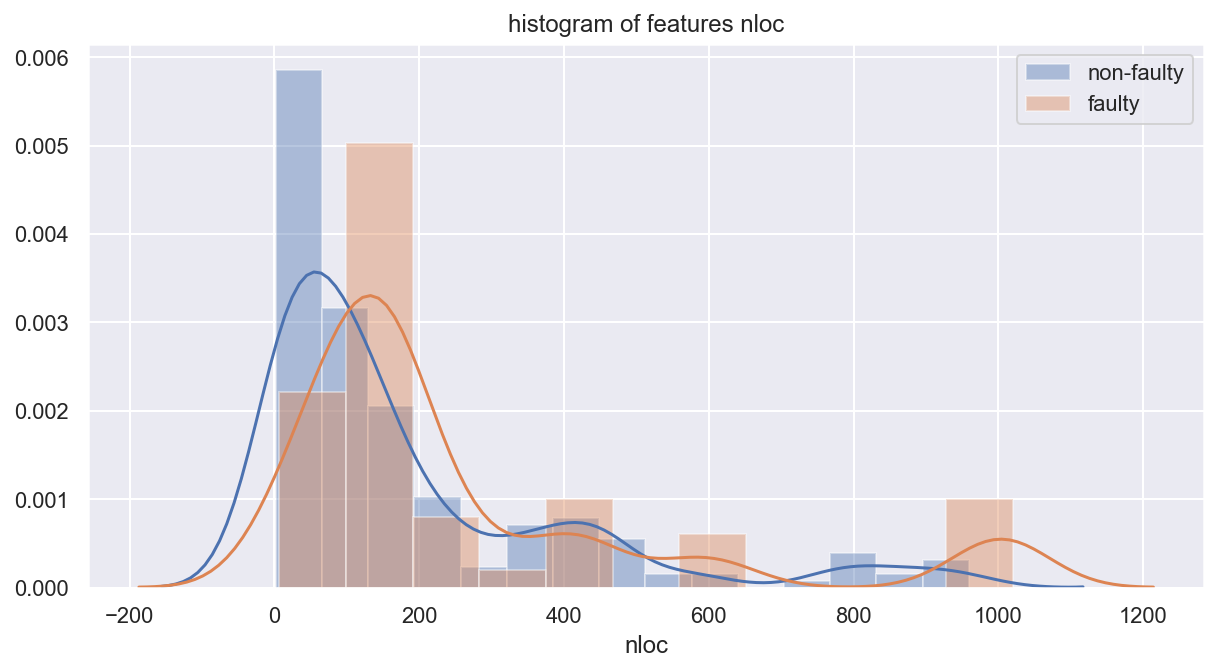

Selected KDE bandwidth is 0. Cannot estiamte density.


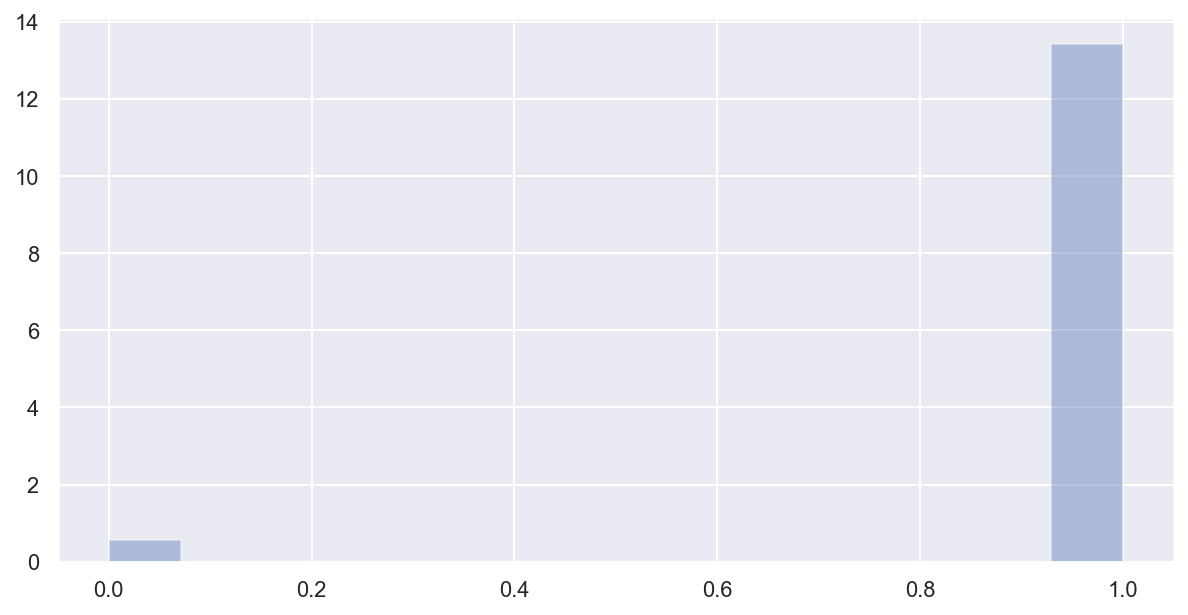

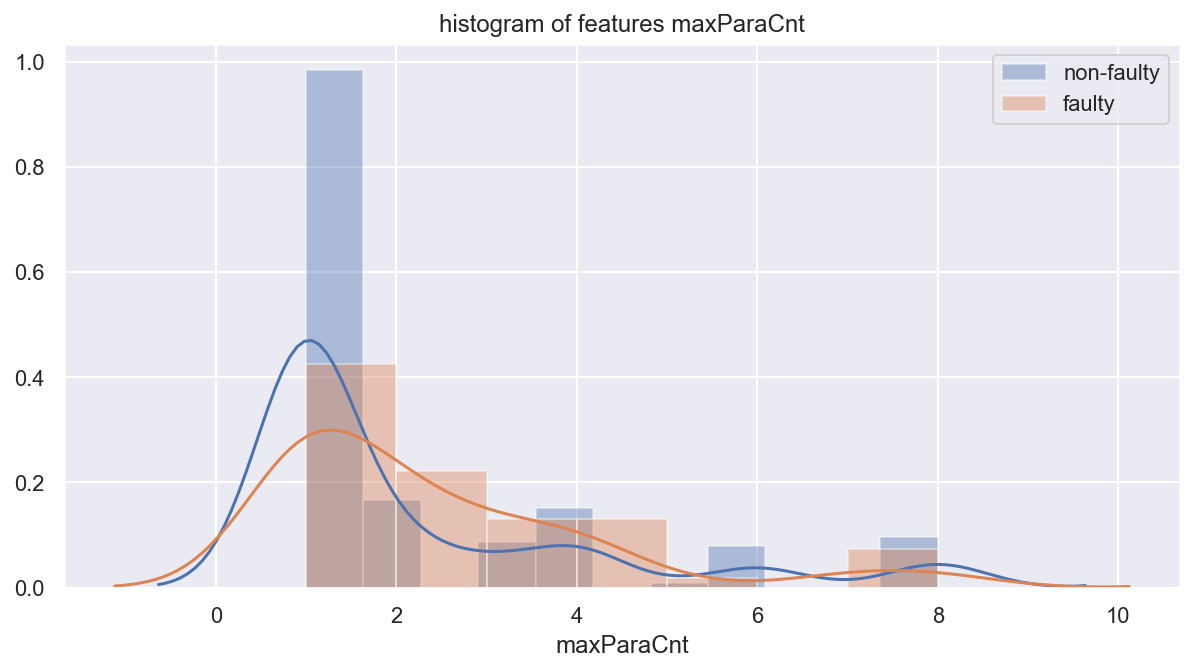

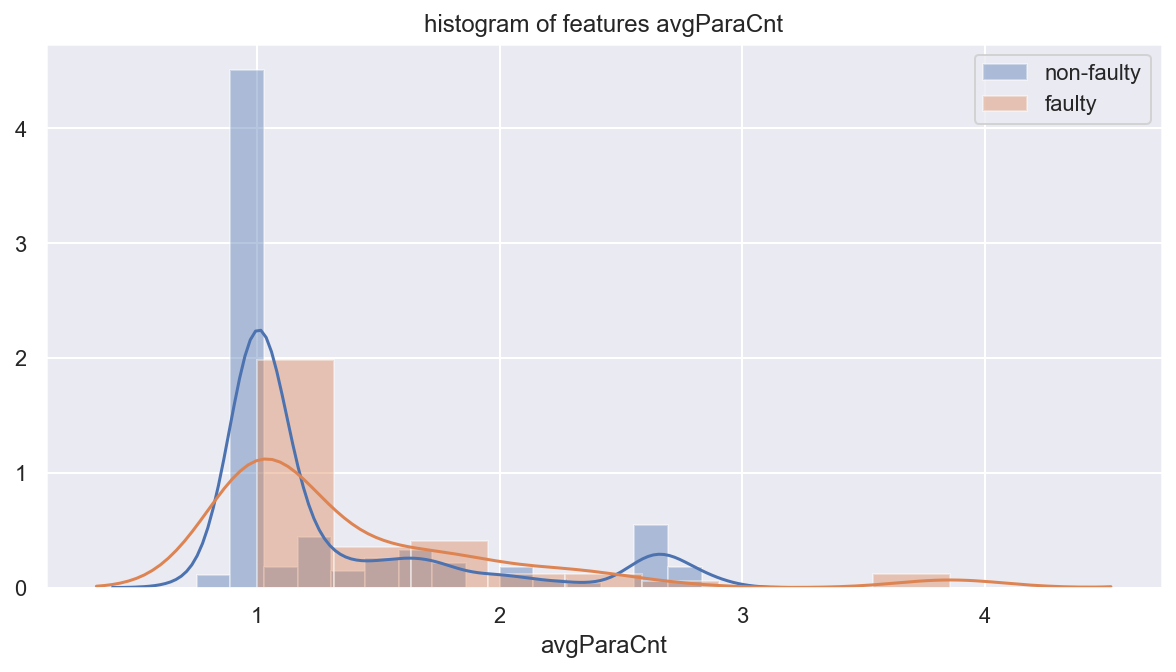

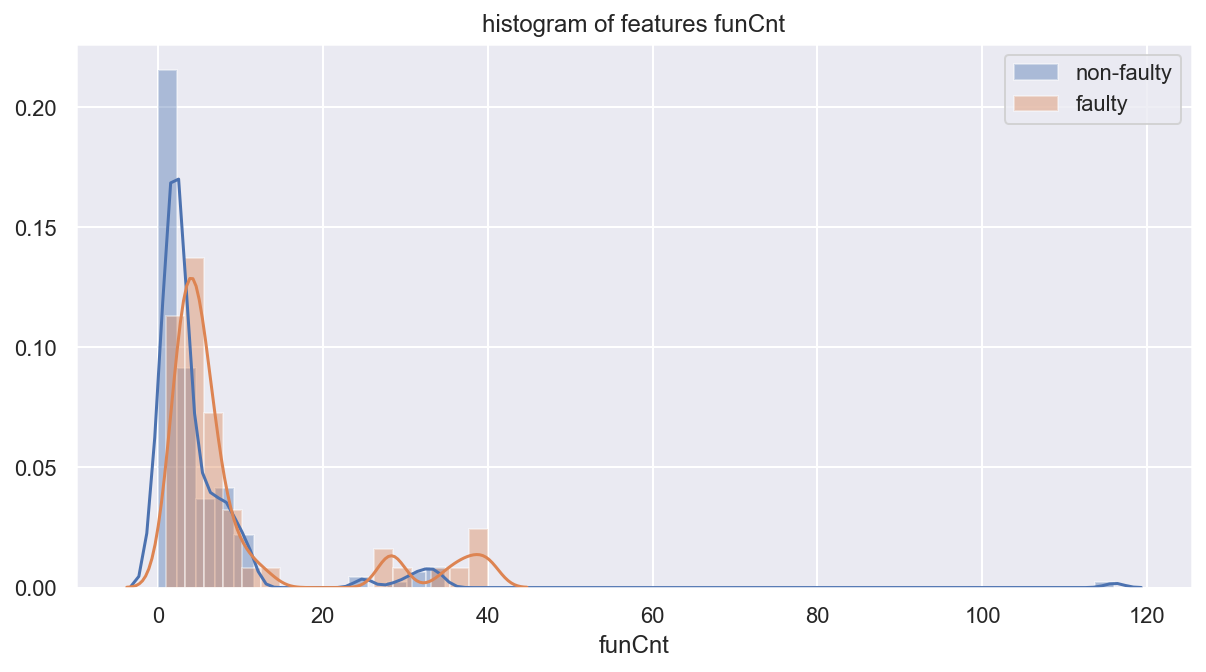

Selected KDE bandwidth is 0. Cannot estiamte density.


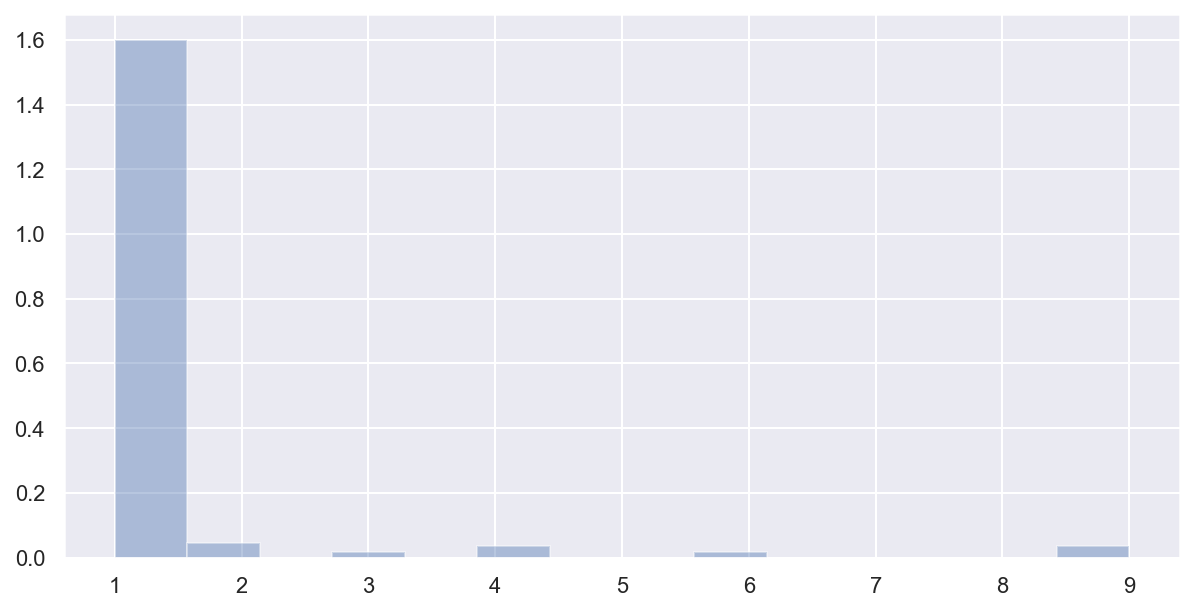

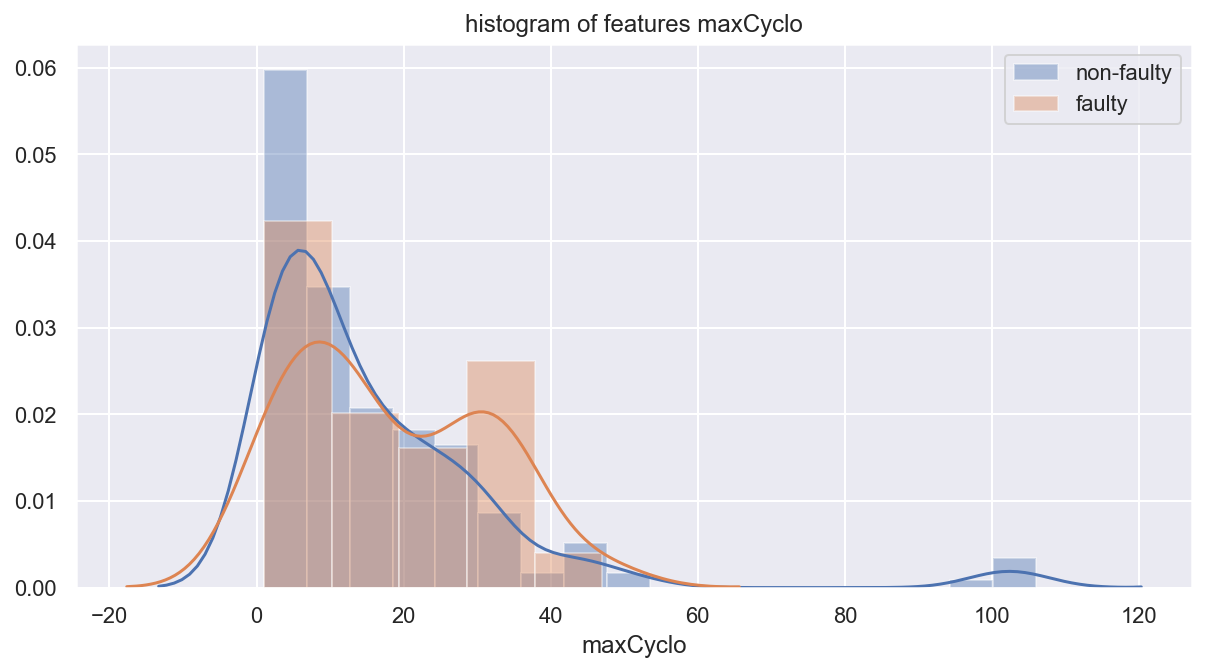

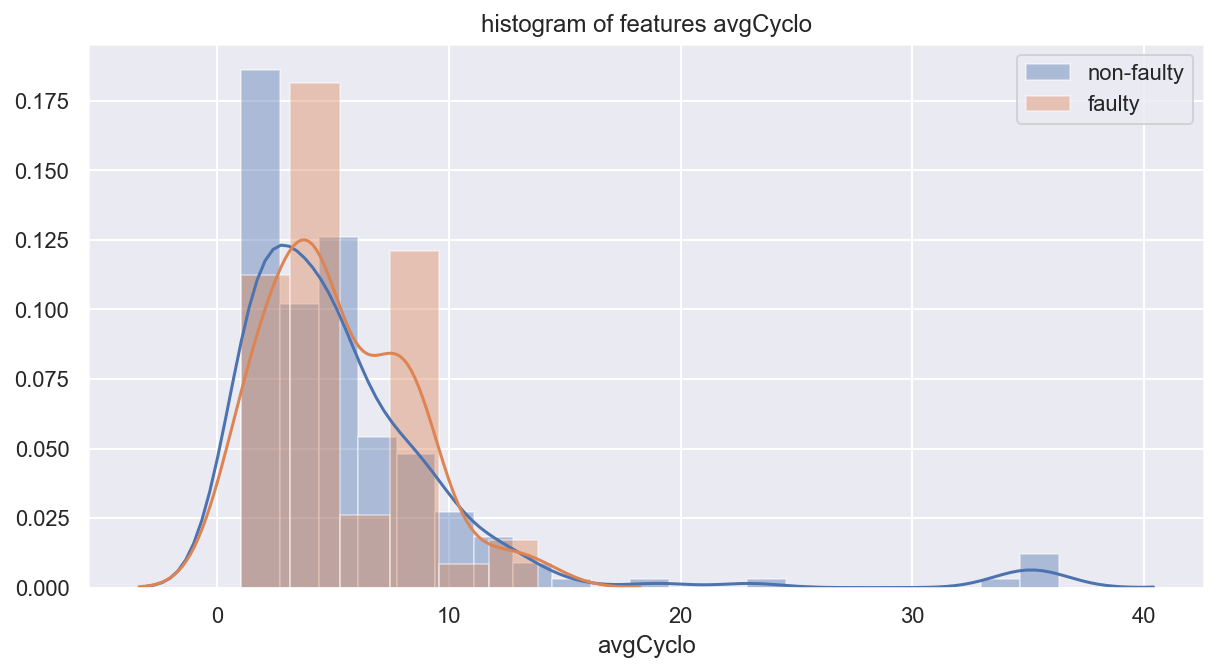

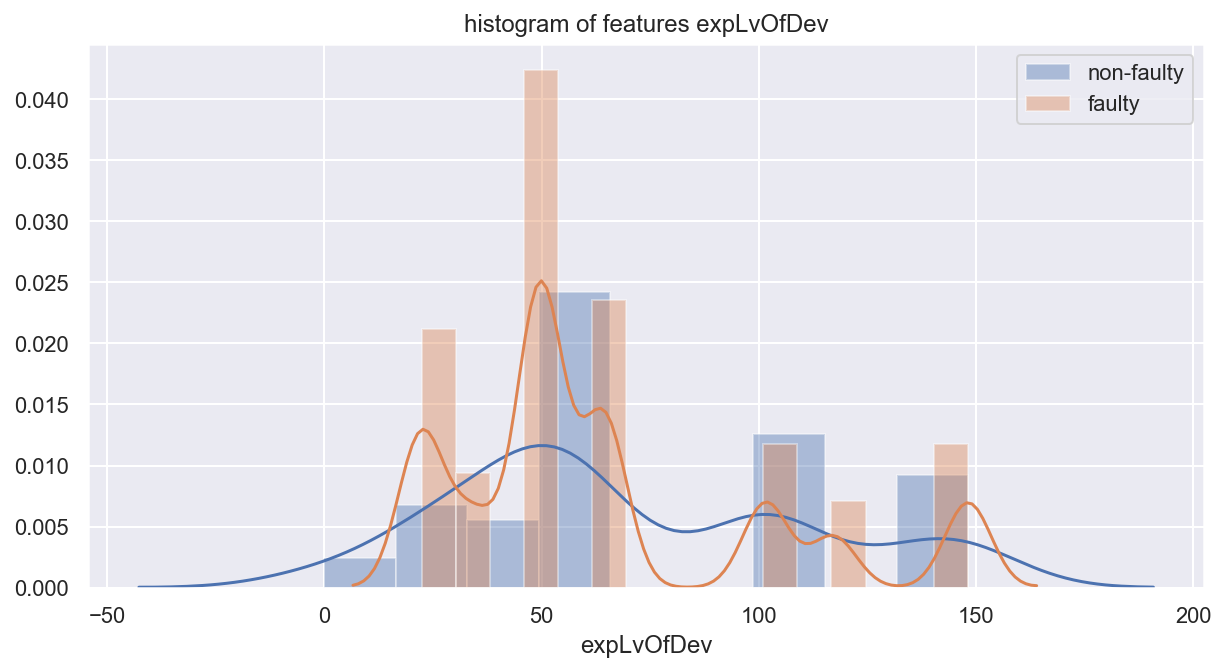

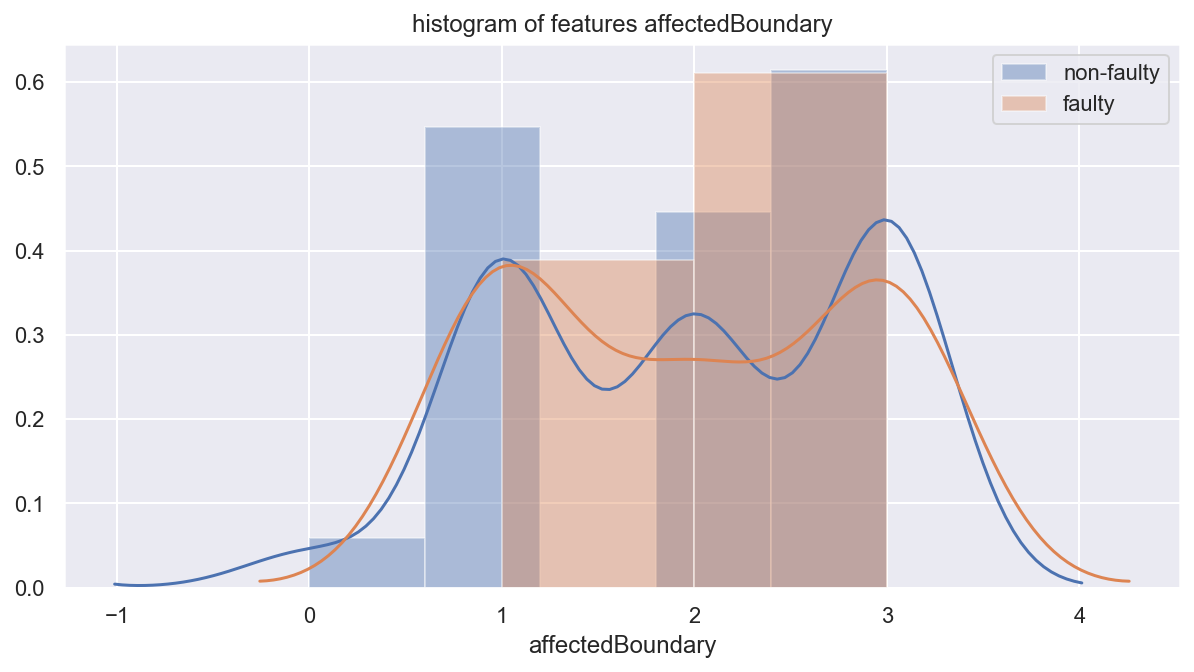

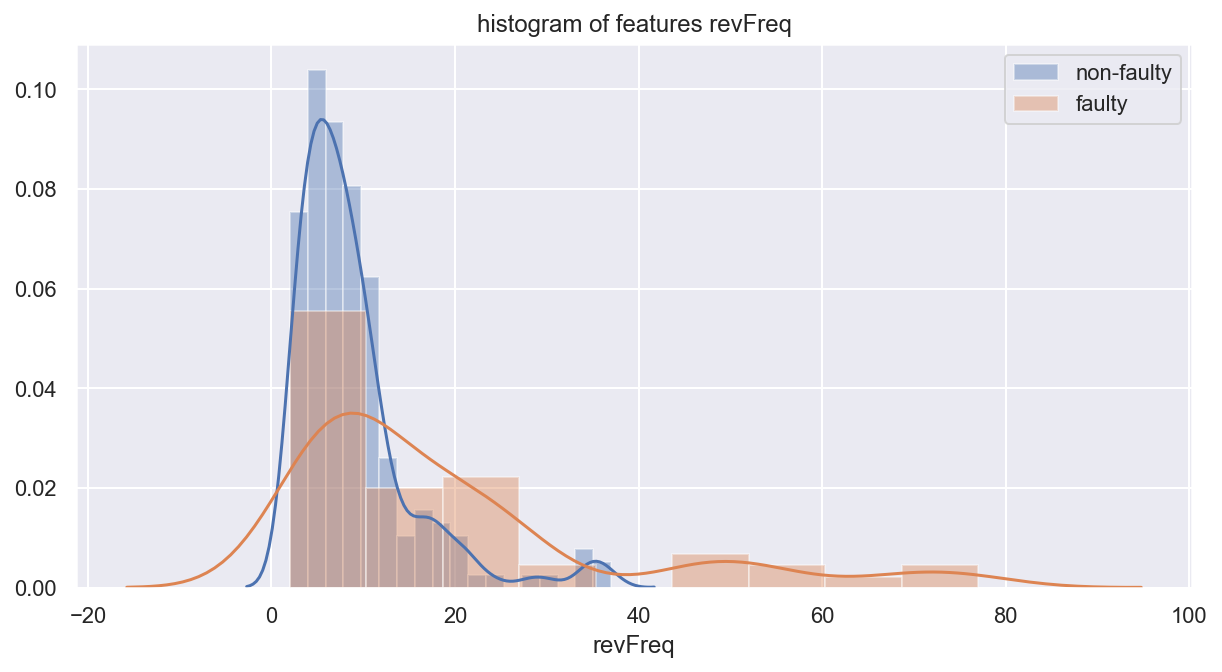

In [26]:
for cnt, col in enumerate(df_sbw):
    try:
        if cnt >= 1:
            plt.figure(figsize=(10, 5))
            sns.distplot(df_sbw[col][df_sbw['isDefective']==0])
            sns.distplot(df_sbw[col][df_sbw['isDefective']==1])
            plt.legend(['non-faulty', 'faulty'], loc='best')
            plt.title('histogram of features '+ str(col))
            plt.show()
        
        if cnt >= 19:
            break
            
    except Exception as e:
        print(e)
        pass

#### 2D Plot

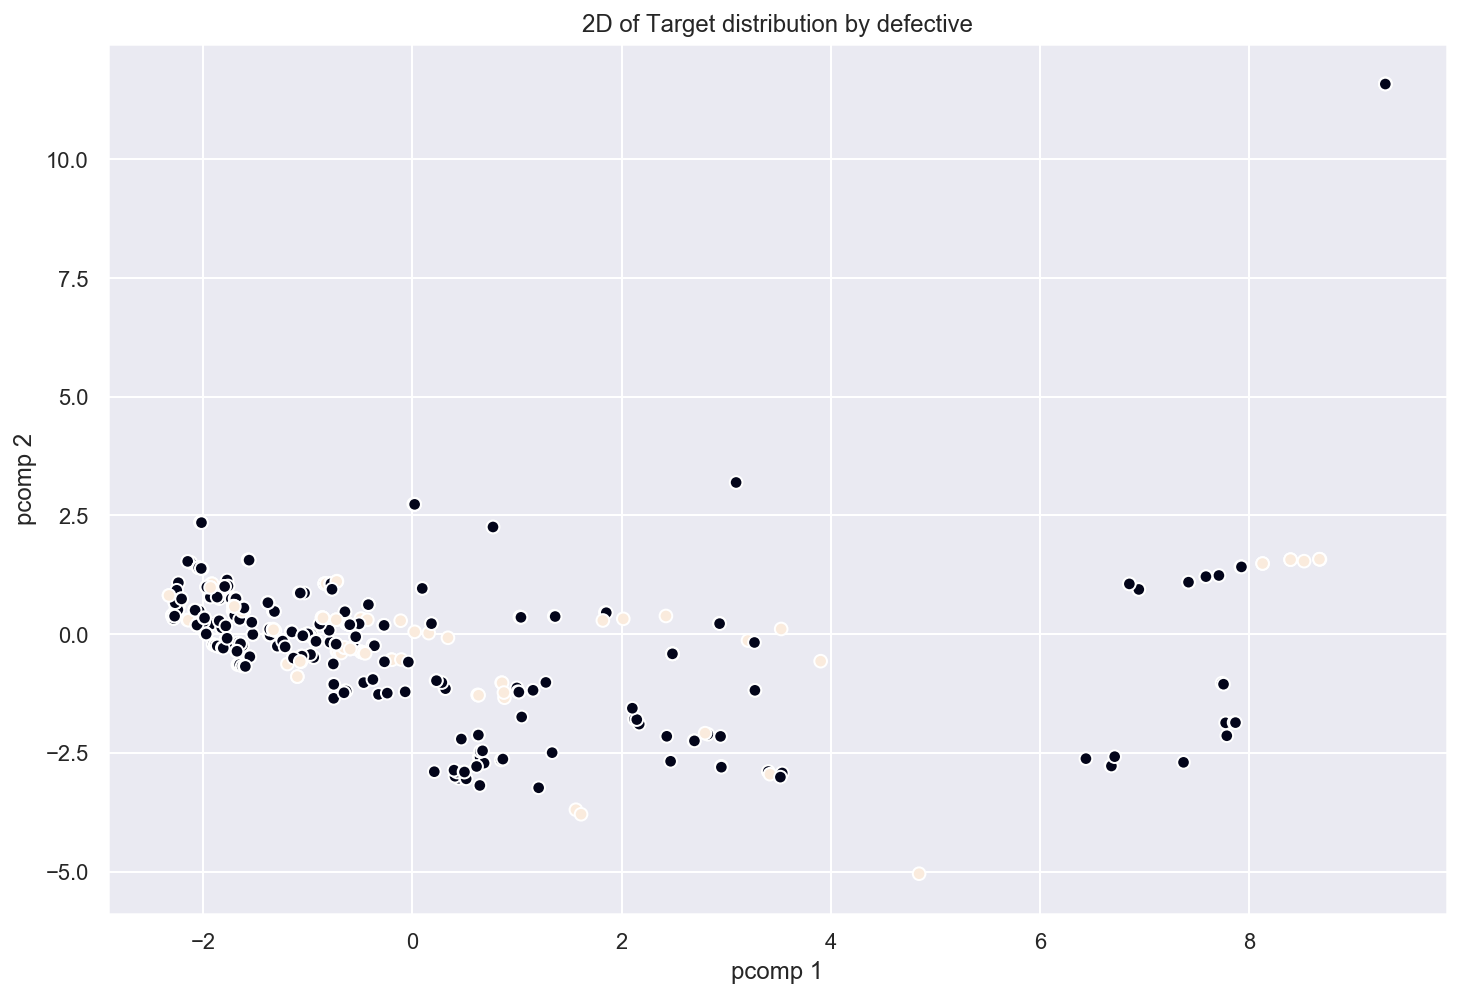

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X = df_sbw.drop(['isDefective'], axis=1)
y = df_sbw['isDefective']

scaler = StandardScaler()
defective_scale = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


pca2 = PCA(n_components=2)
data_pca2 = pca2.fit_transform(defective_scale)

plt.figure(figsize=(12, 8))
plt.scatter(data_pca2[:,0], data_pca2[:,1], c=df_sbw['isDefective'], s=40, edgecolors='white')
plt.title("2D of Target distribution by defective")
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.show()

#### Heatmap
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [28]:
pd.set_option('display.max_row', 50)
df_sbw

isDefective  progLength  vocaCnt        volume  difficultyLv     progLv  \
0             0         691      129   4844.758033     29.363636   5.618914   
1             0        1586      130  11137.475350     47.739130   4.886948   
2             0        1057      123   7338.237832     49.223301   3.028659   
3             0         463      125   3225.158124     18.084112   9.861810   
4             0         735      111   4993.895662     34.064516   4.303631   
..          ...         ...      ...           ...           ...        ...   
441           1        6379      494  57081.634570     67.351695  12.583439   
442           1        1226      119   8453.046578     47.575758   3.734581   
443           1        2494      181  18704.615640     53.695122   6.487526   
444           1         214       57   1248.238463     14.325581   6.082373   
445           0         116       31    574.686772     12.272727   3.815479   

     effortToImpl     timeToImpl  nloc  minParaCnt  maxParaCnt  avgParaCnt  \
0    1.422597e+05    7903.317398    93           1           1    1.000000   
1    5.316934e+05   29538.521580   394           1           3    1.333333   
2    3.612123e+05   20067.349410   254           1           2    1.100000   
3    5.832412e+04    3240.228956    95           0           1    0.750000   
4    1.701146e+05    9450.813295   169           0           4    2.000000   
..            ...            ...   ...         ...         ...         ...   
441  3.844545e+06  213585.824300  1020           1           4    1.200000   
442  4.021601e+05   22342.227490   196           1           2    1.250000   
443  1.004347e+06   55797.034330   525           1           7    2.857143   
444  1.788174e+04     993.430095    48           1           1    1.000000   
445  7.052974e+03     391.831890    15           1           1    1.000000   

     funCnt  minCyclo  maxCyclo   avgCyclo  expLvOfDev  affectedBoundary  \
0         2         1         8   4.500000  148.163934                 1   
1         6         9        29  15.000000   49.475410                 0   
2        10         2        11   4.700000   49.475410                 0   
3         4         1         7   3.000000   22.393443                 0   
4         4         1         9   4.500000   22.393443                 0   
..      ...       ...       ...        ...         ...               ...   
441      40         1        32   3.700000   49.475410                 2   
442       4         1        45  12.000000   22.786885                 2   
443       7         1       119  18.000000   64.754098                 2   
444       2         1         9   5.000000   22.393443                 1   
445       0         2        10   5.416667   49.475410                 3   

     revFreq  
0          2  
1          6  
2          5  
3          2  
4          2  
..       ...  
441       28  
442       21  
443       27  
444        6  
445       35  

[446 rows x 19 columns]

In [29]:
# 형 변환 (object -> int)
df_sbw["isDefective"] = df_sbw["isDefective"].astype(str).astype(int)

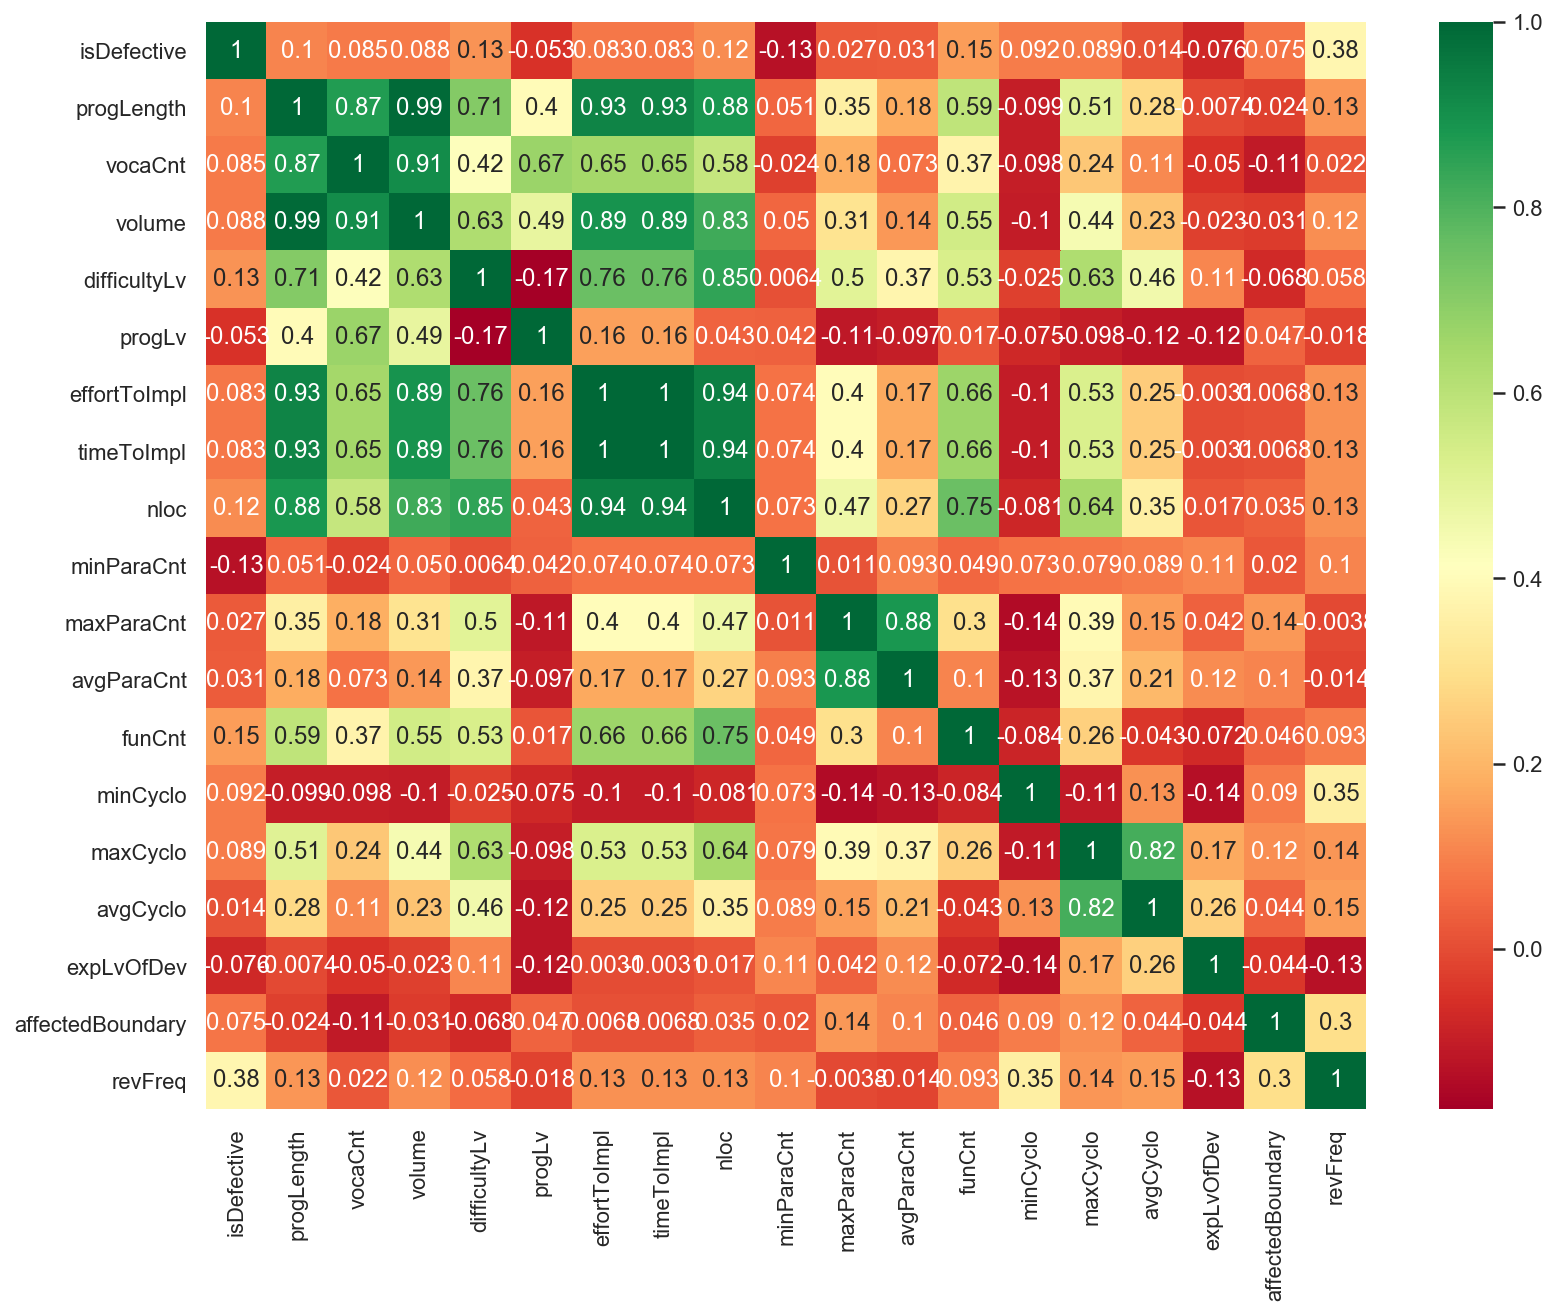

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

df_sbw_tmp = df_sbw.copy()

#defective_tmp['isDefectvie'] = cancer['isDefective'].replace({'M':1, 'B':0})
#pandas correlation method={"pearson", "kendall", "spearman"}
corrmat = df_sbw_tmp.corr(method="pearson")
top_corr_features = corrmat.index[abs(corrmat["isDefective"])>=0]

# plot
plt.figure(figsize=(13,10))
g = sns.heatmap(df_sbw_tmp[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.show()

### Feature importance

In [31]:
from sklearn.ensemble import RandomForestClassifier

# RandomForest
clf = RandomForestClassifier(random_state=42, max_depth=6)
clf.fit(X, y)
feature_importance = clf.feature_importances_

# plot
df_fi = pd.DataFrame({'columns':X.columns, 'importances':feature_importance})
df_fi = df_fi[df_fi['importances'] > 0] # importance가 0이상인 것만 
df_fi = df_fi.sort_values(by=['importances'], ascending=False)

fig = plt.figure(figsize=(15,7))
ax = sns.barplot(df_fi['columns'], df_fi['importances'])
ax.set_xticklabels(df_fi['columns'], rotation=80, fontsize=13)
plt.tight_layout()
plt.show()

ValueError: Unknown label type: 'unknown'

### Model

In [72]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
import mglearn
import pickle

In [1]:
Y = df_sbw["isDefective"]
X = df_sbw.drop(["isDefective"], axis=1)
Y

NameError: name 'df_sbw' is not defined

In [74]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, random_state=0)

In [80]:
DT_model = DecisionTreeClassifier(max_depth=5, random_state=0).fit(train_X, train_Y)

In [81]:
DT_pred_y = DT_model.predict(train_X)
np.round(metrics.accuracy_score(train_Y, DT_pred_y)*100, 2) 

94.91

In [82]:
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin/"

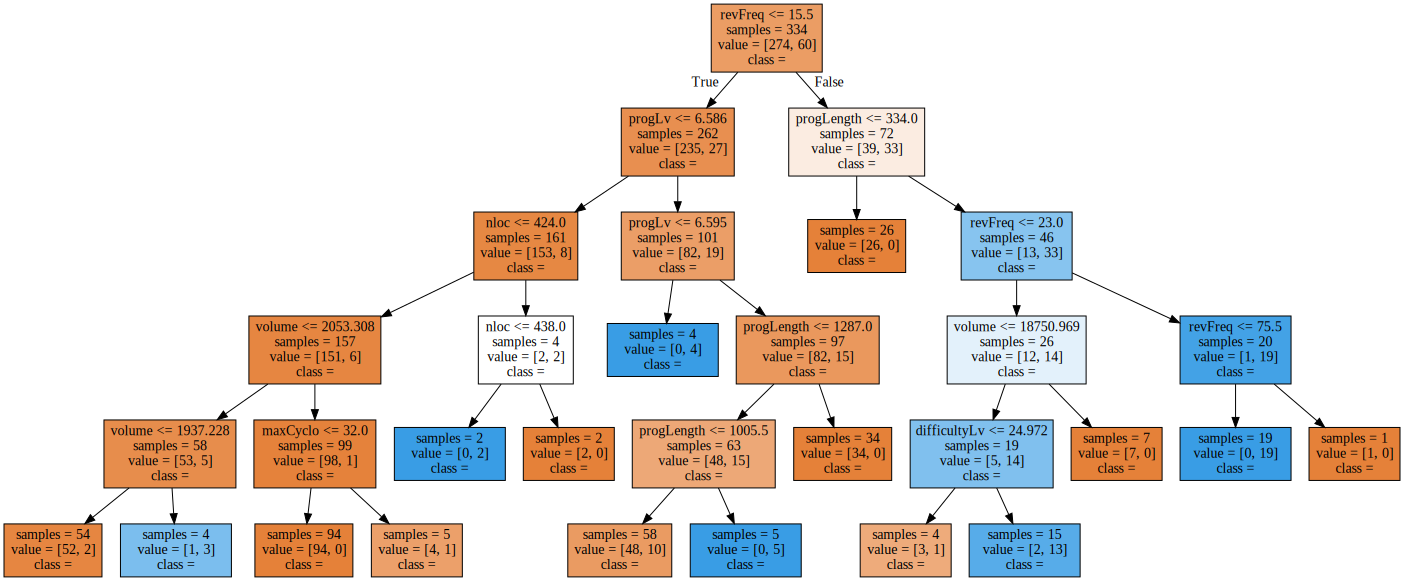

In [83]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(DT_model, out_file="tree_1.dot",
               feature_names=X.columns,
               class_names=["결함", "결함아님"], filled=True, impurity=False)

with open("tree_1.dot", encoding="utf-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [37]:
np.round(DT_model.score(test_X, test_Y)*100, 2) 
np.round(DT_model.score(train_X, train_Y)*100, 2) 

100.0

In [38]:
DT_pred_y = DT_model.predict(test_X)
DT_pred_y, np.array(test_Y)
np.round(metrics.accuracy_score(test_Y, DT_pred_y)*100, 2) 

89.29

In [39]:
pd.set_option('display.max_row', 200)
# print("예측치: {}".format(DT_pred_y))
# print("실측치: {}".format(np.array(test_Y)))
arr_test_y = np.array(test_Y)

m_arr = np.array([DT_pred_y, arr_test_y])


df = pd.DataFrame(m_arr.T, columns=["Predictive Y", "Actual Y"])

df_wrong = df[df["Predictive Y"] != df["Actual Y"]]
df_right = df[df["Predictive Y"] == df["Actual Y"]]

df_right["result"] = "True"
df_wrong["result"] = "False"

m_df_1 = pd.concat([df, df_right["result"]], axis=1)
m_df_2 = m_df_1.fillna("False")


m_df_2.to_csv("predictive_result.csv", index=False)

In [ ]:
# %load predictive_result.csv
Predictive Y,Actual Y,result
0,0,True
0,0,True
0,1,False
0,0,True
0,0,True
0,0,True
0,0,True
0,0,True
0,0,True
1,0,False
0,0,True
0,1,False
0,0,True
0,1,False
1,1,True
0,0,True
0,0,True
0,0,True
0,0,True
0,0,True
0,0,True
1,0,False
0,0,True
0,0,True
0,0,True
0,0,True
1,1,True
1,1,True
0,1,False
1,1,True
0,0,True
0,0,True
0,0,True
0,1,False
1,1,True
0,0,True
0,0,True
1,1,True
0,0,True
0,0,True
0,0,True
1,1,True
0,0,True
1,1,True
1,1,True
0,0,True
0,0,True
0,0,True
0,1,False
0,0,True
0,0,True
1,1,True
0,0,True
0,0,True
0,0,True
0,0,True
0,0,True
1,1,True
0,0,True
0,0,True
0,0,True
0,0,True
0,0,True
0,0,True
0,0,True
0,0,True
0,0,True
0,0,True
0,0,True
0,0,True
0,0,True
0,0,True
0,0,True
0,0,True
0,0,True
0,0,True
0,1,False
0,0,True
0,0,True
0,0,True
0,0,True
1,1,True
0,1,False
0,0,True
0,0,True
0,0,True
0,1,False
0,0,True
0,1,False
0,0,True
0,0,True
0,0,True
0,0,True
0,0,True
0,0,True
1,1,True
0,0,True
1,1,True
0,0,True
0,0,True
0,0,True
0,0,True
0,0,True
0,0,True
1,1,True
0,0,True
1,1,True
0,0,True
0,0,True
0,0,True
0,0,True
0,0,True


In [41]:
dt_f1_score = round(f1_score(test_Y, DT_pred_y)*100, 2)  # 실제 값, 예측 값
dt_accuracy_score = round(accuracy_score(test_Y, DT_pred_y) *100, 2)
dt_precision_score = round(precision_score(test_Y, DT_pred_y)*100, 2)
dt_recall_score = round(recall_score(test_Y, DT_pred_y)*100, 2)

print("F1 Score : {}%".format(dt_f1_score))
print("Accuracy : {}%".format(dt_accuracy_score))
print("Precision : {}%".format(dt_precision_score))
print("Recall: {}%".format(dt_recall_score))

F1 Score : 72.73%
Accuracy : 89.29%
Precision : 88.89%
Recall: 61.54%


In [44]:
print(classification_report(test_Y, DT_pred_y))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        86
           1       0.89      0.62      0.73        26

    accuracy                           0.89       112
   macro avg       0.89      0.80      0.83       112
weighted avg       0.89      0.89      0.89       112



In [45]:
pd.Series(DT_pred_y).value_counts()

0    94
1    18
dtype: int64

In [ ]:
# f1_score()
# accuracy_score()
# precision_score()
# recall_score()

In [54]:
probs = DT_model.predict_proba(test_X)

#### roc curve

In [58]:
confusion_matrix(test_Y, DT_pred_y, labels=[1, 0])



array([[16, 10],
       [ 2, 84]], dtype=int64)

In [60]:

recall = 16 / (16 + 10)
fallout = 2 / (2 + 84)
print("recall =", recall)
print("fallout =", fallout)


recall = 0.6153846153846154
fallout = 0.023255813953488372


In [61]:
fpr, tpr, thresholds = roc_curve(test_Y,DT_model.predict_proba(test_X)[:, 1])
fpr, tpr, thresholds

(array([0.        , 0.02325581, 1.        ]),
 array([0.        , 0.61538462, 1.        ]),
 array([2., 1., 0.]))

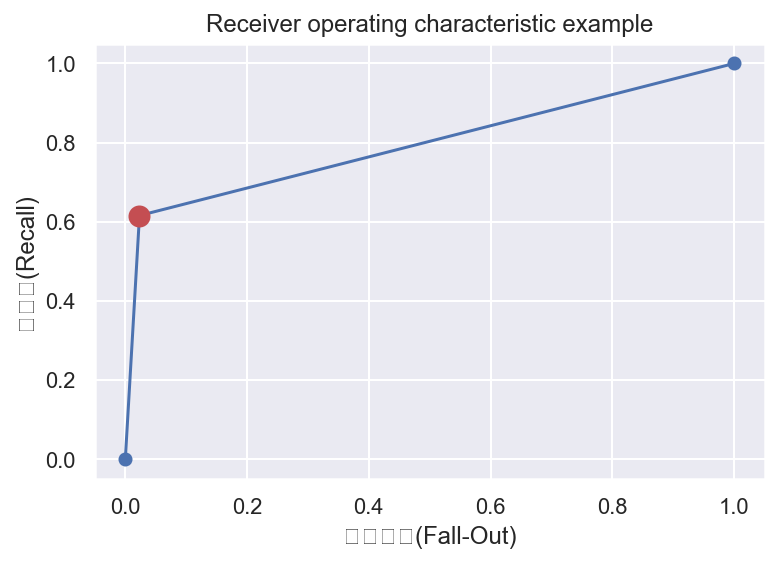

In [62]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [64]:
from yellowbrick.classifier import ROCAUC

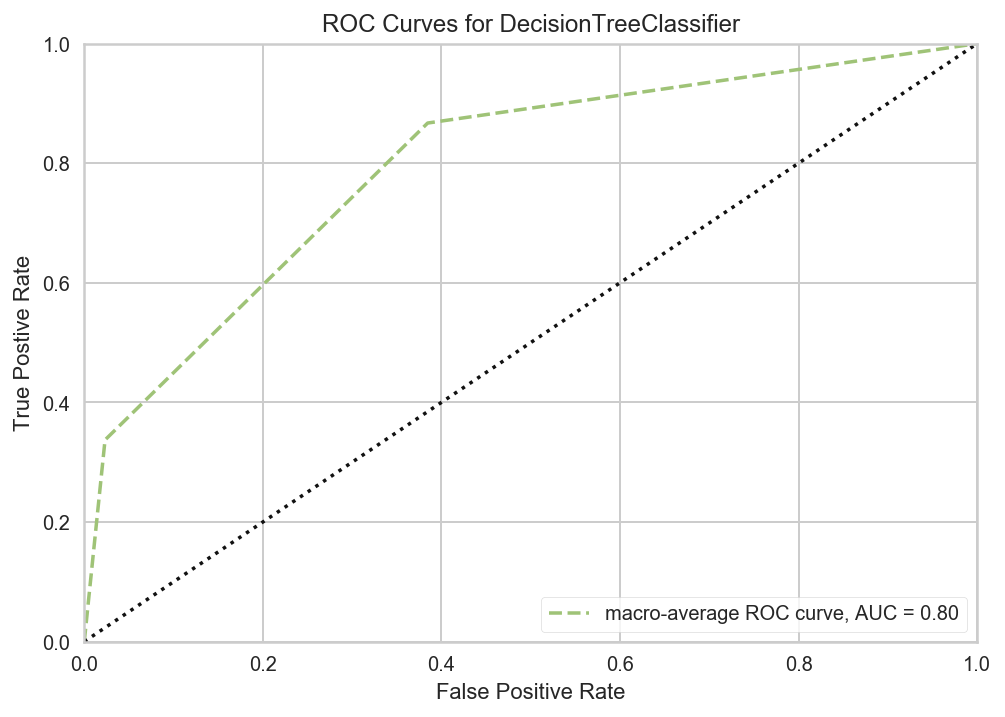

In [70]:
visualizer = ROCAUC(DT_model, classes=[0,1], micro=False, macro=True, per_class=False)
visualizer.fit(train_X, train_Y)
visualizer.score(test_X, test_Y)
visualizer.show()

#### cross-validation (교차 검증)
- 일반화 성능을 평가하는데 train/test 데이터로 한번 나누는 것보다 더 안정이고 뛰어난 통계적 평가 방법
- 교차 검증에서는 데이터를 여러번 반복해서 나누고 여러 모델을 학습함
- 대표적으로 k-fold cross-validation
    - constant 한 cv 값을 설정할 경우 순차적 분류에 따른 score 도출
    - 단순한 k-fold 교차 검증은 데이터가 랜덤하지 안흔 경우, 특히 분류 문제에서 클래스별로 구성된 데이터일 때 주의 필요
    - KFold() 함수를 이용하여 기본형 k-fold 교차 검증의 약점을 보완
        - KFold() : 검증을 하기 위해 데이터를 분리하는데 train/test 로 분류하지 않고 train -> train + validation 으로 나누어 검증
        - e.g) k=5 이면
            - 1) 데이터를 비슷한 크기의 부분집합 5개로 분리
            - 2) 1번 모델은 train:[1 2 3 4]test:[5], 2번 모델 train[1 2 3 5]test:[4] ...
- https://m.blog.naver.com/PostView.nhn?blogId=gustn3964&logNo=221431914515&proxyReferer=https:%2F%2Fwww.google.com%2F

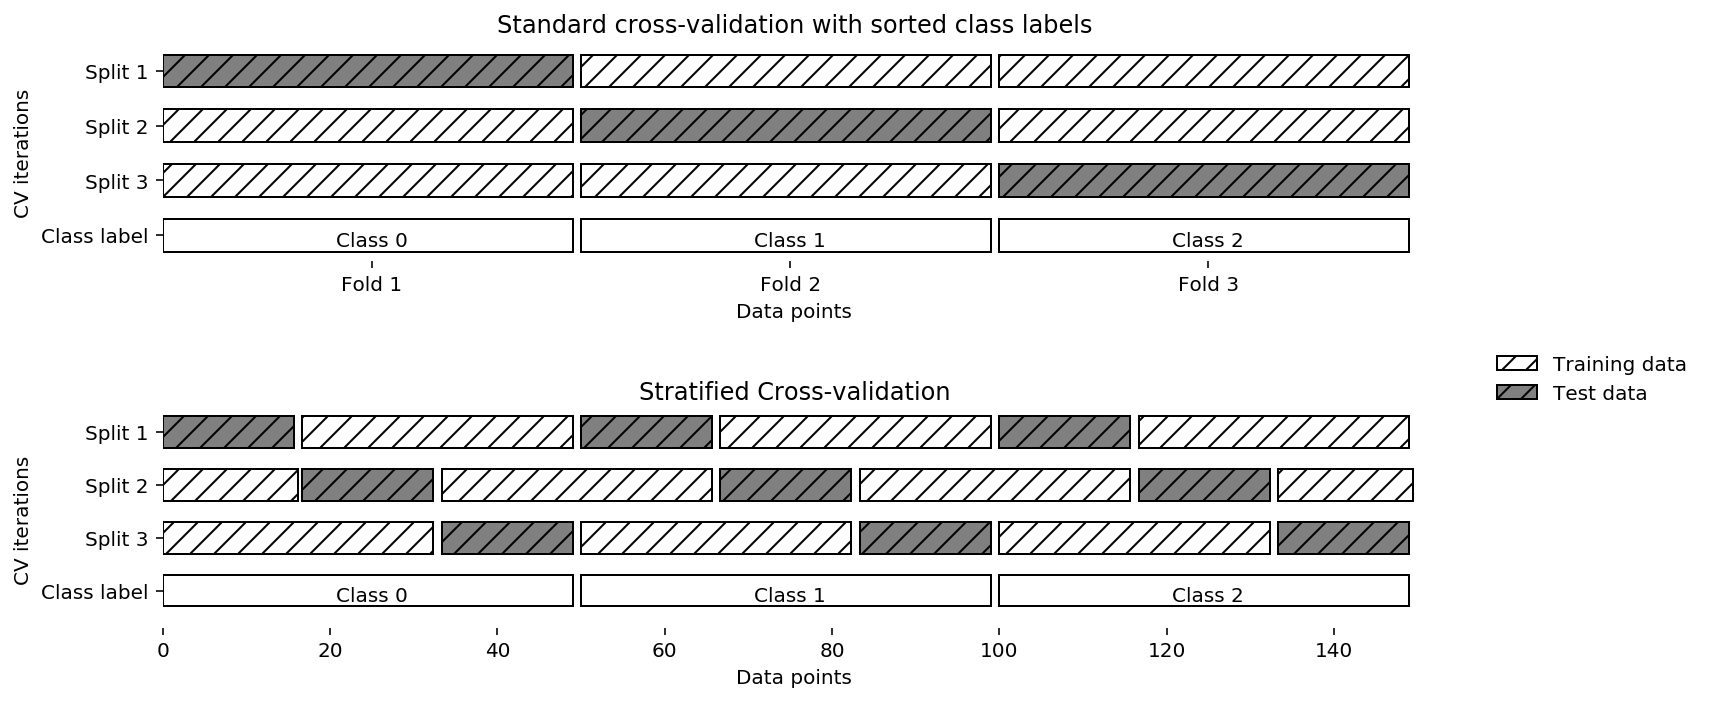

In [80]:
mglearn.plots.plot_stratified_cross_validation()

In [89]:
scores = cross_val_score(DT_model, X, Y, cv=5)
print("cross validation score:{},\nmean score:{:.2f}%".format(scores, scores.mean()*100))

cross validation score:[0.92222222 0.91011236 0.82022472 0.86516854 0.94382022],
mean score:89.23%


In [77]:
kfold = KFold(n_splits=3)

In [87]:
scores = cross_val_score(DT_model, X, Y, cv=kfold)
print("cross validation score:{},\nmean score:{:.2f}%".format(scores*100, scores.mean()*100))

cross validation score:[94.63087248 87.91946309 89.86486486],
mean score:90.81%


In [95]:
kfold_1 = KFold(n_splits=5, shuffle=True, random_state=0)

In [91]:
scores = cross_val_score(DT_model, X, Y, cv=kfold_1)
print("cross validation score:{},\nmean score:{:.2f}%".format(scores, scores.mean()*100))

cross validation score:[0.81111111 0.97752809 0.94382022 0.92134831 0.8988764 ],
mean score:91.05%


#### K-fold 를 이용한 advanced training

In [99]:
cv = KFold(n_splits=3, shuffle=True, random_state=0)
# kfold output 는 index 임

In [141]:
for t, v in cv.split(df_sbw):
    train_cv=df_sbw.iloc[t]       # 훈련용
    val_cv=df_sbw.iloc[v]         # 검증용 분리.
    
    train_cv_temp = train_cv.drop(["isDefective"], axis=1)
    train_X = train_cv_temp.loc[:, :]
    train_Y = train_cv.loc[:,"isDefective"]
    
    val_cv_temp = val_cv.drop(["isDefective"], axis=1)
    val_X = val_cv_temp.loc[:, :]
    val_Y = val_cv.loc[:,"isDefective"]
    
    DT_model = DecisionTreeClassifier(random_state=0).fit(train_X, train_Y)


In [148]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 1 to 445
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   progLength        298 non-null    int64  
 1   vocaCnt           298 non-null    int64  
 2   volume            298 non-null    float64
 3   difficultyLv      298 non-null    float64
 4   progLv            298 non-null    float64
 5   effortToImpl      298 non-null    float64
 6   timeToImpl        298 non-null    float64
 7   nloc              298 non-null    int64  
 8   minParaCnt        298 non-null    int64  
 9   maxParaCnt        298 non-null    int64  
 10  avgParaCnt        298 non-null    float64
 11  funCnt            298 non-null    int64  
 12  minCyclo          298 non-null    int64  
 13  maxCyclo          298 non-null    int64  
 14  avgCyclo          298 non-null    float64
 15  expLvOfDev        298 non-null    float64
 16  affectedBoundary  298 non-null    int64  
 1

In [259]:
# test sample
test_data = [
    {"progLength": 100,
    "vocaCnt": 66,
    "volume": 50.758033,
    "difficultyLv": 19.36363636,
    "progLv": 5.618914415,
    "effortToImpl": 145644.7132,
    "timeToImpl": 8091.317398,
    "nloc": 110,
    "minParaCnt": 0,
    "maxParaCnt": 2,
    "avgParaCnt": 1,
    "funCnt": 1,
    "minCyclo": 2,
    "maxCyclo": 12,
    "avgCyclo": 3,
    "expLvOfDev": 64.1639344,
    "affectedBoundary": 1,
    "revFreq": 10,
    }
]
df_test = pd.DataFrame(test_data)
df_test

progLength  vocaCnt     volume  difficultyLv    progLv  effortToImpl  \
0         100       66  50.758033     19.363636  5.618914   145644.7132   

    timeToImpl  nloc  minParaCnt  maxParaCnt  avgParaCnt  funCnt  minCyclo  \
0  8091.317398   110           0           2           1       1         2   

   maxCyclo  avgCyclo  expLvOfDev  affectedBoundary  revFreq  
0        12         3   64.163934                 1       10

In [260]:
DT_pred_y = DT_model.predict(df_test)
DT_pred_y
#DT_pred_y, np.array(test_Y)
#np.round(metrics.accuracy_score(test_Y, DT_pred_y)*100, 2) 

array([0])

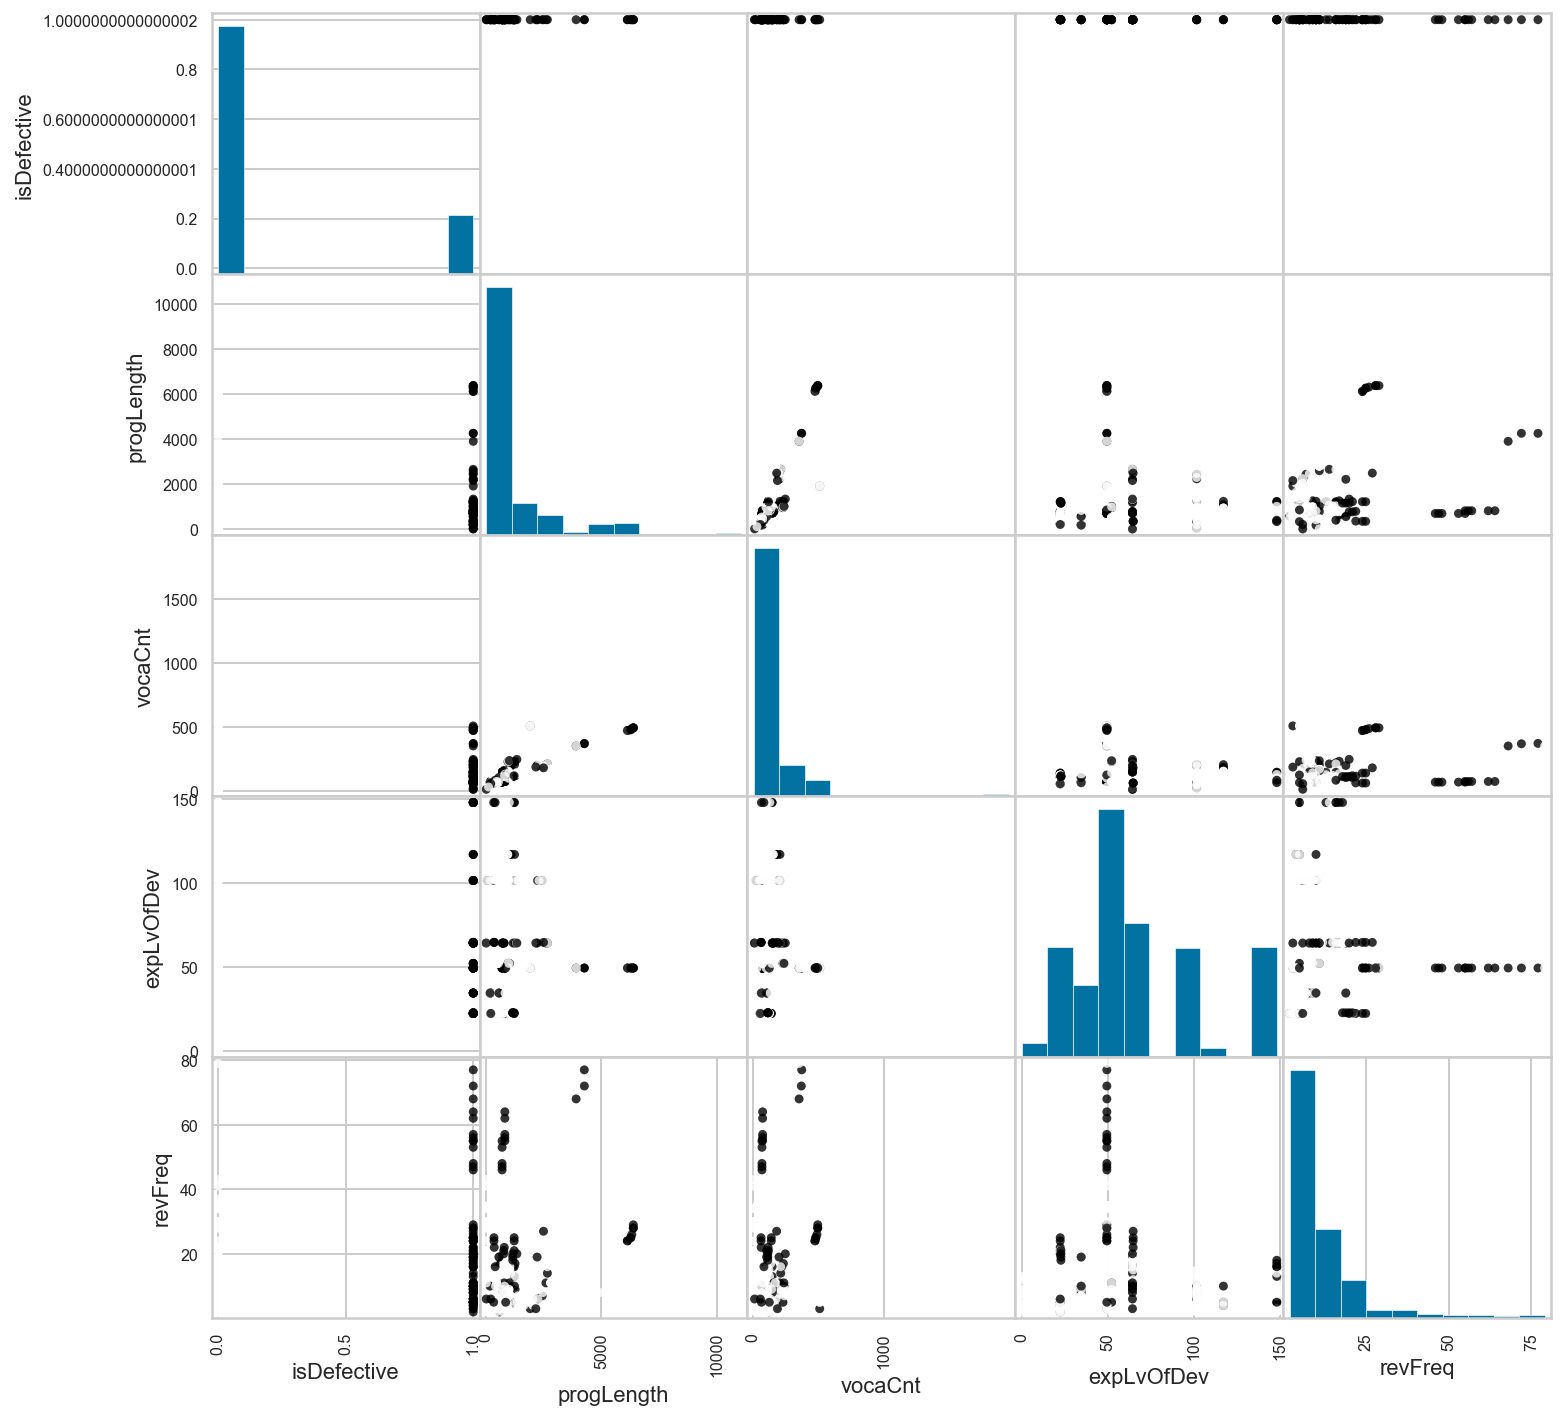

In [98]:
df_sbw_target = df_sbw["isDefective"]
df_sbw_cluster = df_sbw[["isDefective", "progLength", "vocaCnt", "expLvOfDev", "revFreq"]]
pd.plotting.scatter_matrix(df_sbw_cluster, c=df_sbw_target, s=80, alpha=0.8, 
                           figsize=[12,12])
print('')

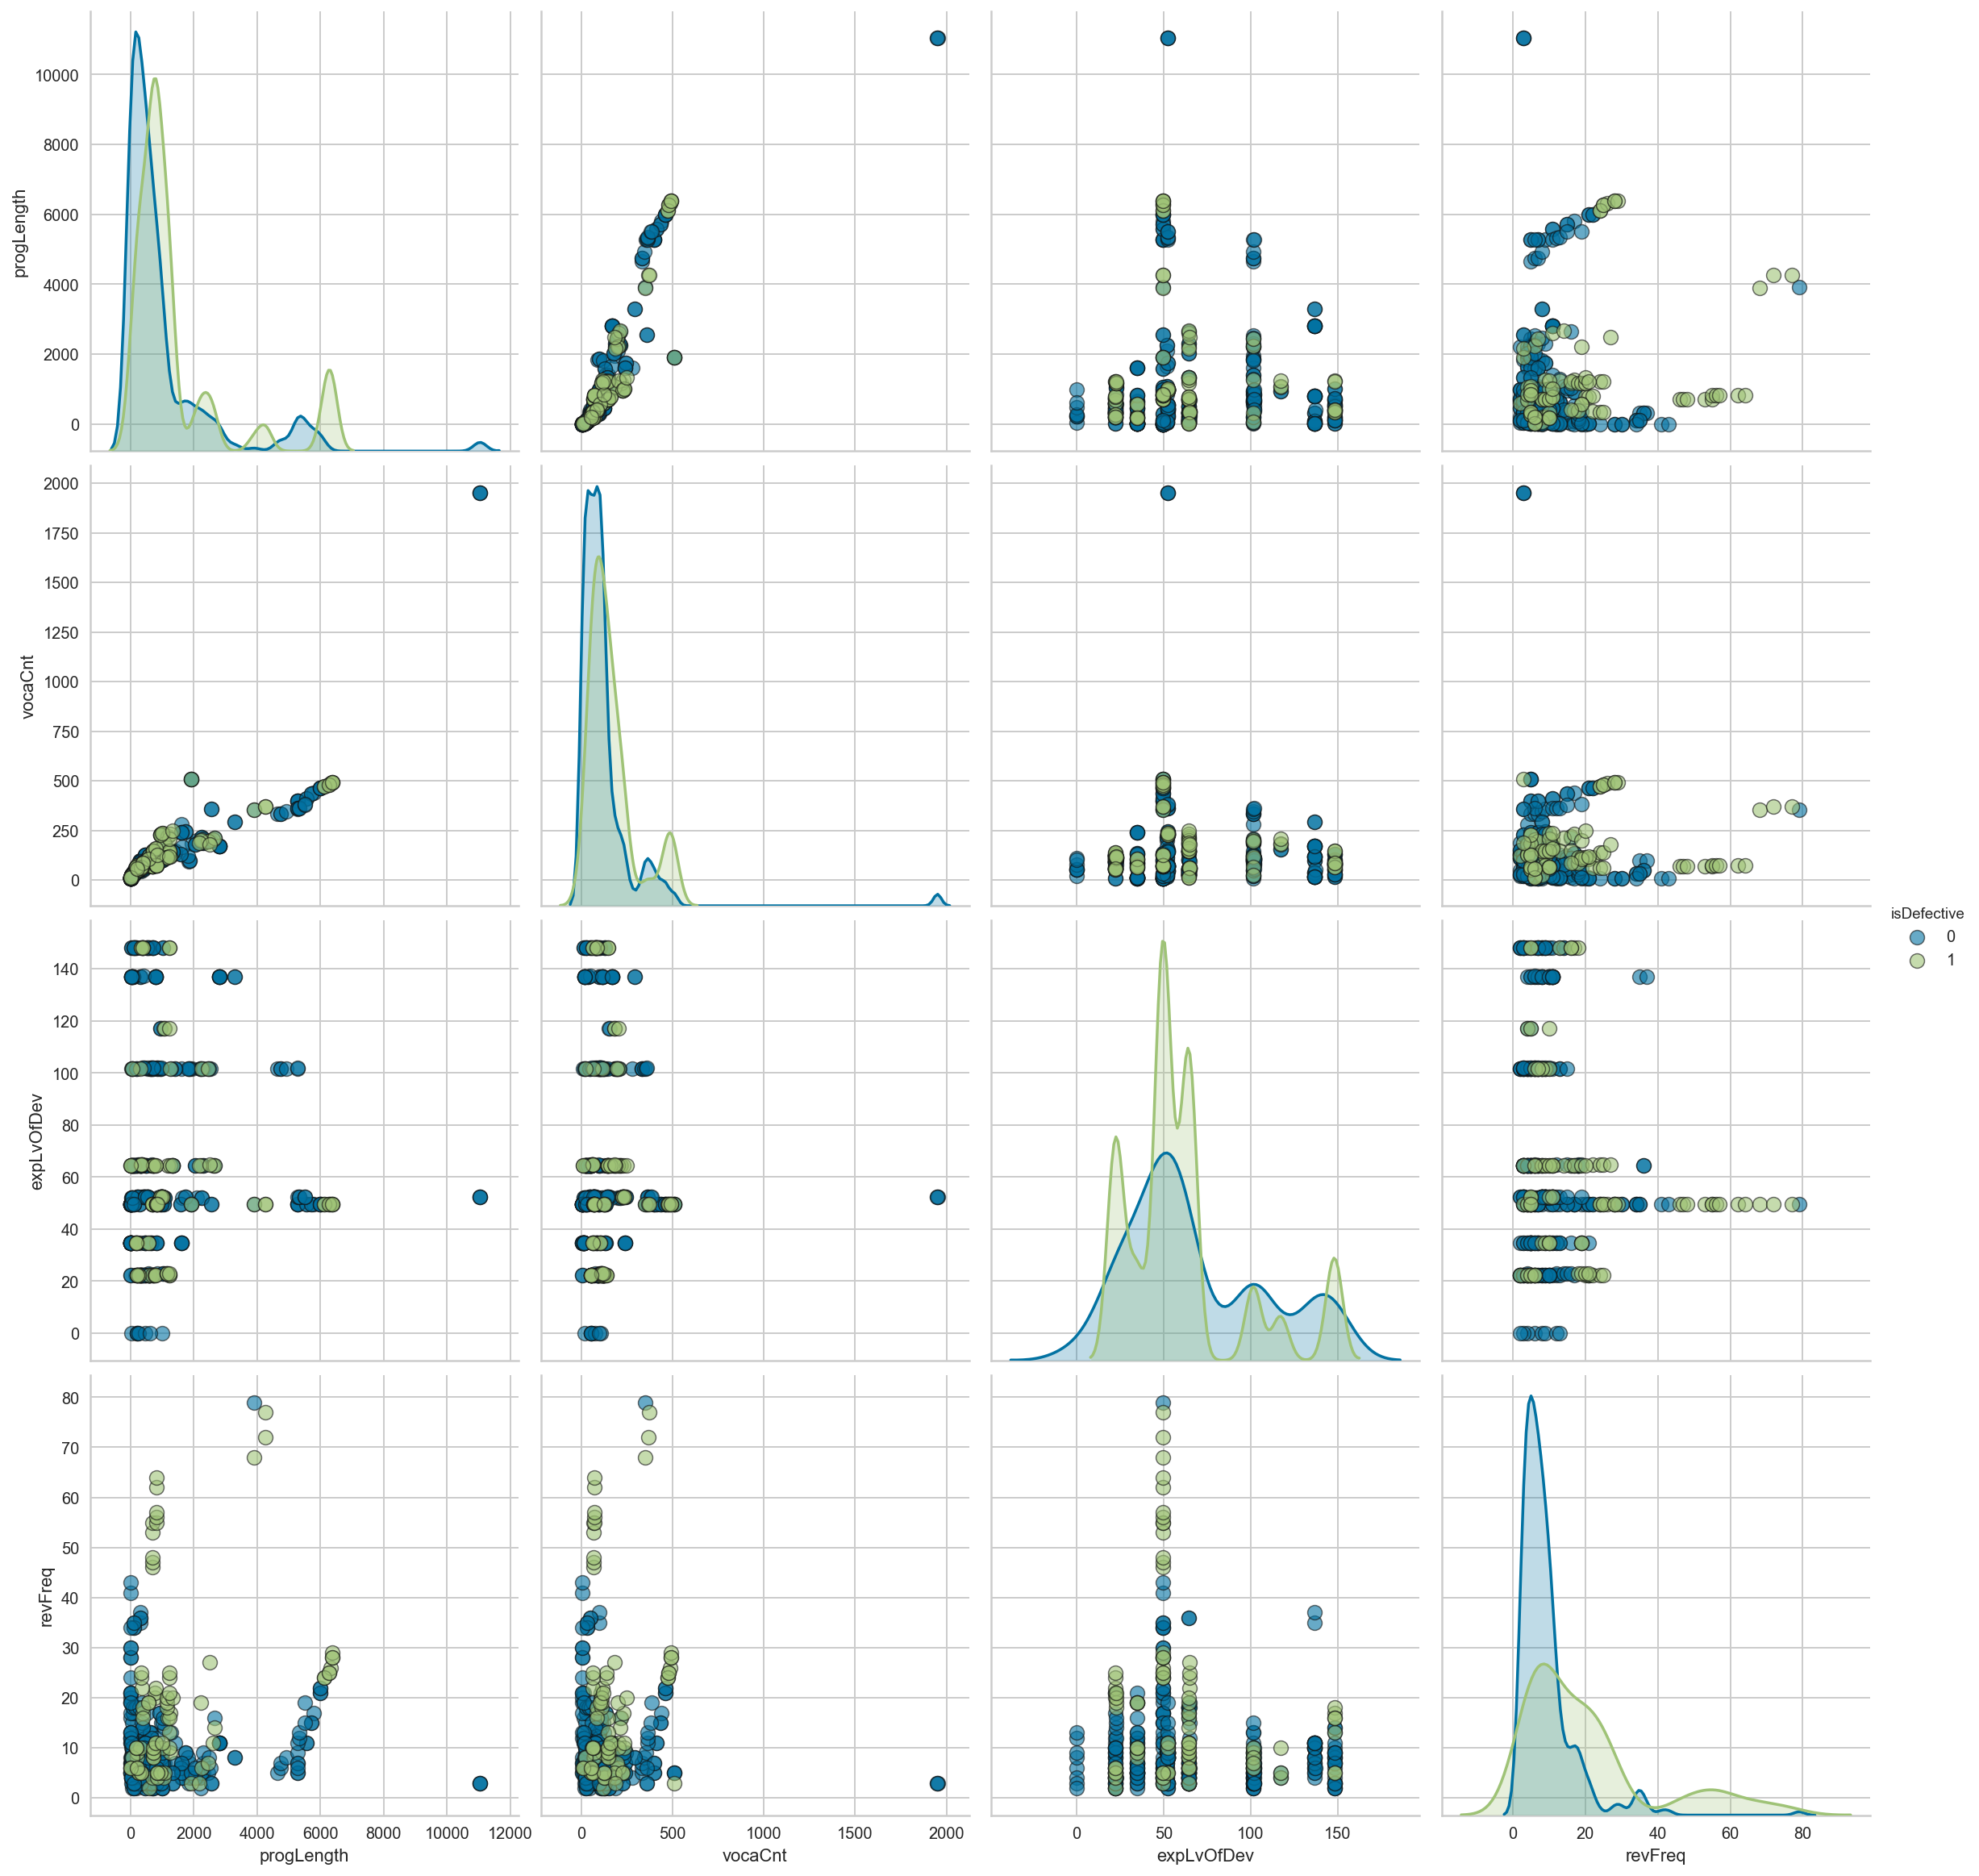

In [102]:
try:
    sns.pairplot(df_sbw_cluster, hue="isDefective", plot_kws ={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size=4)
except Exception as e:
    print(e)
    pass
